In [1]:
# experiments of adversarial training in the MNIST

import tensorflow as tf
import numpy as np
import time

from setup_mnist import MNIST, MNISTModel

from l2_attack import CarliniL2


def show(img):
    """
    Show MNSIT digits in the console.
    """
    remap = "  .*#"+"#"*100
    img = (img.flatten()+.5)*3
    if len(img) != 784: return
    print("START")
    for i in range(28):
        print("".join([remap[int(round(x))] for x in img[i*28:i*28+28]]))


def generate_test_data(data, samples, targeted=True, start=0, inception=False):
    """
    Generate the input data to the attack algorithm.

    data: the images to attack
    samples: number of samples to use
    targeted: if true, construct targeted attacks, otherwise untargeted attacks
    start: offset into data to use
    inception: if targeted and inception, randomly sample 100 targets intead of 1000
    """
    inputs = []
    targets = []
    for i in range(samples):
        if targeted:
            if inception:
                seq = random.sample(range(1,1001), 10)
            else:
                seq = range(data.test_labels.shape[1])

            for j in seq:
                if (j == np.argmax(data.test_labels[start+i])) and (inception == False):
                    continue
                inputs.append(data.test_data[start+i])
                targets.append(np.eye(data.test_labels.shape[1])[j])
        else:
            inputs.append(data.test_data[start+i])
            targets.append(data.test_labels[start+i])

    inputs = np.array(inputs)
    targets = np.array(targets)

    return inputs, targets

def generate_train_data(data, samples, targeted=True, start=0, inception=False):
    """
    Generate the input data to the attack algorithm.

    data: the images to attack
    samples: number of samples to use
    targeted: if true, construct targeted attacks, otherwise untargeted attacks
    start: offset into data to use
    inception: if targeted and inception, randomly sample 100 targets intead of 1000
    """
    inputs = []
    targets = []
    for i in range(samples):
        if targeted:
            if inception:
                seq = random.sample(range(1,1001), 10)
            else:
                seq = range(data.train_labels.shape[1])

            for j in seq:
                if (j == np.argmax(data.train_labels[start+i])) and (inception == False):
                    continue
                inputs.append(data.train_data[start+i])
                targets.append(np.eye(data.train_labels.shape[1])[j])
        else:
            inputs.append(data.train_data[start+i])
            targets.append(data.train_labels[start+i])

    inputs = np.array(inputs)
    targets = np.array(targets)

    return inputs, targets

Using TensorFlow backend.


In [2]:
# C&W attack before adversarial training
batch_num = 5
batch_size = 200
adv_dataset = None
with tf.Session() as sess:
    data, model =  MNIST(), MNISTModel("models/mnist", sess)

    attack = CarliniL2(sess, model, batch_size=batch_size, max_iterations=1000, confidence=0, targeted=False)

    for i in range(batch_num):
        print(i)
        inputs, targets = generate_test_data(data, samples=batch_size, targeted=False,
                                        start=i*batch_size, inception=False)
        timestart = time.time()
        adv = attack.attack(inputs, targets)
        timeend = time.time()
        
        if adv_dataset is None:
            adv_dataset = adv
        else:
            adv_dataset = np.concatenate([adv_dataset, adv], 0)
            
        print("Took",timeend-timestart,"seconds to run",len(inputs),"samples.")

        for i in range(len(adv)):

            print("prediction:", np.argmax(model.model.predict(adv[i:i+1])), 'label:', np.argmax(targets[i:i+1]))
            
    pred_test = model.model.predict(adv_dataset)
    accuracy = np.sum(np.argmax(pred_test,1) \
                      == np.argmax(data.test_labels[0:pred_test.shape[0],:],1))/pred_test.shape[0]
    print('attack success rate in the test set: ', 1 - accuracy)

0
go up to 200
tick 0
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10

100 (457.85382, 396.0796, 61.774227)
200 (443.52298, 352.89218, 90.63079)
300 (384.7639, 240.9656, 143.79828)
400 (373.15533, 219.36963, 153.78569)
500 (371.50778, 216.29628, 155.2115)
600 (370.3753, 214.11563, 156.25967)
700 (370.05478, 213.60849, 156.44629)
800 (369.9191, 213.39949, 156.5196)
900 (369.83984, 213.06491, 156.77495)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0629145, 0.32655567, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.57812357, 10000000000.0, 10000000000.0, 0.05623867, 1.5116283, 0.52781785, 0.93671817, 10000000000.0, 10000000000.0, 0.47542948, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8548921, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0943278, 10000000000.0, 0.6940161, 10000000000.0, 0.82435185, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1

100 (1143.5718, 872.7407, 270.83112)
200 (884.0366, 433.6016, 450.435)
300 (578.84814, 79.87261, 498.97556)
400 (488.60883, 37.066605, 451.5422)
500 (473.45407, 31.892653, 441.56143)
600 (463.73285, 25.891123, 437.84174)
700 (459.1827, 24.3765, 434.8062)
800 (456.3726, 23.864136, 432.50845)
900 (454.53287, 23.423603, 431.10925)
[2.9699783, 3.7959092, 1.1372498, 2.8538532, 0.84707123, 1.114048, 1.0748112, 1.0587195, 0.32655567, 2.2004337, 3.9416218, 3.2563915, 1.2355623, 4.5897436, 2.4588315, 0.57812357, 1.5568335, 3.818407, 0.056063935, 1.5116283, 0.5278112, 0.93671817, 2.6060553, 3.264413, 0.47542948, 3.6636527, 1.8306165, 2.277996, 2.7258072, 1.1552069, 7.379753, 1.3690085, 2.235773, 0.8548921, 4.9598274, 4.095476, 2.219849, 1.7653841, 1.0943278, 2.212398, 0.6940161, 0.86714137, 0.82435185, 1.4586941, 1.8248687, 1.8269792, 2.1750898, 3.6016798, 1.0471185, 1.5224319, 1.7738938, 3.9215984, 3.6884193, 2.0982397, 3.1880755, 3.285347, 2.812943, 0.7440519, 2.8155844, 1.801091, 2.1479812, 1

100 (5.234178, 5.225825, 0.008353406)
200 (5.2341776, 5.225813, 0.008364506)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.00094167807, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

100 (2017.1912, 1387.7153, 629.4758)
200 (1135.6545, 314.6197, 821.0349)
300 (748.3575, 30.457888, 717.8996)
400 (571.0891, 25.211472, 545.8776)
500 (498.13083, 25.036694, 473.09415)
600 (467.18628, 24.9754, 442.21088)
700 (452.40057, 24.231155, 428.16943)
800 (445.34512, 24.928043, 420.41708)
900 (439.93515, 24.670444, 415.2647)
[2.7570987, 4.3402495, 2.533629, 1.5365129, 1.8153819, 3.0656805, 1.89712, 1.1081078, 4.0402718, 1.1151068, 1.9451896, 1.3323088, 4.3507676, 1.4578602, 0.6006062, 2.2283113, 3.5922842, 0.7147633, 3.28106, 1.7344128, 1.2489552, 1.7697175, 2.1967845, 2.5830216, 0.8152547, 1.2567563, 3.8458984, 1.8743405, 1.3225076, 1.3369061, 1.6006811, 1.6047866, 1.6834792, 1.817413, 2.2504158, 0.73789656, 5.1693726, 4.250894, 2.6842303, 1.738459, 1.4744887, 0.71382624, 1.9089823, 1.4673101, 1.6197262, 2.4692812, 8.102154, 0.00092046877, 1.7021146, 1.9499574, 1.0078218, 1.2459722, 3.8627343, 1.283087, 1.3142312, 1.528806, 1.9462934, 1.9267122, 4.7043257, 0.022695798, 2.7262988,

100 (758.24146, 611.3382, 146.90329)
200 (695.7444, 462.0831, 233.66125)
300 (515.9662, 176.0631, 339.90308)
400 (464.039, 91.095695, 372.9433)
500 (452.3624, 74.93688, 377.4255)
600 (445.7652, 65.468956, 380.29623)
700 (443.19476, 63.764145, 379.43063)
800 (441.8869, 61.91387, 379.97302)
900 (439.80533, 60.128727, 379.6766)
[2.695545, 4.235179, 1.7498105, 1.0072104, 1.4595618, 3.0588872, 1.8273005, 1.0289576, 3.7371426, 1.1051626, 1.8320966, 1.3323088, 4.329481, 1.4119303, 0.6006062, 2.211619, 3.376378, 0.7147633, 3.0998583, 1.6499848, 1.2453126, 1.6850508, 2.1887853, 2.4455962, 0.81066966, 1.200765, 2.8204722, 1.8401802, 1.3205104, 1.3069894, 1.6003158, 1.6042311, 1.668408, 1.8009055, 1.8870614, 0.732914, 5.1693726, 4.2319527, 2.5935998, 1.738459, 1.2445089, 0.71324307, 1.8758484, 1.4442126, 1.5399551, 2.4425728, 8.071911, 0.00088472804, 1.5990008, 1.7619066, 0.98104894, 1.2235372, 3.8061676, 1.2620367, 1.3142312, 1.3159087, 1.9296851, 1.8888663, 2.7157106, 0.022695798, 2.677414, 1.4

100 (5.255308, 5.246356, 0.008952244)
200 (5.255305, 5.2463408, 0.008964202)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.

100 (1898.2296, 1260.9219, 637.30774)
200 (1046.3553, 254.79073, 791.56464)
300 (716.65393, 29.20689, 687.447)
400 (552.9895, 23.871094, 529.1184)
500 (486.2656, 23.847664, 462.41794)
600 (456.28174, 23.802217, 432.47952)
700 (442.2102, 23.48079, 418.72943)
800 (434.01105, 23.274433, 410.7366)
900 (429.57224, 23.155663, 406.41656)
[1.2240593, 1.865102, 3.2753625, 2.3367383, 1.4172461, 1.0926131, 1.0047306, 4.531752, 2.6590586, 1.5243533, 2.8601732, 1.2311311, 0.019639459, 1.8498104, 1.7263082, 1.1699901, 2.5135818, 0.5199195, 1.5109353, 1.4211345, 0.7856512, 1.2380384, 1.0525523, 4.144035, 4.340787, 2.0625129, 1.3306575, 1.4191251, 3.182298, 5.4673305, 2.2001152, 1.4330485, 2.9913769, 3.9623604, 1.271602, 0.56221855, 2.124226, 2.8852763, 1.4338553, 0.93280584, 3.1677263, 3.3825438, 3.137743, 1.441663, 1.4743012, 0.0, 0.7485788, 0.0035053026, 0.6725583, 0.0, 0.40332043, 3.3556724, 2.914762, 4.3433795, 2.5105557, 1.0365664, 1.157383, 1.0909327, 3.4589372, 2.1879444, 0.28744388, 2.2766795

100 (715.04065, 562.4446, 152.59605)
200 (649.4204, 409.4144, 240.00604)
300 (491.88538, 153.714, 338.17136)
400 (444.72723, 84.905716, 359.8215)
500 (433.96912, 72.222046, 361.74707)
600 (427.86426, 66.39448, 361.4698)
700 (425.27725, 62.89953, 362.37772)
800 (422.97665, 59.668865, 363.3078)
900 (422.20404, 59.089237, 363.1148)
[1.2075353, 1.865102, 3.1383128, 2.3204985, 1.3602939, 1.0926131, 1.000672, 3.8138835, 2.574759, 1.4582975, 2.8427935, 1.2201443, 0.019621482, 1.6928694, 1.6564445, 1.1377612, 2.50635, 0.51318467, 1.5109353, 1.4100891, 0.7856512, 1.1216795, 1.0319146, 3.9613452, 4.304809, 2.0508368, 1.3294438, 1.3595934, 2.333013, 4.7395496, 2.1244256, 1.4319575, 2.5392606, 3.3583887, 1.2478111, 0.5616101, 1.8982444, 2.8549907, 1.4059343, 0.9326463, 3.1038413, 3.2472277, 2.9910946, 1.2965462, 0.999146, 0.0, 0.7485788, 0.003481118, 0.6018134, 0.0, 0.39672157, 3.278758, 2.914762, 3.7672575, 2.5105557, 1.0365664, 1.146832, 1.0844064, 3.3297315, 2.1220667, 0.28744388, 2.2370753, 0.

100 (5.324878, 5.316599, 0.008279537)
200 (5.3248754, 5.3165827, 0.0082925055)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.0, 10000000000.0, 10000000000.0, 

100 (2106.0295, 1439.8423, 666.18726)
200 (1107.2609, 230.03667, 877.22424)
300 (782.059, 25.723883, 756.33514)
400 (606.70844, 18.197308, 588.5111)
500 (530.9232, 18.407972, 512.51526)
600 (495.53442, 17.826231, 477.7082)
700 (478.15802, 17.710876, 460.44714)
800 (469.0805, 17.677448, 451.40305)
900 (463.53754, 17.539444, 445.9981)
[3.1001244, 1.6691053, 5.7819576, 2.1553395, 4.0064654, 0.7368636, 2.1976323, 3.8106122, 3.2487073, 2.6878176, 1.1695552, 3.653638, 4.091921, 1.4472911, 2.395131, 1.1206206, 2.931728, 2.3434849, 1.0814444, 0.07312797, 3.5611925, 2.2967343, 4.2487345, 4.190103, 1.4987125, 0.09935462, 2.8730397, 1.8340428, 1.9566079, 1.0451112, 3.6109304, 5.0073457, 2.6589594, 3.7963147, 5.79792, 1.210289, 4.457862, 1.6448234, 5.9687796, 1.7062492, 1.2182723, 1.6806736, 4.124364, 3.6138883, 5.628075, 0.7048558, 0.05275017, 1.4614398, 4.2551994, 1.7570119, 1.4301018, 1.7547827, 2.274925, 5.326807, 2.1051934, 0.46474087, 3.2797134, 4.4806147, 1.1781967, 0.0, 2.029529, 2.492105,

100 (782.1143, 622.9345, 159.1798)
200 (710.8672, 455.34143, 255.52579)
300 (537.2683, 177.91205, 359.35623)
400 (478.97937, 90.959076, 388.0203)
500 (468.4682, 78.41421, 390.054)
600 (463.5945, 73.092995, 390.50153)
700 (460.33456, 68.45853, 391.87604)
800 (458.99927, 66.87269, 392.1266)
900 (458.4309, 66.5482, 391.8827)
[2.8353815, 1.5579339, 4.6354585, 2.1195214, 3.5998416, 0.73560065, 2.191027, 3.7627559, 2.9653025, 2.5890813, 1.1466098, 3.5790343, 3.7592828, 1.4203861, 2.395131, 1.1206206, 2.931728, 2.2907736, 1.0466481, 0.07302585, 3.5396016, 2.2633607, 4.0100465, 3.9912522, 1.4344308, 0.09935462, 2.784647, 1.7933378, 1.8826219, 1.0256076, 3.4630315, 4.9602213, 2.597538, 3.745009, 4.7318826, 1.1439705, 4.1075134, 1.4892082, 5.695899, 1.6779172, 1.1959603, 1.6806736, 3.8868778, 3.4540381, 3.540032, 0.7006085, 0.052598096, 1.4614398, 4.234761, 1.6747987, 1.4185989, 1.7232308, 2.2057433, 5.197651, 2.069477, 0.463851, 3.192082, 4.3837366, 0.9849292, 0.0, 2.0052965, 2.4581342, 2.51744

100 (5.352101, 5.343074, 0.009027049)
200 (5.3520923, 5.3430514, 0.009040882)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

100 (2081.1492, 1434.7607, 646.3884)
200 (1129.6095, 262.06973, 867.5398)
300 (762.19586, 28.575367, 733.6205)
400 (580.5277, 25.601177, 554.9265)
500 (506.08875, 24.79117, 481.29758)
600 (476.22293, 24.972572, 451.25037)
700 (461.54477, 24.53281, 437.01196)
800 (454.29373, 24.5762, 429.71753)
900 (448.13074, 24.26328, 423.86746)
[1.5569626, 2.9526508, 1.0441661, 3.444774, 3.5094433, 4.035432, 4.8949604, 3.0425406, 3.2489963, 1.606462, 2.4917064, 4.8510714, 5.584285, 0.47338957, 2.7960303, 2.0140138, 1.7498945, 1.2744713, 3.1655593, 4.128957, 2.1742878, 4.6130657, 4.2628064, 2.5024374, 2.1819792, 1.9382886, 2.6007056, 0.877409, 1.065491, 0.53144133, 2.3945656, 1.221736, 2.320337, 0.9948437, 0.91168267, 1.0666091, 1.8180113, 2.1151936, 2.1258273, 0.55512816, 1.6465849, 2.6726575, 0.5660301, 2.5904903, 0.1710568, 3.9326844, 0.49913853, 2.9553914, 2.2492259, 3.8494177, 1.6012676, 4.696861, 1.5383546, 2.633288, 3.5537934, 3.1644173, 2.9652743, 1.0009289, 2.8879673, 3.482993, 3.9719648, 1.5

100 (784.5228, 631.64, 152.88284)
200 (716.7347, 467.98813, 248.74657)
300 (528.3648, 160.53163, 367.83316)
400 (467.7922, 79.62091, 388.1713)
500 (455.9336, 65.08739, 390.84622)
600 (451.0316, 60.344154, 390.68744)
700 (447.8091, 55.477455, 392.33167)
800 (446.61728, 54.297974, 392.3193)
900 (446.19617, 53.789665, 392.4065)
[1.5336378, 2.9457102, 1.0349053, 2.7359226, 3.5032544, 3.888744, 4.796683, 2.991291, 2.0379002, 1.3604743, 2.4679449, 4.323449, 5.4045324, 0.47338957, 2.5740705, 1.9996271, 1.7216904, 1.1657606, 2.17174, 4.0407095, 2.1679406, 3.6685781, 3.8389506, 2.345789, 2.0072672, 1.783716, 2.3636937, 0.877409, 1.0628469, 0.5299535, 2.3485475, 0.95099497, 2.208259, 0.99410397, 0.91168267, 1.0509675, 1.2401193, 2.1018982, 2.117796, 0.55467397, 1.2529964, 2.6726575, 0.5660301, 2.1608877, 0.1710568, 3.9326844, 0.48998427, 2.8856053, 2.0526676, 3.7615438, 1.4528844, 4.5202093, 1.5365937, 2.5733895, 3.5459085, 3.03483, 2.8173678, 1.0004901, 2.8409798, 3.482993, 3.9248123, 1.4883868

attack success rate of 1000 images in the test set before adversarial training:  0.999

# check

adversarial example:


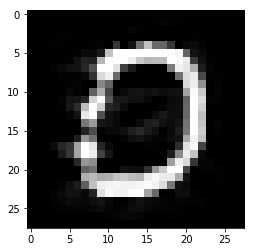

predition:  9 

original image:


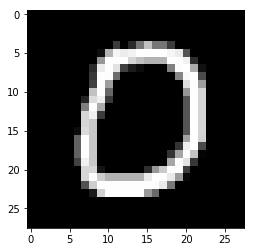

label:  0


In [4]:
import matplotlib.pyplot as plt
with tf.Session() as sess:
    data, model =  MNIST(), MNISTModel("models/mnist", sess)
    index = 10
    print('adversarial example:')
    plt.imshow(adv_dataset[index].squeeze()+0.5, cmap='gray')
    plt.show()
    print('predition: ', np.argmax(model.model.predict(adv_dataset[0:1])), '\n')
    
    print('original image:')
    plt.imshow(data.test_data[index].squeeze()+0.5, cmap='gray')
    plt.show()
    print('label: ',np.argmax(data.test_labels[index]))


# craft adversarial examples in the training set

In [7]:
# craft 25600 adversarial examples in the training set
batch_num = 100
batch_size = 256
adv_dataset = None
with tf.Session() as sess:
    data, model =  MNIST(), MNISTModel("models/mnist", sess)

    attack = CarliniL2(sess, model, batch_size=batch_size, max_iterations=1000, confidence=0, targeted=False)

    for i in range(batch_num):
        print('batch', i)
        inputs, targets = generate_train_data(data, samples=batch_size, targeted=False,
                                        start=i*batch_size, inception=False)
        timestart = time.time()
        adv = attack.attack(inputs, targets)
        timeend = time.time()
        
        if adv_dataset is None:
            adv_dataset = adv
        else:
            adv_dataset = np.concatenate([adv_dataset, adv], 0)
            
        print("Took",timeend-timestart,"seconds to run",len(inputs),"samples.")

        for i in range(len(adv)):
            print("prediction: ", np.argmax(model.model.predict(adv[i:i+1])), 'label: ', np.argmax(targets[i:i+1]))
            
import pickle
file = open('adversarial_examples.pickle', 'wb')
pickle.dump(adv_dataset, file)
file.close()

batch 0
go up to 256
tick 0
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000

100 (598.4268, 512.563, 85.863846)
200 (582.2499, 464.46027, 117.789635)
300 (511.94104, 329.67764, 182.26338)
400 (496.43286, 300.68555, 195.74731)
500 (493.64407, 296.7264, 196.91766)
600 (492.24332, 294.4771, 197.7662)
700 (491.7697, 293.4538, 198.31592)
800 (491.63092, 293.33456, 198.29636)
900 (491.59622, 293.18887, 198.40735)
[10000000000.0, 1.5136592, 0.08359985, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.69255, 2.4698637, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0305864, 0.91963285, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2979779, 10000000000.0, 10000000000.0, 1.0838611, 1.7754593, 0.81442666, 10000000000.0, 10000000000.0, 0.4941305, 10000000000.0, 1.1383493, 10000000000.0, 0.30673283, 10000000000.0, 10000000000.0, 10000000000.0, 0.73745507, 1.5003827, 10

100 (1411.8119, 1049.1438, 362.6681)
200 (1131.2896, 527.68805, 603.6015)
300 (792.3735, 141.51729, 650.8562)
400 (678.4795, 77.1446, 601.3349)
500 (656.8498, 67.37061, 589.4792)
600 (643.4667, 63.44896, 580.0177)
700 (638.5893, 62.16241, 576.4269)
800 (636.2219, 61.742508, 574.47943)
900 (634.8137, 61.643856, 573.16986)
[0.6606016, 1.5136592, 0.08351956, 2.4457164, 1.3791375, 2.5208366, 1.4938703, 4.2176747, 1.69255, 2.4698637, 5.3794084, 3.3347363, 1.6011591, 0.43510112, 2.630782, 3.3195653, 3.9597569, 1.7795825, 3.338273, 3.7189183, 1.917551, 1.3287244, 1.8799046, 1.7032492, 1.0305864, 0.9193851, 1.7154893, 2.3700829, 1.9267597, 2.6842632, 1.2979779, 4.1338453, 2.7686505, 1.0564088, 1.7754593, 0.8083559, 4.0926085, 1.6855907, 0.4939685, 1.8025068, 1.1383493, 2.1415434, 0.3066588, 3.632906, 2.2716575, 1.7440565, 0.7370079, 1.4940372, 2.7527986, 3.0175724, 1.3319306, 2.2147274, 1.0969342, 6.14536, 1.3579574, 4.489499, 3.918901, 0.7953739, 0.65746254, 1.0051215, 1.3900373, 1.2739621, 1

100 (1068.033, 859.18506, 208.84785)
200 (970.6673, 632.30884, 338.35846)
300 (753.08875, 271.93408, 481.15466)
400 (681.4549, 154.3881, 527.0668)
500 (663.7235, 128.94766, 534.7759)
600 (653.1476, 113.641464, 539.5061)
700 (646.6396, 101.05337, 545.58624)
800 (642.68506, 97.528694, 545.1564)
900 (641.35236, 95.05211, 546.30023)
Took 78.00211000442505 seconds to run 256 samples.
prediction:  3 label:  7
prediction:  8 label:  3
prediction:  9 label:  4
prediction:  5 label:  6
prediction:  7 label:  1
prediction:  3 label:  8
prediction:  2 label:  1
prediction:  9 label:  0
prediction:  4 label:  9
prediction:  3 label:  8
prediction:  8 label:  0
prediction:  9 label:  3
prediction:  7 label:  1
prediction:  9 label:  2
prediction:  4 label:  7
prediction:  9 label:  0
prediction:  3 label:  2
prediction:  3 label:  9
prediction:  5 label:  6
prediction:  9 label:  0
prediction:  4 label:  1
prediction:  4 label:  6
prediction:  2 label:  7
prediction:  4 label:  1
prediction:  4 lab

100 (7.595276, 7.5840783, 0.011197738)
200 (7.595277, 7.5840607, 0.011216253)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

900 (561.49414, 359.29507, 202.19907)
[10000000000.0, 2.896625, 10000000000.0, 10000000000.0, 0.3437087, 10000000000.0, 0.75319827, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.63680905, 10000000000.0, 10000000000.0, 1.5497705, 0.33716458, 10000000000.0, 0.7554031, 10000000000.0, 10000000000.0, 0.95869505, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5254892, 10000000000.0, 0.68975997, 10000000000.0, 10000000000.0, 0.5216505, 0.9764059, 10000000000.0, 0.3644133, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.5297965, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000

100 (1623.8433, 1219.1852, 404.6581)
200 (1303.6294, 629.10724, 674.52216)
300 (911.9061, 161.34387, 750.56226)
400 (774.01636, 82.92839, 691.08795)
500 (750.18335, 71.68071, 678.5026)
600 (737.2382, 66.42657, 670.81165)
700 (730.2845, 64.36001, 665.9245)
800 (726.5369, 63.117714, 663.4192)
900 (723.6377, 62.583923, 661.0538)
[1.7467474, 2.896625, 5.3041487, 2.647056, 0.3421284, 3.489571, 0.7530168, 2.984015, 1.955683, 1.2972766, 3.226908, 4.5084667, 3.2756965, 1.8845055, 5.04527, 1.852138, 2.1457272, 4.7874846, 0.62308395, 5.016895, 1.6095273, 1.5497705, 0.33716458, 4.6939425, 0.7554031, 5.1219177, 3.9673328, 0.95869505, 7.330811, 5.107115, 4.046671, 1.3053136, 1.5870705, 2.6135712, 1.5254892, 1.682652, 0.68975997, 1.6356041, 1.8136306, 0.5216505, 0.9764059, 4.5617523, 0.3644133, 2.0928993, 2.9799867, 2.4019852, 2.265399, 1.4774883, 1.8301721, 1.4678912, 1.4674218, 1.7934856, 1.2737849, 1.3565711, 1.0045711, 4.04776, 3.319, 1.1031721, 1.626246, 0.5297965, 2.054789, 5.025348, 5.1602087

100 (1238.6654, 1006.5715, 232.09393)
200 (1115.8785, 717.93, 397.94855)
300 (870.00024, 317.80838, 552.1919)
400 (785.2154, 174.41919, 610.7962)
500 (759.20844, 138.1779, 621.0305)
600 (743.5961, 112.61706, 630.97906)
700 (735.41846, 100.577225, 634.84125)
800 (732.4171, 97.84109, 634.57605)
900 (730.0066, 95.95065, 634.0559)
Took 76.45309376716614 seconds to run 256 samples.
prediction:  4 label:  1
prediction:  5 label:  8
prediction:  3 label:  2
prediction:  8 label:  2
prediction:  5 label:  6
prediction:  3 label:  9
prediction:  8 label:  1
prediction:  2 label:  8
prediction:  9 label:  7
prediction:  1 label:  4
prediction:  2 label:  0
prediction:  0 label:  6
prediction:  6 label:  0
prediction:  2 label:  7
prediction:  5 label:  3
prediction:  4 label:  1
prediction:  3 label:  0
prediction:  0 label:  6
prediction:  5 label:  6
prediction:  9 label:  0
prediction:  4 label:  9
prediction:  5 label:  3
prediction:  7 label:  4
prediction:  0 label:  6
prediction:  9 label

100 (6.8667016, 6.8560867, 0.010615079)
200 (6.8666983, 6.85606, 0.010638172)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

900 (495.7392, 305.19995, 190.53925)
[10000000000.0, 0.33446997, 10000000000.0, 10000000000.0, 0.20236611, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.9503372, 10000000000.0, 10000000000.0, 10000000000.0, 1.0567474, 10000000000.0, 10000000000.0, 0.4626991, 0.8558649, 10000000000.0, 10000000000.0, 3.042883, 0.27568018, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8924601, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.19362682, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.9826883, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3956275, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2448553, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

100 (1509.6978, 1123.0532, 386.6446)
200 (1171.5454, 530.6782, 640.8672)
300 (822.06604, 136.44495, 685.6211)
400 (692.55804, 67.63281, 624.92523)
500 (669.8338, 57.339745, 612.4941)
600 (659.64716, 56.01662, 603.63055)
700 (650.9979, 49.95999, 601.0379)
800 (647.36847, 48.167046, 599.2014)
900 (645.7148, 47.396297, 598.3185)
[2.693106, 0.33446997, 5.2657566, 1.7780958, 0.20236611, 1.5505929, 1.9355336, 2.9885378, 1.7915843, 2.2764173, 2.0372593, 1.6445005, 2.8836794, 5.4770117, 0.9503372, 1.4215236, 4.005693, 2.908648, 1.0567474, 1.5516382, 4.029099, 0.46241403, 0.8558649, 4.2104692, 1.7702177, 3.042883, 0.27568018, 2.1809442, 2.0635722, 4.8363533, 3.0306325, 1.6920487, 2.0013855, 1.2852288, 0.89107054, 2.437666, 0.87308407, 2.6158764, 0.7399168, 1.7548188, 0.61110634, 2.5305974, 0.19031811, 4.1626434, 1.3721018, 2.9430408, 1.9808688, 1.318642, 2.8579226, 3.4922826, 0.9826883, 5.002574, 1.1125845, 3.3812099, 2.5334966, 2.012539, 1.3956275, 2.5130012, 1.988744, 2.0890362, 1.5563519, 4.

100 (1145.218, 919.92816, 225.28983)
200 (1018.98303, 643.7536, 375.2294)
300 (785.0727, 273.78052, 511.29218)
400 (694.3499, 136.12099, 558.22894)
500 (674.9839, 113.10877, 561.8751)
600 (662.6603, 100.84762, 561.8127)
700 (656.7179, 90.29947, 566.4184)
800 (653.12537, 85.59719, 567.5282)
900 (651.553, 83.297806, 568.2552)
Took 77.89410924911499 seconds to run 256 samples.
prediction:  9 label:  0
prediction:  7 label:  4
prediction:  9 label:  0
prediction:  3 label:  5
prediction:  4 label:  1
prediction:  2 label:  6
prediction:  3 label:  9
prediction:  9 label:  7
prediction:  4 label:  1
prediction:  3 label:  8
prediction:  3 label:  9
prediction:  8 label:  9
prediction:  0 label:  6
prediction:  7 label:  0
prediction:  3 label:  5
prediction:  8 label:  1
prediction:  7 label:  2
prediction:  3 label:  2
prediction:  7 label:  1
prediction:  7 label:  3
prediction:  4 label:  9
prediction:  7 label:  4
prediction:  3 label:  8
prediction:  4 label:  7
prediction:  4 label:  

0 (7.256138, 6.985917, 0.2702206)
100 (7.03177, 7.020049, 0.011721076)
200 (7.031768, 7.020027, 0.011740884)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

400 (493.95657, 286.1189, 207.83768)
500 (490.41968, 277.40875, 213.01094)
600 (489.04044, 273.54636, 215.49408)
700 (488.56464, 272.61502, 215.94962)
800 (488.42984, 272.4948, 215.93503)
900 (488.29272, 272.2093, 216.08342)
[10000000000.0, 10000000000.0, 10000000000.0, 0.6941982, 10000000000.0, 10000000000.0, 0.31330907, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.7961419, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8901879, 1.819752, 10000000000.0, 10000000000.0, 0.69873595, 1.2505252, 10000000000.0, 10000000000.0, 0.22606757, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3502016, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.225713, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.23891944, 100000

100 (1345.4166, 958.1673, 387.24933)
200 (1042.7273, 418.78793, 623.9394)
300 (729.429, 90.38723, 639.0418)
400 (623.4589, 49.579292, 573.87964)
500 (605.0599, 44.579914, 560.48)
600 (595.61926, 40.00099, 555.6183)
700 (591.4536, 39.165936, 552.28766)
800 (589.7403, 38.968407, 550.7719)
900 (588.60144, 38.616955, 549.9845)
[4.6280456, 2.15163, 1.4117973, 0.69270563, 2.3890228, 1.8454843, 0.31330907, 2.169433, 1.9058644, 1.7347263, 1.4655557, 1.4342549, 0.48104072, 1.7956083, 1.5068916, 3.384257, 1.9680036, 1.8266325, 1.7736387, 1.812952, 1.0018001, 1.5005622, 0.89003515, 1.819752, 2.1579213, 2.6914823, 0.69873595, 1.2505252, 1.3775395, 2.7830343, 0.22606757, 1.9328609, 3.587789, 6.8095264, 1.6730868, 1.3502016, 2.7757573, 3.0053039, 0.937351, 4.469161, 4.379674, 2.7098675, 4.0577135, 1.2029519, 2.3559794, 3.0966098, 1.4992832, 3.8418832, 4.113225, 2.2886658, 2.9694033, 2.2805052, 2.3942933, 0.2385019, 1.0979335, 4.660663, 1.5696988, 1.2749481, 1.3633304, 2.1179256, 0.42690665, 1.99004,

100 (997.6906, 791.77936, 205.91125)
200 (896.63684, 559.61884, 337.018)
300 (688.4839, 215.69893, 472.78497)
400 (619.96954, 102.72152, 517.24805)
500 (606.6904, 82.77107, 523.9194)
600 (597.3539, 69.95471, 527.3992)
700 (593.54694, 62.87926, 530.66766)
800 (591.7824, 61.601963, 530.1804)
900 (590.99097, 61.54238, 529.4486)
Took 84.15806436538696 seconds to run 256 samples.
prediction:  1 label:  7
prediction:  1 label:  7
prediction:  7 label:  3
prediction:  3 label:  5
prediction:  0 label:  6
prediction:  8 label:  0
prediction:  2 label:  6
prediction:  3 label:  8
prediction:  3 label:  5
prediction:  7 label:  4
prediction:  3 label:  7
prediction:  7 label:  1
prediction:  8 label:  6
prediction:  3 label:  8
prediction:  0 label:  6
prediction:  9 label:  8
prediction:  3 label:  7
prediction:  7 label:  1
prediction:  3 label:  7
prediction:  5 label:  3
prediction:  5 label:  3
prediction:  4 label:  1
prediction:  6 label:  2
prediction:  3 label:  8
prediction:  2 label: 

100 (7.4297504, 7.4174414, 0.012308906)
200 (7.429747, 7.417422, 0.01232542)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

500 (527.1173, 317.18924, 209.92805)
600 (526.2991, 315.96814, 210.33096)
700 (526.0509, 315.50812, 210.54282)
800 (525.8968, 315.1807, 210.7161)
900 (525.844, 315.0558, 210.78818)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.34255448, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1329602, 0.8727317, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.679814, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.73639053, 10000000000.0, 10000000000.0, 0.8549919, 10000000000.0, 1

100 (1519.9773, 1120.4789, 399.49838)
200 (1169.4392, 516.3576, 653.08167)
300 (825.56885, 133.81355, 691.7553)
400 (715.6647, 80.051605, 635.6131)
500 (692.4319, 65.03636, 627.3955)
600 (682.3979, 61.597534, 620.80035)
700 (676.3633, 59.236713, 617.1266)
800 (673.0156, 58.406025, 614.6096)
900 (671.387, 58.64927, 612.73773)
[2.219737, 3.8753393, 3.2123585, 2.273969, 3.451946, 5.690201, 3.5434484, 3.7066464, 4.7915096, 4.8095946, 1.6147408, 2.5070755, 0.34213224, 2.796681, 3.9552197, 3.3427026, 1.2328417, 3.9000273, 1.9187502, 1.1329602, 0.8727317, 5.344185, 3.5770073, 1.1056817, 2.5844839, 2.9675126, 1.0881904, 2.1156764, 2.2277012, 2.166216, 1.8726918, 4.7545238, 4.2918463, 4.1520967, 0.67858016, 3.4097946, 2.903202, 1.9193594, 2.163468, 2.7132044, 2.708552, 5.6542573, 0.5092682, 1.9867737, 1.0838664, 2.8421445, 1.4815696, 3.8208094, 2.27388, 2.419989, 2.428915, 0.72839063, 4.316637, 1.8585117, 0.83892035, 3.723034, 0.77800375, 4.104966, 1.138859, 1.9561378, 2.1063066, 3.1056783, 1.1

100 (1161.1051, 923.4866, 237.61848)
200 (1025.6437, 614.16846, 411.47522)
300 (789.11743, 240.58704, 548.5304)
400 (717.126, 133.76437, 583.3616)
500 (701.1423, 111.940475, 589.2018)
600 (691.49255, 98.320366, 593.1722)
700 (685.63434, 89.00001, 596.63434)
800 (682.1879, 83.872635, 598.3153)
900 (679.87695, 80.25159, 599.62537)
Took 82.0031726360321 seconds to run 256 samples.
prediction:  5 label:  6
prediction:  7 label:  4
prediction:  9 label:  5
prediction:  3 label:  5
prediction:  7 label:  4
prediction:  5 label:  6
prediction:  3 label:  8
prediction:  5 label:  6
prediction:  9 label:  3
prediction:  2 label:  3
prediction:  3 label:  0
prediction:  9 label:  4
prediction:  4 label:  9
prediction:  7 label:  4
prediction:  3 label:  2
prediction:  3 label:  2
prediction:  5 label:  3
prediction:  5 label:  8
prediction:  3 label:  9
prediction:  2 label:  1
prediction:  5 label:  2
prediction:  5 label:  0
prediction:  1 label:  7
prediction:  5 label:  6
prediction:  9 labe

100 (7.49822, 7.4864635, 0.0117563)
200 (7.4982185, 7.486443, 0.011775705)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000000

500 (536.9817, 323.6969, 213.28476)
600 (535.5397, 319.8952, 215.64444)
700 (534.96594, 318.44717, 216.51878)
800 (534.8475, 318.4417, 216.40575)
900 (534.8023, 318.31195, 216.49036)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.403829, 10000000000.0, 10000000000.0, 0.85517704, 10000000000.0, 10000000000.0, 0.50479597, 10000000000.0, 10000000000.0, 10000000000.0, 1.1224654, 10000000000.0, 10000000000.0, 0.77699035, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.70437026, 0.40842915, 1.0260097, 10000000000.0, 10000000000.0, 0.11784204, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

100 (1534.0786, 1145.3596, 388.71893)
200 (1185.2573, 510.92487, 674.33246)
300 (824.651, 113.869026, 710.782)
400 (694.47363, 50.588364, 643.88525)
500 (672.2798, 43.501194, 628.77856)
600 (659.70215, 37.33298, 622.36914)
700 (654.5409, 35.99909, 618.5418)
800 (652.17773, 36.27212, 615.90564)
900 (650.4243, 35.37466, 615.0497)
[3.9948003, 4.2402277, 1.6660712, 2.7289138, 1.403829, 3.0159156, 2.9170303, 0.85517704, 1.9225829, 0.9445851, 0.50479597, 0.75244117, 2.4002676, 2.6680987, 1.1224654, 1.8290114, 3.0056787, 0.77699035, 2.66541, 2.1665304, 0.99569863, 1.7194988, 2.316285, 1.4105785, 0.89421105, 2.2214866, 2.0874915, 2.002471, 1.8295966, 1.9272364, 0.70437026, 0.4081234, 1.025707, 3.5700908, 0.828078, 0.117678136, 2.7852135, 1.7421322, 2.323914, 1.2665269, 2.8404698, 1.8124549, 1.5489192, 2.6456978, 2.9843888, 2.5998144, 2.0547147, 3.856878, 3.5300477, 5.0147853, 4.2893677, 3.2079096, 4.2268777, 1.7799037, 1.4521098, 3.210936, 0.9602525, 4.7340055, 5.715122, 0.7007165, 3.6956956, 

100 (1116.197, 910.7041, 205.49295)
200 (1010.0947, 658.28156, 351.8132)
300 (789.4851, 284.92456, 504.56055)
400 (701.313, 128.76242, 572.5506)
500 (682.6418, 105.11249, 577.5293)
600 (671.48114, 89.93842, 581.5427)
700 (665.843, 82.87194, 582.97107)
800 (663.04504, 79.42084, 583.6242)
900 (661.2342, 78.98761, 582.2466)
Took 84.610915184021 seconds to run 256 samples.
prediction:  9 label:  7
prediction:  3 label:  6
prediction:  5 label:  3
prediction:  7 label:  4
prediction:  3 label:  8
prediction:  4 label:  9
prediction:  9 label:  3
prediction:  9 label:  7
prediction:  5 label:  8
prediction:  1 label:  2
prediction:  6 label:  5
prediction:  5 label:  3
prediction:  6 label:  0
prediction:  5 label:  3
prediction:  4 label:  9
prediction:  4 label:  9
prediction:  5 label:  0
prediction:  8 label:  3
prediction:  2 label:  3
prediction:  5 label:  3
prediction:  3 label:  5
prediction:  4 label:  9
prediction:  5 label:  0
prediction:  7 label:  1
prediction:  2 label:  7
pre

100 (7.403483, 7.393676, 0.009807137)
200 (7.40348, 7.3936543, 0.009825615)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000

[1.829729, 1.2931079, 10000000000.0, 10000000000.0, 0.77571255, 10000000000.0, 1.0360354, 10000000000.0, 1.7207007, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.9060451, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2970867, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.76057744, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6402563, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0,

100 (1572.1438, 1179.7833, 392.36047)
200 (1269.5906, 624.2232, 645.36743)
300 (857.9029, 150.80603, 707.09686)
400 (697.37384, 59.31139, 638.06244)
500 (671.06757, 52.465847, 618.60175)
600 (657.7041, 49.065845, 608.63824)
700 (651.32874, 48.040775, 603.28796)
800 (644.6238, 44.36364, 600.26013)
900 (642.6303, 43.629185, 599.0011)
[1.829729, 1.2931079, 6.3792076, 3.3580666, 0.77448523, 4.3221087, 1.0360354, 3.7013965, 1.7207007, 2.3333774, 2.5335217, 6.8336577, 1.6940887, 2.3555698, 4.8208985, 4.3766217, 1.3951249, 2.3909125, 1.761596, 2.6354434, 1.2144848, 3.0352874, 1.7157488, 7.095927, 0.8985566, 4.3440113, 1.8202188, 3.1215732, 2.4027443, 1.8688785, 2.6536558, 3.8098755, 1.2970867, 2.725646, 1.9653982, 4.400674, 1.6945045, 5.6686444, 1.3317858, 2.4322345, 2.518045, 2.9068825, 0.76030207, 2.308529, 0.7612139, 5.119985, 1.9905583, 2.43221, 2.422857, 3.904854, 1.0802085, 2.6130066, 2.4818962, 2.6422322, 2.230578, 3.6066785, 5.6002464, 4.001993, 3.9346051, 3.5197463, 2.6489236, 2.2623

100 (1148.9235, 940.4344, 208.48909)
200 (1054.8083, 720.5252, 334.28314)
300 (795.66296, 297.35397, 498.30902)
400 (696.6223, 145.18921, 551.4331)
500 (675.2665, 116.00422, 559.26227)
600 (661.9614, 97.622635, 564.3388)
700 (656.8022, 93.50919, 563.29297)
800 (654.5767, 92.04392, 562.5328)
900 (652.8229, 90.349625, 562.47327)
Took 76.76173686981201 seconds to run 256 samples.
prediction:  9 label:  4
prediction:  4 label:  1
prediction:  9 label:  0
prediction:  9 label:  3
prediction:  7 label:  2
prediction:  5 label:  6
prediction:  4 label:  9
prediction:  9 label:  3
prediction:  3 label:  8
prediction:  9 label:  3
prediction:  1 label:  4
prediction:  3 label:  2
prediction:  5 label:  6
prediction:  7 label:  2
prediction:  3 label:  7
prediction:  5 label:  6
prediction:  9 label:  4
prediction:  2 label:  6
prediction:  7 label:  1
prediction:  3 label:  5
prediction:  9 label:  4
prediction:  3 label:  5
prediction:  4 label:  1
prediction:  7 label:  3
prediction:  9 label

100 (6.8317065, 6.8192997, 0.01240688)
200 (6.831702, 6.819279, 0.01242303)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000

400 (455.964, 254.35764, 201.60635)
500 (453.75342, 250.70132, 203.05208)
600 (452.9815, 249.30957, 203.67195)
700 (452.7968, 248.82062, 203.9762)
800 (452.50385, 247.79391, 204.70995)
900 (452.42004, 247.72775, 204.6923)
[10000000000.0, 10000000000.0, 10000000000.0, 1.995531, 10000000000.0, 1.172018, 0.24469018, 10000000000.0, 10000000000.0, 1.5512661, 10000000000.0, 10000000000.0, 10000000000.0, 1.2263979, 1.2160712, 10000000000.0, 10000000000.0, 0.81992024, 0.22006316, 10000000000.0, 0.7305554, 1.3292534, 2.2825956, 10000000000.0, 0.25610372, 10000000000.0, 10000000000.0, 10000000000.0, 0.7489283, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.44077995, 10000000000.0, 1.3310629, 10000000000.0, 10000000000.0, 10000000000.0, 1.200572, 10000000000.0, 10000000000.0, 10000000000.0, 0.3140754, 10000000000.0, 10000000000.0, 10000000000.0, 0.7327728, 0.9585161, 10000000000.0, 10000000000.0, 0.4622026, 0.6438625, 0.49604914, 10000000000.0, 10000000000.0, 0.090560526, 100000000

100 (1218.8704, 884.95325, 333.91718)
200 (979.9119, 461.86218, 518.04974)
300 (683.4684, 105.81643, 577.652)
400 (578.7504, 46.56983, 532.1806)
500 (561.73505, 41.212986, 520.52203)
600 (552.58795, 37.722984, 514.865)
700 (548.7639, 37.104164, 511.65976)
800 (546.3806, 36.33423, 510.04642)
900 (545.0725, 36.25307, 508.81946)
[1.0445826, 1.3751354, 1.4872366, 1.995531, 1.6552731, 1.172018, 0.24469018, 1.4627028, 2.0302587, 1.5511615, 3.7302132, 3.16629, 1.7108057, 1.2263979, 1.2147214, 1.0707753, 1.5144974, 0.81431335, 0.219993, 1.2755316, 0.7287245, 1.3292534, 2.2792506, 4.9363656, 0.2554733, 1.4432461, 0.8594897, 1.8519392, 0.7462262, 1.5804601, 1.1465888, 1.9876351, 2.3958645, 0.4367663, 1.8215207, 1.3310629, 1.6827673, 3.7236323, 4.257125, 1.200572, 1.5869343, 2.310379, 1.0015788, 0.3140754, 1.9935104, 1.3579085, 1.0266808, 0.7327728, 0.95803165, 1.6147888, 2.5774179, 0.46078393, 0.6438625, 0.49526367, 1.8457042, 4.8100486, 0.090508014, 3.098835, 1.3503675, 1.4730895, 2.4242363, 2.

100 (926.49036, 743.9178, 182.57254)
200 (845.83374, 555.03314, 290.8006)
300 (648.1687, 217.51666, 430.65204)
400 (585.70337, 110.82614, 474.87726)
500 (571.91266, 89.46927, 482.4434)
600 (564.7859, 76.85876, 487.92712)
700 (560.4896, 70.66105, 489.82855)
800 (558.4166, 68.50006, 489.9166)
900 (557.366, 67.58401, 489.78204)
Took 84.10544490814209 seconds to run 256 samples.
prediction:  5 label:  8
prediction:  4 label:  1
prediction:  9 label:  4
prediction:  3 label:  8
prediction:  5 label:  6
prediction:  7 label:  4
prediction:  9 label:  4
prediction:  4 label:  6
prediction:  5 label:  6
prediction:  9 label:  8
prediction:  6 label:  0
prediction:  3 label:  8
prediction:  9 label:  4
prediction:  8 label:  2
prediction:  3 label:  8
prediction:  4 label:  6
prediction:  0 label:  8
prediction:  9 label:  3
prediction:  9 label:  4
prediction:  3 label:  2
prediction:  9 label:  4
prediction:  4 label:  9
prediction:  3 label:  8
prediction:  7 label:  2
prediction:  3 label: 

0 (7.1750317, 6.8956256, 0.2794059)
100 (6.943226, 6.9324503, 0.010775408)
200 (6.943222, 6.932432, 0.010789885)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1

800 (476.09174, 259.09982, 216.9919)
900 (475.90332, 258.28363, 217.61967)
[10000000000.0, 0.08838041, 1.068019, 10000000000.0, 10000000000.0, 0.83124745, 10000000000.0, 10000000000.0, 1.836638, 10000000000.0, 0.55638504, 10000000000.0, 10000000000.0, 1.3457792, 10000000000.0, 10000000000.0, 1.8166103, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.6244969, 0.25733414, 10000000000.0, 10000000000.0, 10000000000.0, 0.25277963, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8627207, 10000000000.0, 10000000000.0, 0.5226828, 10000000000.0, 10000000000.0, 10000000000.0, 1.24167, 10000000000.0, 10000000000.0, 1.4173278, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000

100 (1318.988, 958.32477, 360.66324)
200 (1084.4094, 530.3135, 554.096)
300 (726.3433, 114.298744, 612.04456)
400 (606.9127, 57.063457, 549.84924)
500 (585.56195, 44.78628, 540.7757)
600 (576.10364, 40.769222, 535.3344)
700 (570.4713, 38.974987, 531.49634)
800 (567.32336, 38.164223, 529.1591)
900 (565.65906, 37.50968, 528.14935)
[1.89333, 0.08833042, 1.068019, 3.6702516, 4.2443933, 0.83124745, 3.7779918, 3.9113207, 1.836638, 1.5113311, 0.55638504, 2.290618, 2.5460858, 1.3457792, 4.4810567, 3.2192879, 1.8166103, 2.077451, 4.117587, 2.1158223, 1.8128747, 2.4617984, 2.5682917, 1.5081404, 4.905632, 1.6244969, 0.25733414, 1.735007, 3.3029811, 2.6235301, 0.25249556, 4.1886005, 0.36991078, 1.6079521, 3.0568852, 2.1086903, 2.4402587, 3.45923, 3.3192253, 1.8627207, 4.3795233, 1.7450051, 0.5223465, 1.925741, 2.6273043, 4.135621, 1.2084519, 1.782572, 3.2152495, 1.4173278, 4.9452124, 1.6605291, 1.9002666, 1.4092249, 2.2894258, 2.510808, 3.2614536, 1.6699173, 2.5999703, 3.5825837, 2.596325, 3.43343

100 (963.82465, 778.0174, 185.80725)
200 (888.96045, 593.88947, 295.071)
300 (680.2943, 239.16061, 441.13367)
400 (605.49927, 120.09858, 485.40067)
500 (589.1603, 92.85468, 496.3056)
600 (579.9175, 81.51586, 498.4016)
700 (575.36584, 74.13217, 501.2337)
800 (572.4078, 71.01463, 501.39313)
900 (569.5492, 68.86989, 500.6793)
Took 75.24753737449646 seconds to run 256 samples.
prediction:  9 label:  8
prediction:  2 label:  6
prediction:  9 label:  0
prediction:  5 label:  8
prediction:  5 label:  0
prediction:  7 label:  9
prediction:  1 label:  7
prediction:  8 label:  0
prediction:  3 label:  9
prediction:  4 label:  1
prediction:  2 label:  3
prediction:  3 label:  7
prediction:  7 label:  1
prediction:  4 label:  9
prediction:  5 label:  0
prediction:  0 label:  6
prediction:  5 label:  6
prediction:  9 label:  3
prediction:  6 label:  0
prediction:  8 label:  3
prediction:  6 label:  5
prediction:  4 label:  9
prediction:  7 label:  9
prediction:  7 label:  9
prediction:  3 label:  2

0 (7.6646576, 7.3893976, 0.27526012)
100 (7.4378304, 7.427083, 0.010747532)
200 (7.437828, 7.427064, 0.010764089)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 

800 (487.89746, 242.28526, 245.61218)
900 (487.6314, 241.89247, 245.73895)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.2965216, 10000000000.0, 10000000000.0, 0.93083286, 1.533855, 10000000000.0, 10000000000.0, 0.8689616, 1.1473475, 10000000000.0, 10000000000.0, 0.8355725, 1.2477624, 10000000000.0, 10000000000.0, 1.210431, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5449512, 0.60885704, 1.0805376, 10000000000.0, 1.7409325, 0.899914, 0.052201964, 10000000000.0, 1.0663972, 10000000000.0, 1.1908779, 0.9959391, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.6391242, 10000000000.0, 10000000000.0, 10000000000.0, 1.0363171, 1.491889, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0,

100 (1337.967, 952.286, 385.6811)
200 (1040.7345, 444.6971, 596.0374)
300 (718.1274, 111.06256, 607.0648)
400 (604.2175, 60.16597, 544.0516)
500 (585.18304, 54.6015, 530.58154)
600 (576.69714, 49.31153, 527.3856)
700 (572.30804, 47.31286, 524.9952)
800 (568.8852, 45.626575, 523.2586)
900 (567.82794, 45.17794, 522.65)
[1.1225443, 1.9171714, 3.7790163, 4.2234764, 0.29633772, 1.8868918, 1.8162402, 0.93083286, 1.533855, 1.3002281, 2.668541, 0.8689616, 1.1473475, 1.2445221, 2.9953537, 0.8355725, 1.2352314, 2.2969503, 1.1674122, 1.2087523, 2.3522198, 2.4921746, 2.2933269, 2.0903692, 4.239537, 2.0996497, 1.5093479, 1.3920165, 2.4273484, 1.682059, 5.33503, 1.7092081, 4.184429, 0.88658035, 5.9925365, 2.4496324, 2.785409, 1.4774951, 0.60858613, 1.0805376, 1.1510322, 1.7409325, 0.899914, 0.052110057, 2.5304182, 1.0663972, 1.489129, 1.1908779, 0.9959391, 2.8765779, 1.7868578, 2.658465, 1.9158041, 2.0296402, 4.332544, 3.0169215, 3.1070862, 1.6391242, 2.933133, 0.7786226, 4.6185946, 1.0363171, 1.491

100 (971.82684, 782.92847, 188.89838)
200 (884.3574, 574.6052, 309.75217)
300 (671.76733, 224.14517, 447.6222)
400 (604.42035, 114.46719, 489.95316)
500 (588.7986, 91.018166, 497.78043)
600 (578.29047, 72.107346, 506.1831)
700 (572.765, 62.255154, 510.5099)
800 (570.34106, 58.952774, 511.3883)
900 (569.3307, 57.66191, 511.66876)
Took 77.56126093864441 seconds to run 256 samples.
prediction:  3 label:  7
prediction:  2 label:  0
prediction:  3 label:  7
prediction:  5 label:  8
prediction:  1 label:  8
prediction:  4 label:  7
prediction:  4 label:  9
prediction:  3 label:  5
prediction:  4 label:  9
prediction:  3 label:  2
prediction:  3 label:  7
prediction:  7 label:  1
prediction:  9 label:  8
prediction:  7 label:  1
prediction:  7 label:  0
prediction:  7 label:  4
prediction:  3 label:  8
prediction:  3 label:  5
prediction:  5 label:  3
prediction:  3 label:  5
prediction:  4 label:  1
prediction:  6 label:  0
prediction:  3 label:  2
prediction:  7 label:  4
prediction:  4 lab

0 (7.200878, 6.9237766, 0.27710164)
100 (6.9701295, 6.959843, 0.010286478)
200 (6.970126, 6.9598207, 0.010305446)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 

800 (486.40314, 281.14508, 205.25806)
900 (486.34155, 281.12186, 205.21971)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0813669, 10000000000.0, 10000000000.0, 10000000000.0, 0.91239196, 10000000000.0, 2.1553197, 0.44760478, 10000000000.0, 1.7978386, 2.3506536, 0.15283138, 10000000000.0, 10000000000.0, 1.3934414, 10000000000.0, 1.8896484, 10000000000.0, 2.0151176, 10000000000.0, 10000000000.0, 10000000000.0, 0.31098074, 10000000000.0, 10000000000.0, 0.6794765, 10000000000.0, 1.1415405, 1.806964, 0.43475172, 10000000000.0, 10000000000.0, 1.274672, 10000000000.0, 1.8370719, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0

100 (1407.2849, 1027.847, 379.43787)
200 (1114.2996, 502.48834, 611.8113)
300 (763.12573, 111.94177, 651.18396)
400 (642.20166, 52.522987, 589.67865)
500 (617.1538, 40.396633, 576.7572)
600 (606.3456, 38.284805, 568.0608)
700 (601.90344, 36.632656, 565.2708)
800 (599.0849, 36.55938, 562.5255)
900 (597.20355, 36.184696, 561.01886)
[2.4907713, 1.404645, 4.6316404, 1.0670168, 5.115485, 1.7248932, 3.956037, 2.2247105, 4.184692, 2.7758381, 2.4390192, 1.4473752, 1.5323325, 2.487441, 1.7774751, 4.0622416, 4.784397, 1.0813669, 2.0083003, 1.9686314, 1.742192, 0.9121449, 4.6334124, 2.1553197, 0.44760478, 3.4992456, 1.7977026, 2.3506536, 0.15283138, 2.1182628, 3.6666744, 1.3934295, 1.8394761, 1.8896484, 3.5952091, 2.0151176, 0.7587751, 1.9993, 5.287587, 0.3105714, 2.0010643, 2.4704356, 0.6787627, 1.6522968, 1.1415405, 1.6286638, 0.43475172, 3.3884284, 2.2770739, 1.274672, 2.2375517, 1.8350585, 3.0979648, 1.61813, 4.7294593, 3.1306615, 2.207196, 2.9107118, 2.8259761, 1.3093519, 0.71924317, 3.83970

100 (1040.1083, 833.92554, 206.18272)
200 (943.4302, 618.04474, 325.3854)
300 (726.8331, 256.6146, 470.21857)
400 (656.3776, 142.13086, 514.24677)
500 (636.35864, 111.043976, 525.31464)
600 (626.50616, 93.566444, 532.9397)
700 (622.80975, 88.37138, 534.43835)
800 (618.5576, 82.89998, 535.65765)
900 (617.04474, 81.69415, 535.3506)
Took 76.99049162864685 seconds to run 256 samples.
prediction:  9 label:  4
prediction:  7 label:  1
prediction:  5 label:  6
prediction:  7 label:  1
prediction:  5 label:  6
prediction:  9 label:  7
prediction:  2 label:  0
prediction:  1 label:  2
prediction:  1 label:  7
prediction:  9 label:  3
prediction:  4 label:  8
prediction:  5 label:  6
prediction:  4 label:  1
prediction:  9 label:  4
prediction:  8 label:  1
prediction:  3 label:  8
prediction:  3 label:  2
prediction:  8 label:  6
prediction:  2 label:  4
prediction:  7 label:  4
prediction:  5 label:  6
prediction:  5 label:  6
prediction:  5 label:  3
prediction:  3 label:  5
prediction:  5 la

100 (7.122308, 7.1112776, 0.011030434)
200 (7.1223044, 7.1112633, 0.011040958)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

500 (509.80457, 313.58444, 196.22014)
600 (508.15784, 309.85214, 198.30571)
700 (507.7298, 308.9842, 198.7456)
800 (507.40393, 308.35583, 199.04808)
900 (507.1394, 307.9495, 199.18991)
[10000000000.0, 1.641464, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.0005727, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.7436768, 10000000000.0, 10000000000.0, 10000000000.0, 1.5305665, 10000000000.0, 10000000000.0, 10000000000.0, 0.63840854, 10000000000.0, 0.4701607, 10000000000.0, 2.6145792, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0623529, 1.4523015, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.9672266, 10000000000.0, 10000000000.0, 0.65358096, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10

100 (1484.543, 1109.3768, 375.16614)
200 (1228.8774, 634.03467, 594.84283)
300 (829.3246, 154.84573, 674.4788)
400 (716.1586, 83.45473, 632.7039)
500 (697.8085, 77.87112, 619.9374)
600 (685.83496, 71.55314, 614.2818)
700 (679.3918, 68.16261, 611.2292)
800 (677.0137, 68.40073, 608.6129)
900 (675.36707, 67.38873, 607.97833)
[2.2737045, 1.641464, 4.6247864, 3.0170317, 3.0391111, 1.8764601, 2.3532517, 6.2584677, 2.9674711, 4.3406744, 1.9954722, 4.398918, 1.0026813, 2.1843834, 4.0826807, 2.267258, 0.743206, 0.87743866, 1.6807151, 3.4581282, 1.5297996, 1.0221672, 1.8858715, 1.8061736, 0.63840854, 8.037344, 0.47010708, 2.236751, 2.6145792, 3.0925722, 6.162795, 3.2513351, 2.1396103, 2.6988413, 1.9150959, 1.1596117, 1.0623529, 1.4523015, 3.1264405, 6.7453337, 1.7779698, 1.3584857, 3.205134, 2.6608572, 1.3666432, 5.236802, 3.0980182, 1.3311955, 0.9672266, 3.0915437, 3.0999312, 0.65252995, 2.9278517, 2.347506, 3.329146, 2.7719612, 2.335567, 2.2175682, 5.1720576, 1.80883, 1.8316584, 0.3622144, 5.8

100 (1151.2783, 927.8616, 223.41681)
200 (1045.95, 686.1387, 359.81125)
300 (792.65826, 268.34753, 524.3107)
400 (724.4601, 158.59259, 565.8675)
500 (703.27954, 124.4111, 578.8684)
600 (692.0139, 107.31676, 584.69714)
700 (683.9897, 98.17669, 585.813)
800 (680.4343, 92.93153, 587.5028)
900 (678.9243, 91.73726, 587.1871)
Took 83.8358883857727 seconds to run 256 samples.
prediction:  8 label:  0
prediction:  2 label:  4
prediction:  7 label:  2
prediction:  8 label:  1
prediction:  9 label:  5
prediction:  4 label:  1
prediction:  4 label:  9
prediction:  3 label:  2
prediction:  3 label:  8
prediction:  4 label:  8
prediction:  9 label:  4
prediction:  3 label:  2
prediction:  4 label:  1
prediction:  2 label:  6
prediction:  7 label:  0
prediction:  4 label:  1
prediction:  9 label:  3
prediction:  3 label:  5
prediction:  7 label:  1
prediction:  5 label:  0
prediction:  3 label:  8
prediction:  8 label:  1
prediction:  4 label:  1
prediction:  3 label:  2
prediction:  3 label:  5
pre

100 (6.904175, 6.8938546, 0.010320248)
200 (6.904173, 6.8938346, 0.010338222)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

900 (498.7368, 306.5178, 192.219)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.34702158, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3925798, 10000000000.0, 0.031173784, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.5676945, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.1257398, 10000000000.0, 0.35793227, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.203867, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.7683848, 10000000000.0, 10000000000.0, 10000000000.0, 0.81876945, 0.826337, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.

100 (1427.8967, 1050.9069, 376.9899)
200 (1142.6561, 530.65137, 612.00476)
300 (789.35284, 136.71391, 652.6389)
400 (668.32996, 73.37375, 594.9562)
500 (646.8901, 64.861534, 582.02856)
600 (635.56305, 58.271072, 577.292)
700 (630.7156, 57.534573, 573.181)
800 (628.3754, 56.191013, 572.1844)
900 (626.0163, 53.8087, 572.2076)
[1.0431784, 2.8060594, 3.3927517, 2.8783524, 1.9463496, 3.2605457, 2.6452358, 0.34650406, 1.1114033, 2.285251, 2.8713372, 2.7103972, 1.3925798, 3.283421, 0.031171948, 1.6844691, 4.7752094, 2.8801653, 1.2703736, 4.8705645, 2.463759, 0.5676945, 4.8788514, 2.348878, 2.2189026, 1.3410891, 5.4596715, 2.8924289, 2.3010235, 2.1257398, 3.288756, 0.35789692, 2.5721393, 2.4399624, 1.0874866, 4.4909034, 5.328449, 2.203867, 1.7470596, 1.8227899, 1.1433505, 2.395201, 2.7026367, 2.5777998, 0.7664442, 0.97196907, 0.7676686, 2.525126, 0.63119435, 2.7528784, 0.81876945, 0.8191834, 2.5653381, 2.1350558, 1.6259631, 1.7891164, 2.8452995, 3.3204541, 5.105362, 2.132321, 2.5820336, 3.4853

100 (1062.1564, 855.416, 206.74039)
200 (976.4837, 646.05615, 330.42755)
300 (756.79193, 277.90704, 478.8849)
400 (685.32275, 168.0605, 517.26227)
500 (667.3661, 141.38011, 525.98596)
600 (656.9903, 127.382286, 529.60803)
700 (652.36194, 120.83646, 531.5255)
800 (650.1866, 118.09202, 532.09454)
900 (647.8583, 114.25247, 533.60583)
Took 76.58398199081421 seconds to run 256 samples.
prediction:  5 label:  6
prediction:  3 label:  9
prediction:  5 label:  6
prediction:  8 label:  3
prediction:  5 label:  6
prediction:  9 label:  3
prediction:  7 label:  2
prediction:  9 label:  7
prediction:  7 label:  1
prediction:  9 label:  4
prediction:  7 label:  2
prediction:  7 label:  1
prediction:  9 label:  7
prediction:  7 label:  9
prediction:  9 label:  4
prediction:  8 label:  1
prediction:  2 label:  0
prediction:  9 label:  0
prediction:  4 label:  7
prediction:  5 label:  6
prediction:  7 label:  1
prediction:  9 label:  0
prediction:  5 label:  3
prediction:  8 label:  1
prediction:  2 l

0 (7.0702386, 6.8096557, 0.26058275)
100 (6.853625, 6.8413024, 0.012322308)
200 (6.853623, 6.8412743, 0.0123486705)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0

300 (493.346, 311.37592, 181.9701)
400 (480.08054, 285.91968, 194.16086)
500 (477.66547, 280.6815, 196.98396)
600 (476.82764, 278.5736, 198.25403)
700 (476.27014, 276.94702, 199.3231)
800 (475.61725, 275.26822, 200.34903)
900 (475.52228, 275.16107, 200.36122)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.97068036, 1.2966037, 10000000000.0, 0.3736215, 1.7091594, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.15752903, 10000000000.0, 10000000000.0, 10000000000.0, 1.313031, 0.82107687, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.4051829, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000

100 (1366.8667, 1009.0909, 357.77582)
200 (1083.2277, 499.2275, 584.0001)
300 (748.478, 114.21547, 634.2626)
400 (630.5783, 56.337563, 574.2407)
500 (612.0261, 50.132393, 561.89374)
600 (601.8023, 45.639076, 556.1632)
700 (595.333, 42.98222, 552.35077)
800 (592.6435, 42.190487, 550.453)
900 (590.9261, 41.904533, 549.02155)
[2.3241856, 0.9220443, 1.2503824, 2.6677575, 2.4525123, 2.5754137, 1.4303396, 2.651298, 0.97068036, 1.28831, 2.8089833, 0.33746505, 1.7091594, 3.4194233, 3.5996966, 4.205097, 2.6748374, 1.5884403, 2.7245932, 0.15752903, 2.2941628, 4.097148, 5.313801, 1.313031, 0.82107687, 0.93827903, 4.3643064, 2.0910192, 3.66573, 1.4450984, 2.1192322, 3.2868924, 4.9175777, 1.8059937, 1.9770486, 2.8783941, 3.5711484, 3.3722353, 1.322267, 1.080307, 5.9357634, 5.9442005, 0.40429947, 3.3782458, 2.1003666, 2.5413349, 2.630757, 1.9887657, 2.600408, 4.2506123, 1.8706841, 1.8588996, 1.6450074, 7.0496373, 0.9990642, 2.2625008, 0.08421692, 1.0258298, 2.9773006, 2.209833, 1.7301202, 0.4376704,

100 (1023.65045, 816.4539, 207.19652)
200 (920.9149, 585.4237, 335.49118)
300 (710.54285, 242.01326, 468.52957)
400 (639.0961, 126.44767, 512.64844)
500 (623.25854, 111.48832, 511.77023)
600 (613.1897, 96.82905, 516.36066)
700 (607.4785, 90.02819, 517.4503)
800 (605.5359, 88.40565, 517.13025)
900 (604.57935, 87.82241, 516.75696)
Took 83.23928141593933 seconds to run 256 samples.
prediction:  5 label:  6
prediction:  4 label:  9
prediction:  4 label:  1
prediction:  4 label:  1
prediction:  4 label:  1
prediction:  8 label:  4
prediction:  8 label:  2
prediction:  3 label:  0
prediction:  5 label:  6
prediction:  3 label:  5
prediction:  7 label:  3
prediction:  3 label:  5
prediction:  3 label:  8
prediction:  8 label:  4
prediction:  1 label:  2
prediction:  7 label:  0
prediction:  2 label:  4
prediction:  9 label:  7
prediction:  7 label:  4
prediction:  0 label:  6
prediction:  8 label:  1
prediction:  6 label:  0
prediction:  8 label:  3
prediction:  4 label:  1
prediction:  5 lab

100 (6.6178117, 6.6063957, 0.011415758)
200 (6.6178107, 6.606393, 0.011417651)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

400 (460.02844, 264.6856, 195.34285)
500 (457.50116, 258.7508, 198.75037)
600 (456.43985, 256.71356, 199.72629)
700 (456.03442, 256.05118, 199.98325)
800 (455.94537, 255.9531, 199.9923)
900 (455.78918, 255.67822, 200.11096)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.7170146, 10000000000.0, 10000000000.0, 10000000000.0, 0.81639946, 10000000000.0, 10000000000.0, 10000000000.0, 0.43582478, 10000000000.0, 10000000000.0, 10000000000.0, 0.958624, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.25108886, 10000000000.0, 10000000000.0, 0.8398999, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5795475, 10000000000.0, 10000000000.0, 1.6861992, 0.99837613, 10000000000.0, 10000000000.0, 10000000000.0, 1.1409583, 10000000000.0, 1.1349468, 10000000000.0, 100000

100 (1258.0361, 914.56354, 343.47253)
200 (1023.16766, 476.13135, 547.0363)
300 (691.5329, 92.68469, 598.8482)
400 (590.69586, 45.83329, 544.86255)
500 (573.7111, 38.52966, 535.18146)
600 (566.71497, 35.688324, 531.0266)
700 (562.4418, 33.477547, 528.96423)
800 (560.52484, 32.044807, 528.48004)
900 (559.1794, 30.16938, 529.01)
[1.0085216, 1.4096231, 1.6880863, 2.3404021, 1.5954459, 1.9976205, 2.303814, 3.8165274, 1.7170146, 5.3461304, 3.873557, 1.2565837, 0.7426405, 5.4888964, 3.6033998, 2.8374467, 0.4351974, 1.8213416, 1.1243758, 5.201949, 0.49598107, 4.154112, 2.5832276, 2.4912434, 2.3676186, 3.2492101, 1.4959968, 5.118478, 5.0090504, 1.3696024, 1.2285454, 1.0238988, 2.5627966, 0.25108886, 2.9667048, 1.324303, 0.83982694, 2.6828365, 1.2223856, 1.7020712, 0.87585646, 1.3439629, 1.5795475, 3.3771935, 1.0966032, 1.6861992, 0.9908793, 4.6265907, 1.2229557, 1.5004036, 1.1409583, 2.9847026, 1.1349468, 1.1876547, 3.9931521, 0.35966265, 1.1758428, 2.3096697, 1.5340914, 2.1693983, 3.535995, 0

100 (965.783, 771.72766, 194.05536)
200 (873.67114, 561.5677, 312.10342)
300 (656.73755, 196.81479, 459.9228)
400 (595.0507, 97.92396, 497.12674)
500 (582.72687, 81.36441, 501.36246)
600 (575.89746, 73.29454, 502.6029)
700 (572.6599, 69.51453, 503.14536)
800 (569.8994, 67.91403, 501.98535)
900 (568.9918, 65.80803, 503.18378)
Took 81.90269541740417 seconds to run 256 samples.
prediction:  2 label:  8
prediction:  8 label:  9
prediction:  7 label:  9
prediction:  7 label:  4
prediction:  7 label:  1
prediction:  7 label:  1
prediction:  5 label:  6
prediction:  3 label:  2
prediction:  4 label:  9
prediction:  3 label:  2
prediction:  3 label:  7
prediction:  7 label:  1
prediction:  9 label:  7
prediction:  5 label:  3
prediction:  7 label:  2
prediction:  7 label:  2
prediction:  9 label:  4
prediction:  4 label:  9
prediction:  7 label:  1
prediction:  1 label:  4
prediction:  9 label:  7
prediction:  5 label:  3
prediction:  5 label:  3
prediction:  9 label:  8
prediction:  7 label: 

100 (7.390656, 7.379758, 0.010898219)
200 (7.3906536, 7.3797407, 0.01091284)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

900 (529.6382, 318.36417, 211.274)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3599691, 10000000000.0, 10000000000.0, 0.34238034, 1.5705864, 10000000000.0, 10000000000.0, 0.057510085, 0.2922353, 10000000000.0, 10000000000.0, 0.18530914, 10000000000.0, 10000000000.0, 1.2184023, 0.74008244, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.37651575, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.4752742, 0.5438616, 10000000000.0, 10000000000.0, 1.016319, 10000000000.0, 10000000000.0, 10000000000.0, 0.14882484, 0.4053076, 10000000000.0, 10000000000.0, 1.251595, 10000000000.0, 10000000000.0, 0.63867927, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.34494174, 10000000000.0, 10000000000.0, 10000000000.0, 0.2822578, 10000000000.0, 10000000000.0, 10000000000.0, 0.6586461, 10000000000.0, 10000000000.0

100 (1582.1785, 1206.1595, 376.01898)
200 (1253.5322, 615.6207, 637.91156)
300 (851.87054, 141.13025, 710.7403)
400 (713.58954, 73.5154, 640.07416)
500 (689.6393, 65.71618, 623.9231)
600 (676.7764, 61.030624, 615.7458)
700 (670.8676, 58.783413, 612.0842)
800 (667.0356, 56.374275, 610.6613)
900 (664.2376, 55.73601, 608.5016)
[2.58287, 4.250987, 0.78381705, 3.8298268, 4.0478115, 1.1833386, 1.3599691, 1.4065416, 1.0138099, 0.34030408, 1.5514951, 3.1301832, 1.3995762, 0.057477415, 0.2922353, 2.303763, 4.3298297, 0.18498838, 1.7016876, 2.4284978, 0.9680938, 0.73907745, 2.9389539, 2.283398, 3.2140653, 1.0695003, 1.234096, 0.37506443, 1.3169322, 2.7465212, 2.474093, 0.72175384, 0.79926145, 2.310974, 1.0889782, 0.47435027, 0.5427528, 4.7592444, 1.3618922, 1.016319, 2.770503, 3.519674, 2.3769457, 0.14882484, 0.40502143, 4.2327375, 0.6369349, 1.251595, 3.022812, 1.7740426, 0.63812196, 1.6670282, 1.6223941, 4.014517, 5.548078, 1.8382878, 3.1509504, 3.5043898, 0.34494174, 3.4571807, 2.465403, 8.82

100 (1183.7059, 978.55554, 205.15036)
200 (1067.552, 706.4641, 361.0879)
300 (818.781, 286.2333, 532.5477)
400 (717.08887, 129.14786, 587.941)
500 (694.489, 100.66017, 593.82886)
600 (680.2571, 86.234604, 594.02246)
700 (674.4279, 80.296974, 594.1309)
800 (672.15015, 78.609, 593.54114)
900 (670.43506, 75.11409, 595.321)
Took 75.63478970527649 seconds to run 256 samples.
prediction:  8 label:  4
prediction:  7 label:  2
prediction:  9 label:  4
prediction:  3 label:  2
prediction:  3 label:  2
prediction:  9 label:  7
prediction:  5 label:  6
prediction:  3 label:  9
prediction:  0 label:  6
prediction:  9 label:  7
prediction:  5 label:  6
prediction:  4 label:  9
prediction:  3 label:  2
prediction:  3 label:  2
prediction:  9 label:  4
prediction:  9 label:  0
prediction:  9 label:  5
prediction:  9 label:  4
prediction:  3 label:  2
prediction:  4 label:  8
prediction:  8 label:  6
prediction:  9 label:  7
prediction:  0 label:  6
prediction:  8 label:  0
prediction:  3 label:  2
pr

100 (7.3706093, 7.359409, 0.011200204)
200 (7.3706055, 7.3593845, 0.0112209115)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000

900 (525.3567, 318.21216, 207.14453)
[0.58317065, 10000000000.0, 0.08245228, 2.1255512, 10000000000.0, 10000000000.0, 10000000000.0, 0.8782371, 0.2222892, 10000000000.0, 10000000000.0, 10000000000.0, 0.7817347, 1.9571991, 10000000000.0, 10000000000.0, 2.1441026, 10000000000.0, 0.3924325, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.868414, 0.5398536, 10000000000.0, 0.8843544, 10000000000.0, 10000000000.0, 1.5478457, 10000000000.0, 0.9894587, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8114477, 10000000000.0, 10000000000.0, 10000000000.0, 0.63254374, 10000000000.0, 10000000000.0, 10000000000.0, 1.1985582, 10000000000.0, 10000000000.0, 0.9064163, 2.097613, 10000000000.0, 10000000000.0, 0.92077833, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.516211, 10000000000.0, 10000000000.0, 0.5660184, 10000000000.0,

100 (1502.317, 1101.4059, 400.91113)
200 (1224.5723, 573.7509, 650.8213)
300 (839.6353, 140.7857, 698.8496)
400 (714.44293, 73.62476, 640.8182)
500 (691.1667, 62.65045, 628.51624)
600 (679.073, 58.68231, 620.3907)
700 (673.5455, 58.73054, 614.81494)
800 (669.07104, 56.28901, 612.78204)
900 (666.87335, 56.04132, 610.83203)
[0.5627671, 0.9957946, 0.08240001, 2.1255512, 3.4281814, 3.792846, 3.8568268, 0.8782371, 0.2222892, 6.5834184, 1.0711957, 1.5018556, 0.7809956, 1.9571991, 1.5859832, 5.8665805, 2.1441026, 2.8019676, 0.39082456, 2.6173995, 2.6479445, 2.7500398, 1.1104131, 1.5003216, 1.698858, 0.868414, 0.53980136, 3.6487074, 0.87014955, 2.7193494, 0.90173674, 1.5478457, 1.7640359, 0.9894587, 1.0234478, 3.8488765, 0.8151587, 0.9732263, 1.8468804, 2.7837627, 0.9405844, 1.7050283, 5.507572, 2.5002887, 5.107415, 0.63254374, 4.2928505, 1.2194028, 2.1002312, 1.1985582, 3.0970283, 2.399435, 0.90595853, 2.097613, 2.5206394, 4.504095, 0.9198011, 1.9352548, 1.8996291, 2.319793, 3.7821608, 3.5596

100 (1147.2682, 920.898, 226.37021)
200 (1034.7922, 656.3699, 378.42233)
300 (790.69354, 269.62164, 521.0719)
400 (709.8017, 148.9157, 560.886)
500 (689.9219, 120.49205, 569.4298)
600 (673.4469, 96.90931, 576.5376)
700 (667.20166, 90.50358, 576.69806)
800 (663.50616, 85.45094, 578.05524)
900 (660.8971, 82.32251, 578.5746)
Took 77.42709589004517 seconds to run 256 samples.
prediction:  8 label:  5
prediction:  1 label:  7
prediction:  3 label:  2
prediction:  2 label:  8
prediction:  2 label:  4
prediction:  7 label:  0
prediction:  9 label:  7
prediction:  7 label:  1
prediction:  1 label:  2
prediction:  7 label:  2
prediction:  7 label:  1
prediction:  9 label:  3
prediction:  9 label:  4
prediction:  7 label:  4
prediction:  4 label:  1
prediction:  3 label:  5
prediction:  9 label:  8
prediction:  5 label:  6
prediction:  4 label:  9
prediction:  9 label:  7
prediction:  2 label:  4
prediction:  2 label:  8
prediction:  8 label:  9
prediction:  3 label:  9
prediction:  5 label:  6


100 (7.1227264, 7.111677, 0.011049202)
200 (7.1227217, 7.111654, 0.011067689)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

900 (503.14948, 299.77795, 203.3715)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8699126, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.159233, 10000000000.0, 10000000000.0, 0.73369014, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2316687, 0.13932355, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

100 (1472.6626, 1086.3483, 386.31436)
200 (1211.0408, 602.2721, 608.7687)
300 (819.93805, 137.44818, 682.48987)
400 (687.01984, 55.826588, 631.19324)
500 (664.53485, 46.465565, 618.0693)
600 (652.60004, 43.687786, 608.91223)
700 (647.4606, 41.54068, 605.9199)
800 (644.93835, 40.83888, 604.0995)
900 (642.6761, 38.983715, 603.6924)
[1.609743, 3.7931213, 0.81838727, 6.468813, 2.7129855, 2.9394584, 2.6324878, 2.708499, 4.6645517, 2.9102674, 1.7184845, 4.85412, 1.9694974, 2.938935, 1.2750912, 3.4280882, 2.8299813, 2.250235, 1.6459924, 2.8708014, 0.8699126, 3.4443486, 1.9992943, 5.090358, 0.68366545, 5.7402687, 1.0083988, 3.3409405, 1.1168034, 1.159233, 2.5847454, 2.4653072, 0.73369014, 1.8429612, 5.0128307, 2.6264277, 2.2626107, 1.2576919, 2.3816054, 1.2117513, 0.13916959, 2.2932785, 2.621214, 0.62159914, 1.6535761, 2.4399962, 5.572711, 1.7887185, 3.2506294, 2.9694505, 2.438137, 3.0570927, 1.1761312, 2.8910418, 2.8172789, 2.0912042, 0.4627159, 2.171534, 1.0787346, 4.949325, 4.2752104, 4.253

100 (1127.3778, 902.6011, 224.77676)
200 (1038.9395, 690.23254, 348.70685)
300 (773.0647, 256.95157, 516.11316)
400 (692.7205, 128.57874, 564.1418)
500 (674.26843, 99.53219, 574.73627)
600 (663.20197, 89.210625, 573.99133)
700 (658.9629, 84.166595, 574.79626)
800 (657.2143, 82.753, 574.4613)
900 (655.6591, 80.43408, 575.22504)
Took 77.10073733329773 seconds to run 256 samples.
prediction:  9 label:  5
prediction:  7 label:  4
prediction:  7 label:  1
prediction:  5 label:  3
prediction:  9 label:  7
prediction:  4 label:  9
prediction:  3 label:  8
prediction:  5 label:  8
prediction:  7 label:  2
prediction:  9 label:  8
prediction:  9 label:  4
prediction:  7 label:  3
prediction:  3 label:  8
prediction:  4 label:  1
prediction:  3 label:  5
prediction:  3 label:  5
prediction:  9 label:  5
prediction:  5 label:  8
prediction:  6 label:  4
prediction:  7 label:  2
prediction:  3 label:  9
prediction:  2 label:  7
prediction:  7 label:  2
prediction:  1 label:  4
prediction:  8 label

0 (7.9055576, 7.6225743, 0.28298312)
100 (7.6707554, 7.659257, 0.011498647)
200 (7.670753, 7.65924, 0.0115132155)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 

800 (532.833, 303.71786, 229.11514)
900 (532.76385, 303.60587, 229.15799)
[10000000000.0, 10000000000.0, 10000000000.0, 0.38795426, 2.5521111, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.6447031, 10000000000.0, 10000000000.0, 0.42314655, 10000000000.0, 10000000000.0, 0.73941034, 10000000000.0, 0.8659301, 10000000000.0, 0.61152786, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.16446131, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.30083552, 0.5245007, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5791731, 10000000000.0, 10000000000.0, 10000000000.0, 0.37757775, 10000000000.0, 10000000000.0, 10000000000.0, 1.49965, 10000000000.0, 1.1148702, 10000000000.0, 2.075614, 1.178347, 10000000000.0, 10000000000.0, 0.6700573, 

100 (1577.0978, 1180.192, 396.90576)
200 (1285.3229, 636.59436, 648.7285)
300 (852.7874, 119.5943, 733.1931)
400 (722.9739, 60.773075, 662.2008)
500 (701.30646, 52.542316, 648.76416)
600 (687.7077, 46.686424, 641.0213)
700 (681.8996, 44.76973, 637.1299)
800 (679.1089, 43.594273, 635.5146)
900 (677.1981, 42.565163, 634.63293)
[1.1292185, 1.8499205, 2.8621454, 0.38795426, 2.5521111, 2.6542542, 3.3595521, 2.1203263, 2.0097616, 4.901947, 1.2354584, 2.5706115, 2.2954457, 2.952601, 1.5370429, 2.450634, 1.6447031, 2.3015046, 2.7061863, 0.42314655, 1.1898872, 4.10133, 0.73941034, 1.6240511, 0.8659301, 1.4364161, 0.5887215, 3.0256095, 2.5068536, 2.1897273, 4.431086, 4.294013, 3.5471888, 0.16428117, 3.5626404, 1.3937075, 2.0233648, 2.9343429, 3.32732, 3.8956766, 1.1385847, 2.9112508, 2.2182837, 0.30083552, 0.5245007, 1.55739, 1.4361925, 1.3293233, 2.5039191, 1.5347465, 4.2191343, 1.7370195, 6.1177397, 0.3773775, 3.1521053, 3.270822, 2.6497195, 1.4972174, 4.455874, 1.1005367, 3.7712603, 2.0689487

100 (1196.1843, 965.6813, 230.50302)
200 (1090.6404, 706.3196, 384.32074)
300 (812.1078, 259.02612, 553.08167)
400 (732.2726, 143.08974, 589.18286)
500 (713.14636, 118.59706, 594.5493)
600 (694.2706, 91.577, 602.6936)
700 (686.73224, 82.4526, 604.27966)
800 (682.5716, 78.229164, 604.3424)
900 (680.61285, 77.22953, 603.3833)
Took 78.95910835266113 seconds to run 256 samples.
prediction:  9 label:  8
prediction:  9 label:  1
prediction:  5 label:  3
prediction:  2 label:  8
prediction:  2 label:  3
prediction:  4 label:  9
prediction:  4 label:  9
prediction:  4 label:  1
prediction:  4 label:  1
prediction:  5 label:  3
prediction:  7 label:  1
prediction:  5 label:  6
prediction:  2 label:  3
prediction:  9 label:  3
prediction:  7 label:  1
prediction:  9 label:  3
prediction:  5 label:  3
prediction:  3 label:  2
prediction:  7 label:  4
prediction:  7 label:  2
prediction:  7 label:  1
prediction:  5 label:  6
prediction:  4 label:  9
prediction:  4 label:  9
prediction:  9 label:  

100 (7.5756946, 7.564826, 0.0108685065)
200 (7.5756903, 7.564808, 0.0108824605)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000

900 (540.79034, 321.83917, 218.95116)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.737892, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.771414, 10000000000.0, 1.8725076, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0069396, 2.130423, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.16403596, 10000000000.0, 0.81702924, 10000000000.0, 10000000000.0, 10000000000.0, 

100 (1643.3042, 1228.8627, 414.4415)
200 (1292.182, 612.6838, 679.4982)
300 (880.47925, 139.12315, 741.3561)
400 (735.86096, 68.274506, 667.5865)
500 (707.2415, 58.93449, 648.307)
600 (692.11115, 51.909344, 640.2018)
700 (685.6193, 50.362446, 635.2569)
800 (680.61993, 48.23849, 632.3815)
900 (678.0499, 47.751915, 630.29803)
[5.599967, 3.244046, 1.1289552, 3.3098521, 5.4426885, 5.7904663, 1.1196747, 3.562667, 1.7638648, 2.737892, 3.8393347, 1.7398092, 0.8966806, 1.4533222, 3.0792742, 3.892207, 2.120709, 1.2769653, 2.4280717, 4.61931, 1.8576849, 3.3020444, 3.4383204, 2.771414, 1.6493909, 1.8725076, 2.430899, 7.4419584, 3.043807, 3.73977, 3.2857428, 1.8654363, 2.91295, 2.6154609, 2.3194983, 1.7633657, 4.0686874, 1.8964916, 1.2581484, 1.2354774, 2.1672602, 3.2836266, 1.483579, 2.1819506, 4.3946285, 3.317129, 1.544239, 4.3485184, 5.0015483, 2.532903, 2.6032639, 4.446183, 2.07239, 4.244284, 1.0069396, 2.130423, 2.6302226, 1.3402476, 5.0259275, 3.5867136, 0.16384728, 4.6702733, 0.7927859, 1.8

100 (1186.7407, 959.8157, 226.92511)
200 (1081.1276, 720.4848, 360.64276)
300 (821.2114, 300.99783, 520.2136)
400 (734.6573, 161.6181, 573.0392)
500 (704.1634, 121.105896, 583.0575)
600 (691.4151, 107.77287, 583.6422)
700 (686.36743, 101.4245, 584.94293)
800 (682.6862, 97.497246, 585.18896)
900 (680.6135, 94.63706, 585.97644)
Took 75.89841938018799 seconds to run 256 samples.
prediction:  7 label:  3
prediction:  5 label:  0
prediction:  3 label:  8
prediction:  7 label:  4
prediction:  9 label:  3
prediction:  9 label:  0
prediction:  7 label:  9
prediction:  9 label:  3
prediction:  3 label:  6
prediction:  3 label:  8
prediction:  8 label:  0
prediction:  4 label:  1
prediction:  4 label:  9
prediction:  9 label:  0
prediction:  1 label:  7
prediction:  9 label:  3
prediction:  9 label:  4
prediction:  9 label:  0
prediction:  3 label:  7
prediction:  7 label:  4
prediction:  4 label:  1
prediction:  3 label:  7
prediction:  8 label:  7
prediction:  7 label:  4
prediction:  3 label:

100 (6.412626, 6.39966, 0.012965512)
200 (6.412623, 6.3996205, 0.013002253)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000

400 (450.8153, 274.96634, 175.84895)
500 (448.92548, 271.05988, 177.8656)
600 (447.90045, 268.03784, 179.86263)
700 (447.56635, 267.4089, 180.15742)
800 (447.37292, 266.9386, 180.43431)
900 (447.274, 266.6183, 180.65569)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2348783, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.11204386, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3716563, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000000

100 (1261.8115, 911.0381, 350.7735)
200 (1006.10724, 447.67303, 558.4342)
300 (717.1556, 142.9315, 574.22406)
400 (609.35, 80.48511, 528.86487)
500 (592.16144, 73.49782, 518.66364)
600 (583.9049, 70.11066, 513.79425)
700 (578.5352, 66.75072, 511.7845)
800 (576.05176, 65.54688, 510.50485)
900 (574.63525, 64.91985, 509.7154)
[4.086069, 3.2553718, 3.0803638, 1.9003235, 1.6584837, 2.9790976, 1.8462509, 1.4271834, 4.3144116, 1.8840687, 4.524008, 0.8829418, 1.1158686, 1.2348783, 1.4061706, 2.0219736, 2.419372, 2.9237847, 3.824521, 1.518925, 4.4849463, 1.6447927, 0.111960605, 2.9787798, 1.4065032, 1.9646058, 1.4216764, 1.1159552, 2.9368362, 1.1673145, 3.4083462, 1.3715737, 1.030372, 1.4677024, 1.4980016, 2.1467805, 0.3773296, 1.5645025, 2.6331224, 2.484108, 1.4569683, 3.1173286, 1.0437894, 2.924497, 3.3984141, 4.2656803, 1.4713581, 3.7424486, 4.0501413, 2.3759403, 2.8489847, 1.1296798, 0.6902709, 1.6639798, 2.0944006, 2.7689924, 5.1626806, 1.3715427, 2.9466252, 1.8314683, 1.0575197, 3.4592505

100 (974.5309, 782.06287, 192.46799)
200 (876.45245, 552.185, 324.26746)
300 (677.5818, 236.96536, 440.61646)
400 (607.6844, 132.34627, 475.3381)
500 (593.52014, 112.75936, 480.7608)
600 (584.80896, 102.16159, 482.6474)
700 (581.5602, 99.56453, 481.99567)
800 (579.5731, 96.33075, 483.2424)
900 (576.98566, 91.32637, 485.6593)
Took 81.94812202453613 seconds to run 256 samples.
prediction:  5 label:  0
prediction:  9 label:  0
prediction:  7 label:  2
prediction:  7 label:  1
prediction:  3 label:  8
prediction:  5 label:  3
prediction:  3 label:  8
prediction:  3 label:  2
prediction:  5 label:  0
prediction:  4 label:  1
prediction:  3 label:  2
prediction:  3 label:  7
prediction:  4 label:  9
prediction:  7 label:  4
prediction:  7 label:  1
prediction:  5 label:  6
prediction:  4 label:  1
prediction:  9 label:  3
prediction:  3 label:  2
prediction:  7 label:  1
prediction:  9 label:  0
prediction:  9 label:  3
prediction:  4 label:  9
prediction:  3 label:  9
prediction:  9 label: 

100 (7.6839576, 7.672245, 0.011712648)
200 (7.6839547, 7.6722345, 0.011720029)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

900 (545.2614, 327.28516, 217.97626)
[0.6781823, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.55933416, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0481157, 10000000000.0, 10000000000.0, 10000000000.0, 0.9229054, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.49440023, 10000000000.0, 0.68673813, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 3.361331, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2110268, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.46823314, 0.9628217, 10000000000.0, 10000000000.0, 1.284108, 10000000000.0, 1.3456862, 0.66777575, 10000000000.0, 100000

100 (1609.8013, 1207.2505, 402.55075)
200 (1266.7786, 610.49994, 656.2787)
300 (880.43024, 155.80797, 724.62225)
400 (741.77747, 80.344475, 661.433)
500 (718.6748, 70.58596, 648.08887)
600 (705.43585, 61.419785, 644.01605)
700 (699.0976, 59.68377, 639.4138)
800 (694.72107, 56.472893, 638.24817)
900 (692.429, 56.346737, 636.0823)
[0.6781823, 2.8455052, 2.6695375, 4.8823256, 5.3936996, 3.0865948, 0.55933416, 0.91942865, 4.7488394, 2.7088463, 3.4544501, 4.042061, 2.2389727, 3.6891336, 1.2961642, 0.7590934, 1.0481157, 1.9914606, 1.136148, 4.9625664, 0.9227291, 1.498343, 2.7813025, 1.371192, 1.22369, 1.5324335, 6.0823264, 5.963731, 1.7142706, 8.526318, 3.2308676, 2.7267866, 0.490424, 2.364001, 0.68673813, 5.6376014, 1.461767, 1.4926598, 1.3115746, 3.4188874, 1.2659507, 2.8332384, 3.7173684, 1.8524089, 0.7530154, 1.5429131, 3.361331, 3.839583, 1.3988708, 6.0934944, 5.037298, 2.6358738, 1.2110268, 4.4880643, 4.619591, 3.8333464, 1.6921861, 1.1199286, 0.4675663, 0.9628217, 2.6686807, 1.204894,

100 (1201.1631, 968.20544, 232.9577)
200 (1075.6918, 680.7074, 394.98434)
300 (820.8201, 279.85333, 540.9668)
400 (741.161, 152.66101, 588.5)
500 (721.9219, 128.28574, 593.6361)
600 (709.03357, 107.805084, 601.2285)
700 (704.20874, 102.68309, 601.52563)
800 (701.49744, 99.174095, 602.32336)
900 (699.5773, 97.122055, 602.4552)
Took 77.50909662246704 seconds to run 256 samples.
prediction:  7 label:  1
prediction:  3 label:  7
prediction:  4 label:  1
prediction:  2 label:  8
prediction:  5 label:  0
prediction:  4 label:  9
prediction:  8 label:  9
prediction:  5 label:  6
prediction:  5 label:  0
prediction:  3 label:  5
prediction:  9 label:  5
prediction:  4 label:  9
prediction:  3 label:  7
prediction:  5 label:  3
prediction:  5 label:  3
prediction:  9 label:  4
prediction:  3 label:  7
prediction:  2 label:  3
prediction:  9 label:  7
prediction:  3 label:  8
prediction:  9 label:  4
prediction:  3 label:  5
prediction:  2 label:  8
prediction:  7 label:  1
prediction:  3 label:

100 (7.3998227, 7.3885436, 0.011279202)
200 (7.3998194, 7.3885264, 0.01129282)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

400 (518.57965, 300.58603, 217.99362)
500 (515.823, 295.1369, 220.68608)
600 (514.1895, 291.61572, 222.5738)
700 (513.7502, 291.08414, 222.66606)
800 (513.40283, 290.55435, 222.8485)
900 (513.1338, 290.05853, 223.07523)
[10000000000.0, 10000000000.0, 0.81647635, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.133393, 10000000000.0, 1.0270934, 10000000000.0, 10000000000.0, 1.2166142, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.44922298, 10000000000.0, 10000000000.0, 0.74593484, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

100 (1514.6582, 1132.1771, 382.48108)
200 (1166.377, 524.72314, 641.6539)
300 (788.0587, 104.6483, 683.4104)
400 (658.39557, 43.6611, 614.7345)
500 (635.86804, 39.133156, 596.73486)
600 (623.27734, 37.59213, 585.68524)
700 (616.2566, 36.46751, 579.78906)
800 (612.14276, 34.061802, 578.08093)
900 (610.40643, 33.92477, 576.4817)
[1.602044, 3.1051483, 0.81647635, 3.2116094, 1.6426933, 2.4701772, 0.9874407, 2.6308284, 3.5464573, 3.002966, 1.7721283, 1.6758304, 0.870255, 3.6608517, 2.0284083, 3.290753, 1.2386484, 4.2510524, 1.8484346, 2.775075, 1.9137943, 1.1313665, 1.1483591, 1.025207, 1.6494458, 2.833078, 1.211087, 0.7997706, 1.4737637, 1.876317, 1.1797147, 2.564898, 4.408216, 1.2309328, 2.6244335, 0.44922298, 2.8897474, 1.6957483, 0.74529135, 4.4665747, 2.3636327, 3.1146717, 1.0988164, 2.356321, 2.8318338, 1.9160347, 2.4634736, 2.5737793, 1.5992265, 1.6725283, 1.7335342, 2.1170774, 1.7293217, 3.2558727, 0.92621434, 1.2198939, 1.4035919, 3.001714, 2.1798322, 4.1773205, 3.1366806, 1.72533,

100 (1060.2657, 870.095, 190.17075)
200 (958.2949, 637.5853, 320.7096)
300 (737.94006, 261.51544, 476.42462)
400 (671.17957, 155.71701, 515.4625)
500 (653.9387, 130.7102, 523.2285)
600 (643.0602, 113.25487, 529.8053)
700 (636.58276, 104.71978, 531.863)
800 (630.0192, 98.36991, 531.6493)
900 (628.0086, 95.329056, 532.67957)
Took 80.89298176765442 seconds to run 256 samples.
prediction:  3 label:  8
prediction:  7 label:  4
prediction:  9 label:  4
prediction:  2 label:  3
prediction:  9 label:  4
prediction:  4 label:  7
prediction:  7 label:  1
prediction:  8 label:  4
prediction:  3 label:  7
prediction:  7 label:  4
prediction:  9 label:  4
prediction:  8 label:  4
prediction:  5 label:  3
prediction:  9 label:  0
prediction:  4 label:  9
prediction:  2 label:  3
prediction:  3 label:  7
prediction:  2 label:  8
prediction:  5 label:  6
prediction:  9 label:  7
prediction:  9 label:  5
prediction:  3 label:  5
prediction:  5 label:  6
prediction:  9 label:  8
prediction:  9 label:  5

100 (7.325573, 7.3133187, 0.012254063)
200 (7.3255706, 7.313305, 0.012265809)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

500 (521.8556, 316.46408, 205.39153)
600 (521.01807, 314.9603, 206.05777)
700 (520.5123, 313.7882, 206.72414)
800 (520.3735, 313.66785, 206.70561)
900 (520.2542, 313.52402, 206.73018)
[10000000000.0, 10000000000.0, 0.5559625, 10000000000.0, 10000000000.0, 10000000000.0, 0.28498065, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.18969907, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1817853, 1.3548257, 10000000000.0, 1.2645223, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.7671546, 10000000000.0, 10000000000.0, 10000000000.0, 1.1870077, 10000000000.0, 0.394

100 (1550.0227, 1169.1432, 380.87955)
200 (1217.3832, 551.3686, 666.0146)
300 (826.1727, 118.38394, 707.78876)
400 (694.6281, 59.621887, 635.0062)
500 (674.16187, 53.69896, 620.4629)
600 (664.0541, 50.90339, 613.1507)
700 (657.54755, 47.846016, 609.70154)
800 (653.69385, 46.575657, 607.11816)
900 (651.6598, 45.479603, 606.1802)
[1.8696451, 2.8497448, 0.54958415, 2.6272163, 1.2535589, 3.5169, 0.28467965, 2.3458188, 4.579282, 2.2447438, 4.816247, 2.3195412, 4.5113573, 2.7728698, 1.9437779, 1.7069323, 2.1898646, 2.536613, 0.66737986, 1.7891729, 1.9559162, 2.5098329, 1.4638025, 1.7602892, 0.18922973, 3.3087294, 2.7183003, 1.6410874, 2.7525966, 2.9926474, 2.4053307, 4.841792, 1.9034657, 3.69449, 1.2412927, 4.3780556, 3.696725, 1.0353969, 1.223547, 1.1817853, 1.3548257, 2.831878, 1.2645223, 6.602214, 3.8013983, 2.0640926, 0.906947, 2.5696275, 1.4847977, 2.238573, 0.76680976, 2.3199306, 2.027882, 3.231621, 1.1870077, 2.6307917, 0.3869185, 6.9439626, 2.2898412, 2.2573092, 3.3964643, 4.0328507,

100 (1155.0518, 933.7983, 221.25351)
200 (1039.5161, 671.0219, 368.4942)
300 (789.5898, 259.0146, 530.5752)
400 (706.8845, 138.02585, 568.8587)
500 (688.69464, 118.100815, 570.5938)
600 (680.7002, 109.62817, 571.072)
700 (677.3111, 105.349976, 571.9611)
800 (672.2948, 98.97212, 573.3227)
900 (670.28827, 95.91876, 574.3695)
Took 82.55609488487244 seconds to run 256 samples.
prediction:  9 label:  4
prediction:  9 label:  8
prediction:  3 label:  7
prediction:  3 label:  5
prediction:  7 label:  1
prediction:  3 label:  7
prediction:  8 label:  5
prediction:  2 label:  8
prediction:  5 label:  3
prediction:  8 label:  1
prediction:  1 label:  2
prediction:  9 label:  4
prediction:  9 label:  3
prediction:  3 label:  8
prediction:  8 label:  3
prediction:  3 label:  5
prediction:  3 label:  5
prediction:  2 label:  8
prediction:  4 label:  9
prediction:  7 label:  1
prediction:  9 label:  4
prediction:  7 label:  0
prediction:  5 label:  6
prediction:  2 label:  7
prediction:  7 label:  4

100 (7.213101, 7.2020016, 0.011099124)
200 (7.213098, 7.201987, 0.011111068)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

900 (509.56097, 295.4092, 214.15176)
[10000000000.0, 10000000000.0, 1.7231833, 10000000000.0, 10000000000.0, 2.6236544, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.6772192, 10000000000.0, 1.0473323, 0.45399654, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.145166, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.95938736, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.49047056, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.6127436, 10000000000.0, 10000000000.0, 10000000000.0, 0.2998

100 (1506.6956, 1114.0355, 392.66006)
200 (1187.1917, 536.02264, 651.16907)
300 (812.7039, 117.677414, 695.0265)
400 (680.0552, 51.787075, 628.2681)
500 (657.13855, 43.546844, 613.5917)
600 (644.9009, 40.57377, 604.3271)
700 (639.3008, 38.670517, 600.63025)
800 (636.89813, 38.351402, 598.54675)
900 (635.1334, 37.592056, 597.5414)
[1.1828188, 0.99052185, 1.703362, 5.335201, 1.1891649, 2.6235096, 1.5569491, 1.1914896, 2.580009, 2.606192, 1.0626577, 9.2871685, 0.66917145, 1.9008462, 3.1615026, 1.8212197, 2.5065227, 3.0979376, 1.9933271, 5.8571105, 1.6700661, 1.5875149, 1.0456779, 0.45399654, 4.036643, 3.5468931, 2.7049494, 2.2995558, 4.260028, 2.403364, 2.542994, 1.989967, 2.145166, 1.1648142, 1.5042241, 2.055312, 3.2982974, 0.9573102, 2.147371, 3.6413114, 1.4968174, 3.0073073, 1.3229916, 5.959446, 1.8935318, 2.8862233, 1.3585677, 1.7715251, 1.2920253, 3.4707353, 1.6914067, 3.433504, 0.6111895, 4.041542, 1.3815584, 0.49047056, 1.7954247, 4.1097136, 1.6543553, 8.644904, 2.3096392, 2.522560

100 (1097.2286, 879.01917, 218.20947)
200 (994.9666, 647.5155, 347.4511)
300 (765.089, 265.58923, 499.4998)
400 (687.4177, 135.96017, 551.4575)
500 (668.96625, 112.745895, 556.22034)
600 (658.06085, 100.18032, 557.88055)
700 (652.61365, 91.884735, 560.7289)
800 (650.00543, 88.23824, 561.7672)
900 (648.0649, 86.41735, 561.6475)
Took 75.99440002441406 seconds to run 256 samples.
prediction:  9 label:  4
prediction:  9 label:  4
prediction:  3 label:  8
prediction:  7 label:  2
prediction:  9 label:  4
prediction:  3 label:  8
prediction:  4 label:  9
prediction:  4 label:  9
prediction:  9 label:  1
prediction:  9 label:  4
prediction:  9 label:  5
prediction:  2 label:  3
prediction:  7 label:  1
prediction:  7 label:  1
prediction:  5 label:  6
prediction:  3 label:  7
prediction:  5 label:  8
prediction:  4 label:  8
prediction:  8 label:  0
prediction:  3 label:  2
prediction:  9 label:  7
prediction:  9 label:  4
prediction:  3 label:  7
prediction:  9 label:  4
prediction:  3 label

100 (7.178626, 7.167026, 0.011600174)
200 (7.1786222, 7.1670113, 0.011611103)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

400 (498.2915, 287.98508, 210.30644)
500 (494.48785, 281.22, 213.26787)
600 (492.83777, 278.44913, 214.38866)
700 (492.21863, 276.8522, 215.36644)
800 (491.89844, 275.7982, 216.10023)
900 (491.7707, 275.51785, 216.25282)
[10000000000.0, 0.5183997, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6181241, 10000000000.0, 0.5123675, 10000000000.0, 10000000000.0, 0.6412596, 0.92860705, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8037456, 10000000000.0, 10000000000.0, 0.68834007, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.82286763, 10000000000.0, 10000000000.0, 10000000000.0, 0.42856282, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 

100 (1428.8555, 1060.0992, 368.75616)
200 (1157.5625, 556.81415, 600.7483)
300 (781.97217, 127.92058, 654.0516)
400 (662.1221, 75.51098, 586.6111)
500 (639.00946, 61.815445, 577.19403)
600 (625.37695, 57.99319, 567.3838)
700 (620.0304, 56.072113, 563.95825)
800 (617.1463, 55.0085, 562.1378)
900 (614.2057, 54.222286, 559.9834)
[1.7808112, 0.5170525, 3.039247, 1.2074406, 2.1057956, 0.99298936, 3.7207923, 2.4109285, 1.9510007, 3.5507896, 1.0006392, 0.61668736, 1.2972105, 0.5115787, 1.8204759, 3.5206234, 0.6412596, 0.92860705, 1.4175845, 2.9428868, 2.5735898, 2.7034075, 4.9152813, 0.8029477, 0.99800605, 2.0880995, 0.68834007, 5.3309836, 2.937122, 5.6397924, 1.7916181, 3.904363, 1.3573768, 1.4309294, 0.82286763, 2.0149722, 4.040476, 1.5486939, 0.42856282, 1.3484104, 1.545465, 1.473692, 2.017509, 5.726905, 2.4024127, 1.6913352, 1.1195961, 2.180575, 4.0461483, 2.7130795, 1.9624194, 2.6685252, 2.7343912, 2.0262508, 3.008282, 2.050933, 2.9495401, 1.8660989, 5.667146, 1.5413005, 2.0078993, 1.250

100 (1046.8153, 852.01166, 194.80365)
200 (971.33386, 667.5937, 303.7402)
300 (737.2986, 266.18234, 471.11624)
400 (669.41907, 155.65475, 513.76434)
500 (653.8157, 136.23146, 517.5842)
600 (644.3546, 121.61202, 522.7426)
700 (637.9353, 112.73329, 525.202)
800 (634.346, 107.97839, 526.3676)
900 (632.9356, 105.99847, 526.93713)
Took 83.12896394729614 seconds to run 256 samples.
prediction:  3 label:  7
prediction:  5 label:  6
prediction:  9 label:  5
prediction:  9 label:  0
prediction:  4 label:  1
prediction:  7 label:  1
prediction:  4 label:  8
prediction:  9 label:  7
prediction:  9 label:  4
prediction:  8 label:  0
prediction:  3 label:  5
prediction:  8 label:  6
prediction:  7 label:  1
prediction:  9 label:  8
prediction:  9 label:  4
prediction:  3 label:  9
prediction:  4 label:  9
prediction:  3 label:  5
prediction:  4 label:  1
prediction:  7 label:  4
prediction:  7 label:  2
prediction:  9 label:  7
prediction:  5 label:  0
prediction:  7 label:  9
prediction:  9 label:

100 (6.7952747, 6.7833176, 0.01195695)
200 (6.795272, 6.7832994, 0.011972311)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

400 (465.98273, 259.52902, 206.45372)
500 (462.93182, 254.49661, 208.43523)
600 (461.64276, 252.12802, 209.51476)
700 (461.12622, 250.76367, 210.36255)
800 (460.92572, 250.52563, 210.40007)
900 (460.81467, 250.30429, 210.51038)
[10000000000.0, 0.531811, 1.4841657, 10000000000.0, 10000000000.0, 0.5771546, 1.7565068, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0305009, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2920544, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1493921, 10000000000.0, 0.8191425, 0.80622643, 10000000000.0, 10000000000.0, 0.7694666, 10000000000.0, 10000000000.0, 10000000000.0, 0.5075024, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.4793317, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.57388824, 10000000000.0, 10000000000.

100 (1341.7092, 972.9961, 368.71317)
200 (1029.7892, 463.7446, 566.04456)
300 (718.61145, 112.44021, 606.17126)
400 (605.4333, 54.211445, 551.22186)
500 (585.9446, 48.491043, 537.45355)
600 (576.3448, 45.887257, 530.4575)
700 (571.2141, 43.48928, 527.72485)
800 (568.5262, 42.215755, 526.3104)
900 (567.3355, 41.503414, 525.8321)
[3.470154, 0.531811, 1.4828638, 3.654279, 4.846582, 0.5758923, 1.7565068, 3.388174, 2.4686515, 3.6443539, 1.5763466, 3.018774, 2.5525753, 1.0290911, 2.5980577, 1.4754637, 2.5697887, 3.1214309, 1.7683432, 1.7861533, 1.9607661, 1.8088493, 3.8119316, 1.4426266, 1.2920544, 1.4157369, 1.2855707, 4.018326, 0.56762284, 2.3660076, 1.1460872, 3.7757628, 0.8191425, 0.8059634, 1.5659939, 3.7577424, 0.76132166, 1.24325, 1.7430944, 3.4914174, 0.5075024, 3.487637, 2.7802756, 3.7388039, 2.5208554, 2.7939963, 0.46872544, 2.304941, 2.666057, 0.50881195, 1.5304341, 4.610558, 0.57388824, 2.2973793, 2.5856354, 1.9946682, 3.1278238, 2.0346415, 1.6446371, 1.8539546, 1.718663, 1.05877

100 (989.9155, 782.81067, 207.10489)
200 (896.41156, 564.08215, 332.3294)
300 (682.0143, 227.6373, 454.37695)
400 (610.891, 118.25122, 492.63977)
500 (595.73, 96.45985, 499.2701)
600 (588.6563, 89.69073, 498.96558)
700 (585.1437, 86.81146, 498.33224)
800 (583.3648, 84.07682, 499.28796)
900 (579.4148, 75.84864, 503.56613)
Took 82.14654684066772 seconds to run 256 samples.
prediction:  6 label:  5
prediction:  9 label:  0
prediction:  9 label:  4
prediction:  8 label:  5
prediction:  9 label:  7
prediction:  7 label:  0
prediction:  5 label:  8
prediction:  4 label:  1
prediction:  3 label:  7
prediction:  9 label:  3
prediction:  4 label:  1
prediction:  4 label:  2
prediction:  5 label:  9
prediction:  4 label:  9
prediction:  7 label:  4
prediction:  2 label:  1
prediction:  5 label:  8
prediction:  5 label:  6
prediction:  9 label:  5
prediction:  9 label:  0
prediction:  4 label:  1
prediction:  6 label:  1
prediction:  0 label:  6
prediction:  2 label:  1
prediction:  5 label:  6
p

100 (7.0916357, 7.080091, 0.011544598)
200 (7.091632, 7.0800714, 0.011560258)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

400 (510.18823, 317.35098, 192.83725)
500 (507.88052, 313.26636, 194.61417)
600 (506.87384, 311.18024, 195.69359)
700 (506.34784, 309.87793, 196.46991)
800 (506.15982, 309.6285, 196.53131)
900 (506.06702, 309.43365, 196.63335)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.9426279, 10000000000.0, 1.6961688, 0.7329331, 10000000000.0, 10000000000.0, 10000000000.0, 1.0714352, 10000000000.0, 10000000000.0, 0.49101752, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.12893912, 10000000000.0, 10000000000.0, 0.3295805, 1.0814388, 1.3080566, 10000000000.0, 1.2577907, 10000000000.0, 2.3100553, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5981976, 10000000000.0, 10000000000.0, 10000000000.0, 1.1585081, 10000000000.0, 10000000000.0, 10000000000.0, 0.978436, 10000000000.0, 1.0288891, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8494

100 (1428.7173, 1046.8826, 381.83466)
200 (1130.1285, 497.05637, 633.07214)
300 (794.95667, 118.527855, 676.42883)
400 (677.6599, 56.640804, 621.0191)
500 (652.6601, 45.159977, 607.5001)
600 (641.2578, 42.506516, 598.7513)
700 (636.2026, 39.06624, 597.13635)
800 (633.44775, 38.210533, 595.23724)
900 (632.3632, 38.084415, 594.2788)
[1.1385112, 1.6643062, 5.6620884, 1.9160124, 1.5756254, 1.873595, 1.6112564, 1.9490469, 4.088365, 0.9426279, 2.1047726, 1.6961688, 0.7294682, 1.3467629, 1.92082, 4.124614, 1.0704575, 1.4982462, 1.2482294, 0.49101752, 1.9726772, 3.0381026, 1.9055281, 1.525568, 3.0178761, 0.12893912, 1.8429356, 1.3471403, 0.3295704, 1.0814388, 1.3078582, 1.8448021, 1.2577907, 7.0526805, 2.3100553, 1.1933495, 5.2434278, 0.6257558, 1.1297312, 2.0502634, 1.5981976, 1.3172182, 1.5481944, 2.0953758, 1.1538692, 3.0064318, 2.1112325, 2.8609903, 0.978436, 1.1197765, 1.0288891, 2.0645437, 1.7407997, 1.7859709, 4.4129457, 0.8454045, 1.8596694, 2.2112508, 3.8249428, 3.190423, 1.9756384, 4

100 (1070.7446, 862.6865, 208.05812)
200 (960.362, 609.7252, 350.63678)
300 (753.4551, 267.93118, 485.52393)
400 (678.4501, 145.35683, 533.09326)
500 (662.92346, 124.372604, 538.55084)
600 (652.2916, 104.85779, 547.43384)
700 (647.0761, 96.895775, 550.18036)
800 (644.3545, 92.20004, 552.1545)
900 (643.04376, 91.29752, 551.7462)
Took 81.14162254333496 seconds to run 256 samples.
prediction:  3 label:  9
prediction:  9 label:  4
prediction:  5 label:  0
prediction:  2 label:  6
prediction:  6 label:  4
prediction:  7 label:  1
prediction:  7 label:  9
prediction:  9 label:  7
prediction:  9 label:  0
prediction:  9 label:  3
prediction:  8 label:  5
prediction:  9 label:  8
prediction:  4 label:  9
prediction:  4 label:  9
prediction:  4 label:  9
prediction:  5 label:  6
prediction:  3 label:  5
prediction:  9 label:  3
prediction:  9 label:  4
prediction:  4 label:  9
prediction:  5 label:  6
prediction:  7 label:  0
prediction:  4 label:  9
prediction:  9 label:  5
prediction:  9 labe

100 (7.0584054, 7.0479093, 0.010496136)
200 (7.0584016, 7.047885, 0.010516743)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

900 (504.73785, 304.81586, 199.922)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.9460604, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.3364048, 0.0410013, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3786242, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.947416, 10000000000.0, 10000000000.0, 10000000000.0, 0.8746405, 10000000000.0, 10000000000.0, 10000000000.0, 0.12744421, 10000000000.0, 10000000000.0, 10000000000.0, 1.1228726, 1.5371935, 10000000000.0, 10000000000.0, 0.15156776, 10000000000.0, 10000000000.

100 (1439.399, 1054.49, 384.9091)
200 (1170.3291, 567.0361, 603.2931)
300 (801.1595, 139.53033, 661.62915)
400 (673.97296, 62.645382, 611.3276)
500 (651.2831, 54.95918, 596.3239)
600 (639.1603, 51.79449, 587.3658)
700 (633.43085, 50.085346, 583.3455)
800 (629.7526, 49.716736, 580.0359)
900 (628.04443, 49.340164, 578.7043)
[6.7687016, 2.3962479, 1.4968252, 1.5546107, 2.0061202, 2.775532, 1.9460604, 4.0965395, 2.5728707, 2.4188194, 2.2190208, 2.9034534, 4.9591246, 1.0234172, 2.334692, 0.0410013, 2.122775, 2.1806815, 1.8622206, 2.904162, 2.1506565, 4.5211916, 1.6705011, 4.008309, 1.680042, 2.5447814, 1.0838451, 3.8944678, 0.86953986, 6.52044, 2.986347, 5.1395483, 1.3786242, 3.1578162, 6.4696527, 1.6611016, 4.0162807, 4.470036, 0.76314723, 1.7525508, 2.4440122, 1.868125, 3.626618, 2.1361241, 1.3167334, 7.077586, 3.4949539, 2.200295, 1.947416, 2.4439666, 3.5727892, 2.5071669, 0.8746405, 1.3059697, 1.3352942, 1.2623645, 0.12732512, 4.3223243, 1.9410492, 2.588647, 1.1228726, 1.5371935, 1.7955

100 (1080.1936, 870.9968, 209.1968)
200 (985.0354, 655.30176, 329.73364)
300 (750.2909, 256.4179, 493.87302)
400 (669.01776, 129.12677, 539.891)
500 (651.7606, 107.09534, 544.6653)
600 (642.65247, 95.25837, 547.3941)
700 (639.3241, 92.00864, 547.3154)
800 (637.29816, 89.0844, 548.21375)
900 (636.32104, 87.92954, 548.3915)
Took 75.69131803512573 seconds to run 256 samples.
prediction:  6 label:  0
prediction:  1 label:  4
prediction:  0 label:  6
prediction:  4 label:  9
prediction:  3 label:  9
prediction:  5 label:  8
prediction:  5 label:  8
prediction:  4 label:  9
prediction:  3 label:  7
prediction:  5 label:  6
prediction:  4 label:  1
prediction:  4 label:  9
prediction:  5 label:  0
prediction:  6 label:  5
prediction:  3 label:  8
prediction:  2 label:  3
prediction:  6 label:  0
prediction:  3 label:  7
prediction:  5 label:  3
prediction:  7 label:  4
prediction:  9 label:  7
prediction:  7 label:  3
prediction:  2 label:  8
prediction:  5 label:  6
prediction:  9 label:  4


100 (7.0573688, 7.0466647, 0.010704046)
200 (7.057365, 7.046637, 0.010727791)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

900 (510.7589, 317.2592, 193.49971)
[10000000000.0, 10000000000.0, 10000000000.0, 1.988317, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.364652, 10000000000.0, 0.322627, 10000000000.0, 10000000000.0, 0.40863222, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1480888, 10000000000.0, 1.2779632, 10000000000.0, 10000000000.0, 2.6584492, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2399665, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0209571, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000

100 (1509.8977, 1120.5037, 389.39404)
200 (1170.1965, 529.16724, 641.0293)
300 (813.3064, 128.56915, 684.73724)
400 (687.78754, 60.376865, 627.41064)
500 (663.99774, 50.709793, 613.28796)
600 (652.86725, 46.327477, 606.5398)
700 (646.693, 44.20359, 602.4894)
800 (642.9733, 43.49615, 599.4772)
900 (641.1591, 43.128918, 598.0302)
[4.1915426, 2.3926988, 1.4627403, 1.988317, 2.83006, 2.2562957, 2.813673, 1.6942477, 1.3141592, 1.4550294, 1.4015527, 1.5119544, 1.2964199, 3.5700293, 1.3544235, 2.0012922, 0.32182008, 2.4663239, 2.3228502, 0.40857086, 2.1897674, 3.217614, 3.2356112, 0.99638736, 1.5091734, 2.5874443, 1.1480888, 3.6373322, 1.2779632, 1.8374958, 2.0501976, 2.6584492, 3.5775194, 3.3344808, 1.3772798, 1.6346819, 1.2399665, 3.884892, 3.2095995, 2.8612309, 2.236867, 0.9682783, 2.5169668, 3.828745, 2.7978473, 3.6373596, 1.1275046, 3.009277, 3.7645707, 1.8645937, 1.9947896, 2.2654493, 1.0209571, 1.6875606, 4.799897, 3.125538, 0.9948356, 2.9732282, 3.6374671, 4.16285, 1.6504668, 3.185078

100 (1105.5347, 892.0427, 213.49199)
200 (1009.2178, 655.04956, 354.16824)
300 (768.0234, 265.3083, 502.7151)
400 (688.6011, 132.95523, 555.6458)
500 (669.1604, 109.32485, 559.8356)
600 (660.53845, 96.715, 563.8235)
700 (656.3287, 90.62666, 565.702)
800 (653.6312, 87.48941, 566.14185)
900 (651.43256, 83.91703, 567.5155)
Took 77.59925770759583 seconds to run 256 samples.
prediction:  3 label:  2
prediction:  4 label:  9
prediction:  7 label:  2
prediction:  9 label:  4
prediction:  1 label:  7
prediction:  7 label:  9
prediction:  8 label:  3
prediction:  4 label:  9
prediction:  4 label:  9
prediction:  2 label:  6
prediction:  7 label:  1
prediction:  7 label:  2
prediction:  7 label:  1
prediction:  9 label:  3
prediction:  2 label:  4
prediction:  9 label:  7
prediction:  7 label:  9
prediction:  7 label:  1
prediction:  3 label:  9
prediction:  8 label:  9
prediction:  9 label:  8
prediction:  1 label:  2
prediction:  5 label:  3
prediction:  7 label:  2
prediction:  5 label:  6
pr

100 (7.067411, 7.057453, 0.009958003)
200 (7.0674067, 7.0574226, 0.00998424)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

900 (502.66727, 297.347, 205.32028)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8911828, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0877278, 10000000000.0, 0.53167087, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.4520259, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.40848827, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.217412, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.54684734, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0567642, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.7437754, 10000000000.0, 1.6291914, 10000000000.0, 10000000000.0, 10000000000.0, 1.0490167, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 

100 (1485.6265, 1110.203, 375.42346)
200 (1173.2478, 561.54083, 611.707)
300 (790.1018, 125.623955, 664.47784)
400 (675.1107, 66.05313, 609.0576)
500 (652.90375, 59.01525, 593.8885)
600 (641.21063, 56.827885, 584.38275)
700 (635.1048, 55.729385, 579.3754)
800 (631.3669, 53.63894, 577.72797)
900 (629.64716, 53.90916, 575.738)
[1.6858504, 3.105662, 2.5696714, 2.5678828, 2.3390408, 0.8911828, 1.47664, 2.1627688, 0.87983227, 3.0122523, 1.0877278, 5.39468, 0.53167087, 1.8497474, 1.6687837, 1.4589317, 2.0375667, 0.4520259, 3.634726, 1.22692, 3.2453015, 0.66456985, 0.40848827, 4.9708996, 1.9025359, 1.4601737, 1.0259356, 4.2344, 1.0730754, 2.5017257, 4.5252028, 2.217412, 3.331381, 4.1559973, 2.4598224, 2.4188914, 2.8255053, 1.9738955, 3.6950736, 3.2952368, 2.2237084, 1.1055468, 1.4823424, 3.5174866, 2.0482895, 1.3006464, 0.5433926, 4.1627564, 2.5891438, 2.766759, 0.88292927, 1.0567642, 4.5212054, 1.8238854, 1.477863, 3.3913188, 0.7437754, 2.7174745, 1.6291914, 1.1631294, 1.644541, 4.6373796, 1

100 (1072.3436, 869.921, 202.42256)
200 (988.8364, 675.81024, 313.02618)
300 (760.32776, 284.05963, 476.26816)
400 (680.2715, 142.70267, 537.56885)
500 (660.1775, 114.2663, 545.9112)
600 (644.67596, 93.85277, 550.8232)
700 (639.9325, 89.61902, 550.3135)
800 (637.89056, 87.26255, 550.628)
900 (636.57196, 85.816055, 550.7559)
Took 76.9661021232605 seconds to run 256 samples.
prediction:  4 label:  1
prediction:  8 label:  1
prediction:  3 label:  2
prediction:  3 label:  8
prediction:  3 label:  5
prediction:  0 label:  6
prediction:  8 label:  0
prediction:  9 label:  4
prediction:  9 label:  5
prediction:  9 label:  5
prediction:  7 label:  0
prediction:  9 label:  0
prediction:  6 label:  5
prediction:  4 label:  1
prediction:  9 label:  5
prediction:  9 label:  5
prediction:  8 label:  9
prediction:  9 label:  5
prediction:  7 label:  3
prediction:  0 label:  6
prediction:  5 label:  3
prediction:  9 label:  5
prediction:  2 label:  3
prediction:  5 label:  0
prediction:  5 label:  1

100 (6.4027586, 6.389908, 0.012850696)
200 (6.4027557, 6.389885, 0.012870702)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

400 (435.80447, 248.14642, 187.65805)
500 (433.96164, 244.96213, 188.99951)
600 (433.11478, 243.6127, 189.50208)
700 (432.83005, 242.87415, 189.9559)
800 (432.7048, 242.66168, 190.04312)
900 (432.60394, 242.60385, 190.0001)
[0.12201728, 10000000000.0, 10000000000.0, 10000000000.0, 0.78298503, 0.35361123, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3060125, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3655992, 0.88159466, 10000000000.0, 10000000000.0, 10000000000.0, 0.7536721, 10000000000.0, 0.579431, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.6825188, 10000000000.0, 10000000000.0, 10000000000.0, 0.9672617, 10000000000.0, 10000000000.0, 2.3226569, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.7439605, 10000000000.0, 2.8754673, 10000000000.0, 10000000000.0,

100 (1132.5881, 784.5457, 348.04245)
200 (893.48816, 367.35522, 526.13293)
300 (647.95465, 98.287796, 549.6669)
400 (554.0514, 46.69454, 507.35684)
500 (539.7934, 43.23838, 496.555)
600 (531.45233, 39.877396, 491.57495)
700 (527.6728, 38.29805, 489.37476)
800 (525.4325, 37.092026, 488.34045)
900 (524.3372, 36.901505, 487.4357)
[0.121923506, 1.8153919, 1.9412723, 1.3532541, 0.78298503, 0.35326007, 4.4840245, 1.7947861, 2.770915, 1.5431528, 0.9308672, 3.298008, 1.3060125, 1.4138739, 0.7347025, 1.4683471, 2.021631, 2.0511127, 2.4679575, 2.0895824, 3.145895, 0.9766982, 5.817314, 2.758892, 1.3655992, 0.88159466, 3.68813, 1.0145113, 1.4273821, 0.7536721, 2.991037, 0.579431, 1.473873, 3.1831183, 1.4814084, 1.619343, 2.6164937, 4.13368, 1.6825188, 2.7298393, 1.8311334, 2.6274958, 0.9672617, 3.1500835, 2.8891726, 2.3224888, 3.6201296, 1.9673715, 2.577377, 0.9678091, 0.7439605, 1.427603, 2.8754673, 0.8545872, 2.3568094, 1.4291838, 1.0672648, 0.74499655, 2.0685637, 1.3109406, 2.7866223, 3.2948966

100 (858.1363, 666.8358, 191.30046)
200 (788.1869, 487.23615, 300.95074)
300 (620.94714, 204.77675, 416.17038)
400 (562.1363, 105.97642, 456.15985)
500 (550.7506, 90.76012, 459.99048)
600 (545.0619, 82.52927, 462.53262)
700 (542.60754, 79.01219, 463.59537)
800 (540.88, 75.19321, 465.6868)
900 (539.57874, 73.86824, 465.7105)
Took 81.79237127304077 seconds to run 256 samples.
prediction:  2 label:  8
prediction:  6 label:  5
prediction:  7 label:  2
prediction:  4 label:  6
prediction:  1 label:  5
prediction:  9 label:  7
prediction:  5 label:  3
prediction:  3 label:  8
prediction:  5 label:  8
prediction:  7 label:  9
prediction:  7 label:  9
prediction:  9 label:  0
prediction:  9 label:  4
prediction:  8 label:  1
prediction:  0 label:  2
prediction:  7 label:  2
prediction:  7 label:  1
prediction:  5 label:  3
prediction:  3 label:  2
prediction:  8 label:  4
prediction:  3 label:  7
prediction:  3 label:  5
prediction:  5 label:  8
prediction:  0 label:  6
prediction:  9 label:  

0 (7.7724967, 7.484543, 0.28795394)
100 (7.5320168, 7.520357, 0.011659732)
200 (7.532012, 7.520328, 0.011684122)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1

900 (528.129, 310.7827, 217.34634)
[10000000000.0, 10000000000.0, 0.59220093, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.623117, 10000000000.0, 10000000000.0, 0.59583044, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.51937205, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3310158, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3556712, 1.7280858, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.794196, 0.5579547, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.78624713, 1.8247365, 10000000000.0, 10000000000.0, 0.10193687, 0.7041504, 10000000000.0, 10000000000.0, 0.49423066, 10000000000.0, 10000000000.0, 10000000000

100 (1551.002, 1159.853, 391.14893)
200 (1243.0852, 627.5055, 615.5798)
300 (844.83496, 132.8489, 711.986)
400 (714.39905, 66.012535, 648.38654)
500 (688.3771, 57.041508, 631.3356)
600 (674.6033, 54.07591, 620.52734)
700 (667.6221, 49.85363, 617.76843)
800 (663.465, 48.503345, 614.9617)
900 (660.8926, 48.339203, 612.5534)
[1.6850523, 3.6776404, 0.5919975, 2.5758777, 4.9491644, 2.3742, 3.0652876, 5.6542997, 1.1972741, 1.9484074, 3.304057, 2.697573, 1.6222076, 2.5706196, 3.9638066, 0.5936561, 1.8106351, 2.4353237, 1.2933457, 3.15707, 2.6097636, 0.51601124, 4.174286, 2.846737, 6.821806, 5.56931, 4.1608105, 3.4468446, 3.7372057, 3.1324935, 2.717669, 2.680127, 2.4088216, 3.5722084, 4.812462, 2.7229185, 4.5090714, 1.3310158, 6.7802286, 4.847904, 2.7179813, 7.7221427, 1.4109249, 1.5159452, 1.3556712, 1.560928, 1.9471412, 3.0813506, 5.3315115, 3.782252, 0.794196, 0.5579547, 2.9666598, 2.5794861, 2.7480538, 1.3705091, 0.78624713, 1.8247365, 3.079037, 3.6243315, 0.10193687, 0.70395076, 0.7625795

100 (1136.657, 921.47876, 215.17828)
200 (1024.2207, 663.02124, 361.19946)
300 (797.4313, 288.15405, 509.2772)
400 (721.2942, 159.93745, 561.35675)
500 (700.831, 124.61766, 576.2133)
600 (688.0846, 104.1608, 583.9238)
700 (676.75134, 89.650986, 587.10034)
800 (673.1089, 86.52412, 586.5848)
900 (670.7903, 83.753586, 587.0367)
Took 75.66339945793152 seconds to run 256 samples.
prediction:  3 label:  7
prediction:  5 label:  3
prediction:  4 label:  9
prediction:  9 label:  8
prediction:  8 label:  0
prediction:  8 label:  0
prediction:  3 label:  2
prediction:  1 label:  7
prediction:  0 label:  2
prediction:  4 label:  1
prediction:  5 label:  3
prediction:  7 label:  0
prediction:  3 label:  8
prediction:  3 label:  7
prediction:  9 label:  0
prediction:  0 label:  6
prediction:  5 label:  3
prediction:  4 label:  9
prediction:  8 label:  6
prediction:  9 label:  0
prediction:  7 label:  3
prediction:  2 label:  1
prediction:  8 label:  0
prediction:  9 label:  0
prediction:  9 label: 

100 (7.0868263, 7.0749235, 0.011902692)
200 (7.086823, 7.0749054, 0.011917513)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

400 (495.93292, 293.60797, 202.32495)
500 (492.26416, 286.79803, 205.46611)
600 (490.8152, 283.02698, 207.78822)
700 (490.3827, 282.0382, 208.34448)
800 (490.20697, 281.79327, 208.4137)
900 (490.10266, 281.56424, 208.5384)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.0954151, 10000000000.0, 10000000000.0, 10000000000.0, 0.5168213, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.48612297, 10000000000.0, 10000000000.0, 0.48308575, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.99442416, 1.6810848, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8134179, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5493041, 10000000000.0, 10000000000.0, 10000000000.0, 0.73583245, 10000000000.0, 0.8269875, 10000000000.0, 0.18855944, 10000000000.0, 1.3606244, 10000000000.0, 100000000

100 (1562.0098, 1167.917, 394.0928)
200 (1196.523, 556.4928, 640.03015)
300 (814.8916, 133.50531, 681.3863)
400 (692.475, 78.01189, 614.4631)
500 (672.2334, 71.01059, 601.2228)
600 (662.56396, 67.289345, 595.2746)
700 (657.23627, 65.78971, 591.44653)
800 (651.96814, 59.64706, 592.3211)
900 (650.015, 59.37717, 590.6378)
[2.5824666, 2.2461607, 3.540372, 5.021751, 0.09532984, 1.1821976, 7.100856, 6.8892684, 0.50268334, 4.075586, 1.5023553, 6.4718857, 3.1987689, 3.7827013, 2.1984305, 0.48318204, 3.859497, 2.6884139, 0.4801395, 3.288964, 1.8880757, 2.2585406, 1.1765351, 1.6301128, 0.99442416, 1.6810848, 1.1539495, 1.0906062, 2.5397913, 2.398872, 2.4345617, 2.7831132, 5.135857, 3.3742368, 1.6328666, 5.8573103, 1.4915676, 1.8176951, 1.905176, 1.7729719, 2.8191833, 3.3111503, 1.5493041, 4.2761736, 4.673434, 1.3005295, 0.73583245, 4.3311367, 0.8269875, 4.1834755, 0.18739481, 3.3276944, 1.3606244, 1.4260038, 1.067209, 2.075841, 1.0969415, 2.005596, 1.2499149, 3.6369631, 1.0424831, 2.1893916, 1.3

100 (1149.4259, 915.48456, 233.94139)
200 (1019.55334, 651.17206, 368.38132)
300 (762.68384, 233.41765, 529.2662)
400 (673.23035, 105.94656, 567.28375)
500 (653.9159, 86.31837, 567.59753)
600 (644.2836, 72.391426, 571.8922)
700 (639.3018, 67.138374, 572.16345)
800 (636.8715, 63.820644, 573.0509)
900 (634.0392, 61.16866, 572.87054)
Took 83.32768654823303 seconds to run 256 samples.
prediction:  9 label:  3
prediction:  2 label:  1
prediction:  9 label:  0
prediction:  2 label:  4
prediction:  7 label:  2
prediction:  7 label:  1
prediction:  5 label:  0
prediction:  3 label:  2
prediction:  8 label:  9
prediction:  9 label:  5
prediction:  2 label:  4
prediction:  9 label:  0
prediction:  9 label:  5
prediction:  4 label:  9
prediction:  3 label:  9
prediction:  7 label:  4
prediction:  5 label:  0
prediction:  8 label:  9
prediction:  3 label:  5
prediction:  9 label:  0
prediction:  5 label:  6
prediction:  3 label:  7
prediction:  7 label:  1
prediction:  9 label:  4
prediction:  4 l

0 (7.1586227, 6.874126, 0.2844969)
100 (6.9210916, 6.9114943, 0.009597366)
200 (6.921088, 6.9114733, 0.009614971)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 

800 (499.26065, 306.415, 192.84564)
900 (499.1312, 306.27667, 192.85452)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2070236, 10000000000.0, 10000000000.0, 1.0309672, 10000000000.0, 10000000000.0, 0.6919492, 10000000000.0, 0.68047154, 10000000000.0, 0.7320581, 10000000000.0, 10000000000.0, 0.9451829, 10000000000.0, 10000000000.0, 10000000000.0, 0.87291574, 10000000000.0, 10000000000.0, 2.1903098, 10000000000.0, 10000000000.0, 10000000000.0, 0.41814503, 1.1281464, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1681122, 10000000000.0, 10000000000.0, 10000000000.0, 1.965022, 2.4040728, 10000000000.0, 10000000000.0, 0.5129218, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.96389925, 10000000000.0, 0.3491773, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.

100 (1421.5559, 1054.7423, 366.81366)
200 (1168.6963, 570.85364, 597.8426)
300 (791.92676, 124.51303, 667.41376)
400 (670.7509, 66.74298, 604.00793)
500 (649.26733, 58.57852, 590.68884)
600 (637.9025, 56.57609, 581.3264)
700 (632.5405, 55.660435, 576.88007)
800 (629.64294, 54.62403, 575.0189)
900 (627.66504, 54.411747, 573.2533)
[1.750637, 2.4405663, 4.6535006, 1.4268262, 1.2070236, 0.96640074, 3.4427772, 1.0309672, 2.0434902, 0.5252481, 0.69160783, 2.4391248, 0.67598104, 1.0434421, 0.7320581, 2.5948346, 2.527668, 0.9451829, 4.8342867, 4.2290816, 3.444403, 0.87291574, 2.7728145, 1.757486, 2.1903098, 1.9099998, 2.8767917, 1.7786751, 0.41814503, 1.1281464, 3.513245, 1.9278564, 3.0372372, 3.7004635, 2.0617833, 2.9441874, 7.445983, 2.0123723, 1.4108305, 1.4946909, 3.2292612, 1.1681122, 1.4692181, 4.836323, 1.8045609, 1.965022, 2.4040728, 3.8004758, 0.7926367, 0.5128027, 2.046061, 1.195198, 3.8676052, 1.6947159, 0.96389925, 3.052218, 0.34723616, 2.9420247, 2.8503027, 3.1179442, 5.6716633, 2

100 (1092.6223, 883.95905, 208.66324)
200 (998.7666, 664.83777, 333.92886)
300 (759.3114, 262.32758, 496.98383)
400 (677.93304, 135.19592, 542.7371)
500 (654.55756, 100.87476, 553.6828)
600 (641.276, 85.20719, 556.0688)
700 (635.96136, 79.652176, 556.3092)
800 (633.3543, 78.14758, 555.2067)
900 (631.97864, 77.03164, 554.947)
Took 76.0235424041748 seconds to run 256 samples.
prediction:  1 label:  3
prediction:  9 label:  2
prediction:  5 label:  3
prediction:  7 label:  3
prediction:  3 label:  5
prediction:  8 label:  6
prediction:  1 label:  7
prediction:  7 label:  1
prediction:  0 label:  6
prediction:  2 label:  3
prediction:  9 label:  4
prediction:  5 label:  6
prediction:  9 label:  5
prediction:  4 label:  9
prediction:  3 label:  7
prediction:  5 label:  0
prediction:  7 label:  9
prediction:  7 label:  1
prediction:  7 label:  2
prediction:  5 label:  8
prediction:  9 label:  5
prediction:  7 label:  1
prediction:  2 label:  0
prediction:  9 label:  4
prediction:  4 label:  

100 (6.8231473, 6.8117104, 0.011436783)
200 (6.823143, 6.8116937, 0.011449435)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

500 (476.0588, 280.8093, 195.24951)
600 (474.94302, 278.7289, 196.21411)
700 (474.61462, 278.04153, 196.57309)
800 (474.458, 277.71405, 196.74397)
900 (474.3946, 277.6831, 196.7115)
[2.0349293, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4120349, 10000000000.0, 0.99450266, 0.5407059, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4082053, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.20133984, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.0454607, 10000000000.0, 0.68234897, 10000000000.0, 10000000000.0, 0.7677338, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.059441138, 1.0964273, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5131958, 10000000000.0, 0.66238236, 10000000

100 (1434.1536, 1083.1595, 350.99402)
200 (1116.388, 534.1003, 582.28766)
300 (756.7904, 121.49869, 635.2917)
400 (633.8671, 49.54624, 584.32086)
500 (612.41205, 44.104164, 568.30786)
600 (600.26294, 39.151653, 561.11127)
700 (594.7395, 38.373383, 556.3661)
800 (591.9184, 37.789394, 554.129)
900 (590.32874, 37.357502, 552.97125)
[2.0349293, 2.5410752, 5.787261, 3.5264695, 0.71681905, 3.1495266, 1.4120349, 1.6772081, 0.99410135, 0.54043174, 0.7074107, 1.022495, 2.2974696, 1.1670799, 1.9894028, 3.4314399, 1.4077258, 1.5736575, 2.1945364, 3.6775565, 2.960618, 1.0972693, 0.2002086, 1.5495759, 1.9124541, 1.8493211, 3.9757795, 2.2017357, 1.6276298, 5.3365846, 2.701829, 1.234447, 1.5439199, 3.679409, 2.0454607, 3.1790512, 0.68234897, 0.72774625, 1.2241403, 0.7677338, 1.7032022, 1.3679092, 1.5947945, 4.3009863, 3.3118567, 5.179172, 2.6080241, 1.6199383, 0.059386265, 1.0964273, 2.0508857, 2.4800916, 3.475799, 2.1971114, 1.5131958, 0.9382946, 0.6615007, 2.630752, 0.76497006, 3.302474, 1.647675, 

100 (1053.6984, 851.1128, 202.5856)
200 (939.257, 598.7658, 340.4912)
300 (713.99884, 227.16594, 486.8329)
400 (640.5672, 114.68675, 525.88043)
500 (626.90717, 101.27636, 525.6308)
600 (617.84906, 88.44429, 529.4048)
700 (613.828, 84.83031, 528.9977)
800 (612.2928, 84.03789, 528.2549)
900 (611.2898, 82.38799, 528.9018)
Took 83.79175472259521 seconds to run 256 samples.
prediction:  9 label:  8
prediction:  4 label:  1
prediction:  9 label:  0
prediction:  2 label:  7
prediction:  8 label:  6
prediction:  5 label:  3
prediction:  3 label:  8
prediction:  4 label:  1
prediction:  9 label:  4
prediction:  5 label:  3
prediction:  5 label:  6
prediction:  4 label:  9
prediction:  3 label:  2
prediction:  8 label:  1
prediction:  8 label:  1
prediction:  3 label:  7
prediction:  3 label:  8
prediction:  4 label:  6
prediction:  3 label:  7
prediction:  4 label:  8
prediction:  9 label:  3
prediction:  8 label:  4
prediction:  4 label:  9
prediction:  5 label:  3
prediction:  3 label:  2
pre

100 (6.552749, 6.5419803, 0.010768828)
200 (6.552746, 6.5419683, 0.010777588)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

400 (475.09808, 301.85852, 173.23956)
500 (473.06262, 296.3237, 176.73892)
600 (471.99902, 293.50568, 178.49336)
700 (471.68274, 292.7486, 178.93416)
800 (471.54, 292.4081, 179.1319)
900 (471.34845, 291.8511, 179.49734)
[10000000000.0, 10000000000.0, 10000000000.0, 1.5176601, 0.44902053, 10000000000.0, 0.26817945, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8864149, 0.59745747, 10000000000.0, 0.8363844, 1.3090436, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.40070447, 10000000000.0, 10000000000.0, 0.50422907, 10000000000.0, 1.0393573, 10000000000.0, 0.7586849, 10000000000.0, 10000000000.0, 0.59727883, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.55144626, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.45982045, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10

100 (1408.6099, 1032.2189, 376.39105)
200 (1108.1938, 519.00616, 589.1876)
300 (764.2834, 116.48324, 647.8002)
400 (643.0539, 39.112236, 603.94165)
500 (622.3082, 33.01169, 589.2965)
600 (611.3349, 30.368668, 580.96625)
700 (606.1312, 29.195189, 576.93604)
800 (603.41986, 29.064758, 574.3551)
900 (601.5268, 28.95491, 572.5719)
[1.7739854, 2.4962368, 1.492517, 1.5176601, 0.44842732, 1.5585927, 0.26817945, 1.7238948, 2.1713433, 2.928533, 4.042098, 0.8864149, 0.59745747, 3.8773527, 0.83544564, 1.3089826, 3.7553182, 1.5313041, 1.223281, 1.9219451, 2.025955, 2.684873, 0.40004122, 2.3075054, 2.368333, 0.50422657, 1.1065842, 1.0393573, 3.0305667, 0.7586849, 1.0573065, 1.6370173, 0.5950736, 1.379971, 2.949381, 2.030918, 0.90331435, 1.3175406, 0.55144626, 1.5837009, 1.2228836, 2.1233742, 3.814077, 0.4594884, 1.2849429, 3.286259, 3.3222737, 0.98492736, 4.6838074, 5.0833693, 1.0861696, 2.595285, 1.5704515, 2.9091673, 5.385678, 1.9510658, 0.899425, 1.7000412, 2.8957634, 3.5993423, 2.8999763, 1.407

100 (1035.94, 830.85626, 205.08365)
200 (934.7403, 594.0717, 340.66858)
300 (715.71704, 235.91418, 479.80283)
400 (648.26056, 122.950455, 525.3101)
500 (630.33716, 96.481674, 533.85547)
600 (620.221, 81.28834, 538.9327)
700 (615.9227, 74.76018, 541.16254)
800 (613.7286, 73.04032, 540.68823)
900 (611.9707, 70.3989, 541.5718)
Took 81.35094952583313 seconds to run 256 samples.
prediction:  4 label:  9
prediction:  4 label:  9
prediction:  3 label:  5
prediction:  9 label:  7
prediction:  7 label:  4
prediction:  4 label:  1
prediction:  5 label:  9
prediction:  2 label:  3
prediction:  4 label:  1
prediction:  3 label:  8
prediction:  5 label:  8
prediction:  8 label:  1
prediction:  7 label:  1
prediction:  9 label:  0
prediction:  3 label:  2
prediction:  9 label:  7
prediction:  0 label:  6
prediction:  9 label:  5
prediction:  7 label:  1
prediction:  4 label:  9
prediction:  5 label:  3
prediction:  5 label:  6
prediction:  2 label:  7
prediction:  4 label:  9
prediction:  7 label:  

0 (6.664455, 6.3851004, 0.27935445)
100 (6.4313707, 6.421181, 0.010189701)
200 (6.4313684, 6.421154, 0.010214487)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 

800 (447.2312, 255.00803, 192.22318)
900 (447.1341, 254.6933, 192.4408)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.24094805, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.80455023, 10000000000.0, 1.5279605, 1.6539903, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.51712465, 10000000000.0, 1.119351, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.31501764, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1841183, 10000000000.0, 1.2141523, 10000000000.0, 10000000000.0, 1.9631534, 0.13451743, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

100 (1396.1302, 1035.0657, 361.06458)
200 (1088.7388, 523.1029, 565.63586)
300 (718.1538, 111.61636, 606.5374)
400 (597.64215, 52.75983, 544.8823)
500 (575.5685, 47.814636, 527.75385)
600 (563.6307, 43.893867, 519.7368)
700 (558.51874, 43.494072, 515.02466)
800 (555.2225, 42.380173, 512.8423)
900 (553.1588, 41.873272, 511.28555)
[2.7103443, 0.81753576, 2.8107862, 2.6648724, 1.1959219, 3.115447, 1.2016088, 4.0985165, 0.24094805, 5.30263, 1.1325953, 2.385644, 1.0433005, 1.0332148, 1.1617696, 1.1383593, 2.64444, 4.5254087, 1.8034536, 4.8607993, 0.80455023, 2.794468, 1.5252118, 1.6533244, 2.0466638, 2.6755967, 2.3628798, 4.696704, 1.0732164, 1.0433395, 2.301956, 1.1908972, 0.51712465, 2.2530632, 1.1189789, 3.4044194, 1.3186264, 2.3017254, 3.4630775, 3.9953785, 0.31501764, 4.7205276, 2.5733743, 2.490241, 0.9626316, 3.2258675, 3.0617425, 2.6193733, 2.812556, 0.9249633, 1.1841183, 2.3197536, 1.2141523, 2.7510984, 1.6017935, 1.9631534, 0.13451743, 3.7125103, 2.9745278, 2.0015543, 2.164713, 3.0

100 (970.08386, 774.7869, 195.2969)
200 (888.31213, 586.48126, 301.83087)
300 (671.16833, 236.73193, 434.43637)
400 (600.66565, 123.292145, 477.37354)
500 (584.86414, 99.73683, 485.12732)
600 (574.28357, 86.14475, 488.1388)
700 (570.08984, 81.00508, 489.08475)
800 (567.3491, 79.58641, 487.7627)
900 (565.5564, 78.45175, 487.10468)
Took 76.28226971626282 seconds to run 256 samples.
prediction:  5 label:  0
prediction:  4 label:  6
prediction:  3 label:  8
prediction:  2 label:  7
prediction:  7 label:  3
prediction:  9 label:  8
prediction:  1 label:  8
prediction:  4 label:  9
prediction:  3 label:  8
prediction:  9 label:  0
prediction:  9 label:  4
prediction:  3 label:  5
prediction:  3 label:  2
prediction:  3 label:  5
prediction:  3 label:  5
prediction:  4 label:  6
prediction:  5 label:  3
prediction:  9 label:  5
prediction:  7 label:  2
prediction:  9 label:  0
prediction:  5 label:  6
prediction:  4 label:  9
prediction:  9 label:  8
prediction:  3 label:  8
prediction:  7 la

100 (6.7553453, 6.745495, 0.009850578)
200 (6.755342, 6.7454686, 0.009873586)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

900 (472.2931, 275.5147, 196.77838)
[1.173615, 10000000000.0, 10000000000.0, 1.1131765, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.70772004, 10000000000.0, 1.0019073, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8927565, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.9030278, 10000000000.0, 10000000000.0, 0.5889055, 1.1773196, 0.3254357, 0.47637185, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.51988834, 10000000000.0, 0.8620012, 0.44996107, 3.2957854, 10000000000.0, 10000000000.0, 0.60110503, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.9680255, 10000000000.0, 1.5865338, 10000000000.0, 1.1127808, 1.5025015, 10000000000.0, 1.2918046, 10000000000.0, 10000000000.0, 0.24374966, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.59723866, 0.644391, 10000000000.0, 

100 (1399.7123, 1042.154, 357.55826)
200 (1125.0564, 544.4212, 580.63513)
300 (752.7076, 116.87605, 635.83154)
400 (633.06335, 54.595142, 578.4682)
500 (611.5344, 48.482906, 563.0515)
600 (600.0143, 41.71329, 558.30096)
700 (594.1826, 40.618107, 553.5645)
800 (591.73804, 40.882755, 550.8553)
900 (589.87805, 39.11612, 550.7619)
[1.1723764, 2.604376, 1.9997168, 1.1087118, 2.2907982, 2.161704, 1.100214, 1.9372954, 2.5365067, 0.70772004, 4.110743, 1.0019073, 0.7182288, 1.85176, 1.2766957, 1.5449594, 1.482215, 1.8927565, 2.676583, 1.4878126, 1.7450392, 1.5972123, 4.472901, 0.9030278, 1.4469427, 0.93739116, 0.5889055, 1.1773196, 0.32062063, 0.47459796, 2.081323, 1.4269075, 1.9294012, 1.139016, 0.51988834, 1.8383234, 0.8547702, 0.44996107, 3.2957854, 1.214828, 2.4731314, 0.60059357, 2.321479, 1.1257889, 1.971082, 5.1289554, 3.062901, 7.795533, 2.5456104, 2.3993611, 2.6337852, 2.3347921, 0.9680255, 2.2910178, 1.5861937, 1.8890412, 1.1090621, 1.5025015, 3.644502, 1.2743316, 1.8823798, 1.8967576

100 (1012.1768, 817.16907, 195.00775)
200 (924.16754, 614.6203, 309.54724)
300 (707.14484, 255.71028, 451.43457)
400 (625.6178, 127.51839, 498.09943)
500 (611.57135, 108.829, 502.74237)
600 (601.66223, 93.72023, 507.942)
700 (596.8844, 86.83975, 510.04462)
800 (594.93964, 84.71528, 510.22437)
900 (593.3415, 82.54877, 510.79272)
Took 75.89917993545532 seconds to run 256 samples.
prediction:  0 label:  8
prediction:  5 label:  0
prediction:  9 label:  8
prediction:  4 label:  6
prediction:  8 label:  6
prediction:  3 label:  8
prediction:  7 label:  1
prediction:  4 label:  9
prediction:  8 label:  3
prediction:  3 label:  5
prediction:  5 label:  3
prediction:  9 label:  4
prediction:  9 label:  4
prediction:  3 label:  7
prediction:  3 label:  5
prediction:  4 label:  9
prediction:  4 label:  9
prediction:  2 label:  8
prediction:  7 label:  0
prediction:  5 label:  6
prediction:  9 label:  5
prediction:  8 label:  0
prediction:  9 label:  7
prediction:  2 label:  8
prediction:  6 labe

100 (7.235795, 7.225542, 0.010252848)
200 (7.2357903, 7.225528, 0.010262608)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

900 (520.7522, 319.08478, 201.66745)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2365476, 10000000000.0, 0.810722, 10000000000.0, 0.8311146, 1.0110116, 10000000000.0, 1.0069569, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.86362493, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4422722, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.754995, 0.86042464, 1.6903756, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.0070746, 1

100 (1522.1362, 1131.4371, 390.6991)
200 (1247.343, 606.56775, 640.77527)
300 (831.08484, 123.689064, 707.39575)
400 (696.08936, 53.473164, 642.6162)
500 (675.5875, 49.08304, 626.50446)
600 (665.3448, 45.71959, 619.6252)
700 (658.1188, 42.789265, 615.3295)
800 (655.00507, 40.943447, 614.06165)
900 (652.8195, 40.60498, 612.21454)
[0.67808497, 2.1967485, 1.2138271, 1.9283373, 1.0096388, 2.8971653, 1.2348777, 5.999706, 0.810722, 2.7045016, 0.8310094, 1.0110116, 3.305327, 1.0069569, 2.9831967, 2.444749, 1.6426758, 2.1562586, 1.494506, 2.3481023, 1.423254, 0.86362493, 2.5849392, 2.883262, 1.4918928, 2.2728448, 0.9369389, 2.4631917, 1.4422722, 2.2717566, 4.7182403, 4.21105, 2.3242326, 6.11517, 1.9547257, 0.754995, 0.86042464, 1.6903756, 1.8744414, 4.6211786, 1.6435015, 2.185812, 1.5125349, 3.6822515, 4.591501, 3.6313405, 5.533112, 4.0961475, 1.5563416, 3.0850356, 1.3794477, 3.6987925, 2.182279, 2.3419216, 2.9951098, 1.8752029, 3.0486073, 3.805036, 4.6855307, 2.945373, 1.4372804, 2.6954808, 4

100 (1151.6155, 937.5937, 214.02174)
200 (1049.7047, 687.3478, 362.3569)
300 (780.9255, 256.82037, 524.1051)
400 (695.7441, 128.99913, 566.74493)
500 (678.82623, 107.00521, 571.82104)
600 (668.48694, 92.08595, 576.401)
700 (665.42084, 89.12456, 576.29626)
800 (662.0287, 84.133766, 577.8949)
900 (660.7071, 84.00519, 576.7019)
Took 75.89739489555359 seconds to run 256 samples.
prediction:  4 label:  9
prediction:  4 label:  9
prediction:  4 label:  1
prediction:  3 label:  8
prediction:  3 label:  9
prediction:  0 label:  6
prediction:  9 label:  4
prediction:  5 label:  0
prediction:  4 label:  1
prediction:  3 label:  8
prediction:  3 label:  5
prediction:  7 label:  1
prediction:  3 label:  2
prediction:  9 label:  7
prediction:  4 label:  1
prediction:  1 label:  7
prediction:  9 label:  5
prediction:  4 label:  1
prediction:  8 label:  1
prediction:  5 label:  3
prediction:  5 label:  6
prediction:  3 label:  2
prediction:  2 label:  6
prediction:  9 label:  3
prediction:  9 label: 

0 (7.497943, 7.2213225, 0.27662018)
100 (7.266942, 7.2569656, 0.009976372)
200 (7.2669377, 7.2569427, 0.009995137)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0,

800 (518.55994, 305.6809, 212.879)
900 (518.4883, 305.53152, 212.95673)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.48721862, 10000000000.0, 10000000000.0, 1.7360479, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6380935, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.3353988, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0406425, 10000000000.0, 10000000000.0, 10000000000.0, 0.40814948, 1.7570232, 0.6167673, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4568543, 10000000000.0, 10000000000.0, 0.921193, 10000000000.0, 10000000000.0, 1.8464139, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.5061417, 10000000000.0, 2.129719, 10000000000.0, 10000000000.0, 1000

100 (1530.0015, 1150.938, 379.0635)
200 (1238.7786, 607.92786, 630.85077)
300 (835.75415, 140.98413, 694.77)
400 (697.801, 80.33854, 617.46246)
500 (672.6128, 72.05231, 600.5605)
600 (660.9931, 68.30479, 592.6883)
700 (654.9473, 63.915604, 591.03174)
800 (651.7092, 63.150143, 588.5591)
900 (649.5721, 62.227234, 587.34485)
[2.1333342, 2.18116, 4.082649, 3.3895411, 0.48721862, 2.0280108, 5.28103, 1.7360479, 2.8616805, 3.1740303, 2.2838016, 3.3153818, 0.6380935, 1.0357137, 1.053065, 1.4114404, 2.2708206, 1.5639689, 3.109006, 2.9394186, 2.8330374, 0.33291888, 4.4238596, 2.7398555, 1.920582, 2.6674802, 4.0194716, 2.9792871, 1.6320953, 1.7971967, 1.8346251, 2.4800167, 1.0371131, 3.7585385, 0.93074846, 5.1154885, 0.40608466, 1.7570232, 0.6167241, 4.945021, 0.97953355, 3.4017556, 3.1536975, 1.4564325, 2.073422, 2.3559785, 0.921193, 3.9729867, 6.0374928, 1.8464139, 2.123498, 4.97513, 3.8424373, 1.9200426, 3.2738583, 4.6979303, 3.4146557, 4.6348286, 3.6176658, 2.5391746, 0.5050677, 2.543252, 2.1

100 (1115.6093, 916.4197, 199.18959)
200 (1029.2102, 701.82825, 327.38202)
300 (789.2429, 297.80975, 491.4332)
400 (702.7695, 157.60365, 545.16583)
500 (679.81976, 123.98103, 555.83875)
600 (666.9885, 110.09981, 556.88873)
700 (661.9567, 102.17402, 559.7827)
800 (659.71344, 100.35056, 559.36285)
900 (657.16876, 97.01373, 560.155)
Took 76.27098608016968 seconds to run 256 samples.
prediction:  8 label:  1
prediction:  4 label:  1
prediction:  7 label:  0
prediction:  2 label:  7
prediction:  7 label:  9
prediction:  7 label:  3
prediction:  5 label:  3
prediction:  5 label:  8
prediction:  2 label:  8
prediction:  5 label:  0
prediction:  2 label:  3
prediction:  5 label:  3
prediction:  3 label:  1
prediction:  8 label:  9
prediction:  3 label:  7
prediction:  7 label:  1
prediction:  3 label:  7
prediction:  0 label:  6
prediction:  2 label:  8
prediction:  6 label:  4
prediction:  3 label:  7
prediction:  7 label:  3
prediction:  8 label:  2
prediction:  7 label:  2
prediction:  4 la

100 (7.0610466, 7.051527, 0.00951967)
200 (7.061042, 7.0515013, 0.009540372)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

900 (510.7618, 316.9826, 193.7792)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6671952, 10000000000.0, 10000000000.0, 10000000000.0, 0.38801813, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.408252, 10000000000.0, 10000000000.0, 10000000000.0, 0.5645319, 10000000000.0, 0.78088605, 10000000000.0, 10000000000.0, 10000000000.0, 0.2500773, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.2635393, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.2048767, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.85384023, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000

100 (1492.992, 1131.7922, 361.1997)
200 (1226.1836, 620.2161, 605.9674)
300 (817.81085, 133.39215, 684.4187)
400 (685.10785, 58.51058, 626.5973)
500 (659.372, 48.419136, 610.9529)
600 (647.4738, 46.84408, 600.62976)
700 (640.9278, 45.726208, 595.2016)
800 (637.5706, 45.079468, 592.49115)
900 (635.23663, 44.90435, 590.3323)
[0.880489, 3.671881, 2.203648, 1.9952096, 0.70869064, 3.95854, 1.385948, 3.9263546, 4.627324, 2.1251554, 5.2501926, 2.8391697, 2.3706846, 4.2365484, 0.6671952, 2.1453595, 2.891131, 2.510356, 0.38801813, 4.0166235, 4.625823, 2.315494, 1.2747825, 3.8448331, 3.9026442, 3.1301596, 1.408252, 1.5050339, 3.6795669, 6.3161464, 0.56309205, 3.8140142, 0.78088605, 2.961266, 3.136799, 2.0135422, 0.24887326, 1.6833411, 1.8885752, 2.979813, 1.7891241, 2.2635393, 0.9324982, 2.268395, 4.1226263, 2.6417933, 2.168697, 4.0307355, 2.2048767, 2.0458655, 2.763517, 3.4994714, 0.81320715, 3.8002694, 0.8534964, 2.3299859, 1.9377831, 1.783314, 1.2124022, 2.087802, 1.1565439, 1.4608941, 1.0810

100 (1104.0319, 911.15753, 192.87437)
200 (1037.5024, 734.5915, 302.9109)
300 (791.2123, 312.42233, 478.78998)
400 (691.6553, 144.58255, 547.07275)
500 (673.3959, 126.094154, 547.3017)
600 (663.3069, 113.71753, 549.58936)
700 (658.83826, 107.905594, 550.9327)
800 (656.8495, 105.9039, 550.94556)
900 (656.047, 105.331665, 550.71533)
Took 76.73707294464111 seconds to run 256 samples.
prediction:  7 label:  3
prediction:  5 label:  3
prediction:  4 label:  9
prediction:  3 label:  7
prediction:  0 label:  6
prediction:  5 label:  8
prediction:  3 label:  8
prediction:  3 label:  9
prediction:  8 label:  0
prediction:  5 label:  0
prediction:  3 label:  2
prediction:  7 label:  1
prediction:  7 label:  0
prediction:  7 label:  2
prediction:  8 label:  2
prediction:  9 label:  3
prediction:  8 label:  9
prediction:  9 label:  7
prediction:  9 label:  4
prediction:  6 label:  8
prediction:  7 label:  0
prediction:  7 label:  9
prediction:  4 label:  7
prediction:  7 label:  3
prediction:  5 l

0 (6.732533, 6.4576216, 0.27491125)
100 (6.503457, 6.492586, 0.010871047)
200 (6.503454, 6.492569, 0.010885403)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10

300 (471.70486, 301.1342, 170.57068)
400 (457.33472, 274.33228, 183.00243)
500 (454.84344, 270.98868, 183.85477)
600 (453.87085, 269.13498, 184.73587)
700 (453.48456, 268.07315, 185.4114)
800 (453.29364, 267.74826, 185.54536)
900 (453.22293, 267.66125, 185.56168)
[2.239712, 10000000000.0, 10000000000.0, 0.47278854, 10000000000.0, 0.9081225, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.18085763, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1486048, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.17305064, 10000000000.0, 10000000000.0, 0.35940796, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8522261, 10000000000.0, 10000000000.0, 10000000000.0, 0.8930269, 10000000000.0, 10000000000.0, 1.285032, 10000000000.0, 10000000000.0, 0.607329

100 (1294.2928, 939.2663, 355.02652)
200 (1044.2288, 487.5727, 556.65607)
300 (715.1824, 110.70676, 604.47565)
400 (598.42865, 40.55696, 557.8717)
500 (577.0471, 30.78321, 546.2639)
600 (568.2605, 29.03265, 539.22784)
700 (563.709, 27.12268, 536.5863)
800 (561.0424, 26.927195, 534.11523)
900 (559.44556, 25.875763, 533.5698)
[2.239712, 3.0096526, 1.4836881, 0.47055173, 0.6173599, 0.9081225, 1.2492884, 3.4360168, 3.4305308, 2.1751308, 2.489152, 2.2189934, 3.602577, 2.4640508, 0.1805862, 2.0790129, 1.6072091, 0.7568219, 4.5273695, 1.263985, 1.8034915, 1.1486048, 0.7064285, 0.8972113, 1.9856769, 4.842455, 0.17232446, 0.75903416, 1.8209682, 0.35940796, 4.5908527, 1.7929947, 2.2846358, 4.93579, 1.5219038, 3.0622659, 1.6903498, 1.2687249, 2.8712394, 1.6040806, 2.926843, 0.8522261, 2.0085773, 1.5970042, 3.0646331, 0.8930269, 1.7851582, 1.2977722, 1.285032, 1.0175738, 4.8966436, 0.6045444, 2.8843534, 0.67877436, 5.668306, 0.6657097, 5.6694856, 1.5913818, 1.9421947, 1.547726, 2.5519505, 2.271174

100 (969.4641, 774.522, 194.94215)
200 (888.8163, 584.09607, 304.72025)
300 (681.8461, 244.38509, 437.46106)
400 (613.19116, 126.821625, 486.36957)
500 (596.55316, 100.83004, 495.7231)
600 (588.3999, 89.52046, 498.87946)
700 (584.45526, 83.47963, 500.97562)
800 (583.0052, 82.25438, 500.7508)
900 (581.99756, 80.97903, 501.01852)
Took 83.24469566345215 seconds to run 256 samples.
prediction:  7 label:  4
prediction:  2 label:  0
prediction:  3 label:  7
prediction:  4 label:  9
prediction:  5 label:  6
prediction:  3 label:  8
prediction:  4 label:  1
prediction:  6 label:  0
prediction:  5 label:  3
prediction:  2 label:  0
prediction:  8 label:  3
prediction:  6 label:  1
prediction:  8 label:  3
prediction:  9 label:  0
prediction:  5 label:  8
prediction:  3 label:  5
prediction:  3 label:  5
prediction:  2 label:  3
prediction:  9 label:  0
prediction:  9 label:  5
prediction:  3 label:  8
prediction:  9 label:  3
prediction:  1 label:  3
prediction:  3 label:  8
prediction:  4 labe

0 (7.239975, 6.9750686, 0.2649066)
100 (7.0205173, 7.008569, 0.011948361)
200 (7.0205116, 7.008546, 0.011965842)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1

400 (499.9574, 302.195, 197.76239)
500 (497.69217, 297.7434, 199.94876)
600 (496.7992, 296.1238, 200.6754)
700 (496.30942, 295.08, 201.22943)
800 (496.13553, 294.70682, 201.42871)
900 (496.07568, 294.5422, 201.5335)
[1.3896564, 10000000000.0, 0.2816812, 0.15986514, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.4867498, 10000000000.0, 10000000000.0, 10000000000.0, 1.0308323, 10000000000.0, 10000000000.0, 0.8768084, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.7845447, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.16725166, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.3759626, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

100 (1370.7487, 999.19354, 371.55508)
200 (1089.6038, 502.04852, 587.5553)
300 (771.27856, 133.08716, 638.1914)
400 (657.79486, 69.60149, 588.19336)
500 (637.8363, 61.69715, 576.13916)
600 (628.12177, 57.11803, 571.0037)
700 (622.87695, 54.35132, 568.52563)
800 (620.24365, 54.11916, 566.1245)
900 (618.57855, 54.14498, 564.4336)
[1.3896564, 2.7840405, 0.2815185, 0.15952107, 1.1473455, 2.689795, 1.7087599, 2.4373064, 1.463285, 2.8784828, 2.0867293, 0.4867498, 2.3960276, 1.1794605, 1.3219366, 1.0308323, 1.7837338, 0.81102693, 0.8768084, 1.7322546, 3.0475545, 2.4354978, 2.0312886, 1.7832052, 2.9376788, 0.7722343, 4.1679773, 1.417163, 0.9615706, 3.1402903, 0.7845447, 1.75158, 2.8636131, 1.7362967, 4.184237, 1.0216641, 0.16706808, 1.4298776, 3.903655, 0.87441933, 1.3704205, 4.5397215, 1.0374999, 1.5419507, 2.6066947, 0.37572742, 2.733809, 1.8045797, 0.72754115, 5.4014587, 2.6416607, 1.5064185, 5.682341, 1.5140483, 1.3080134, 1.7546216, 1.2915685, 0.6434971, 0.7497207, 0.87302595, 0.80420923,

100 (1058.9861, 847.64417, 211.34192)
200 (958.91174, 612.89404, 346.01767)
300 (734.2215, 248.09235, 486.12915)
400 (662.9935, 137.05434, 525.9392)
500 (644.8346, 112.77748, 532.0571)
600 (633.08984, 98.36487, 534.725)
700 (628.78894, 92.88211, 535.90686)
800 (626.7474, 91.448425, 535.29895)
900 (625.6537, 90.752106, 534.90155)
Took 82.2448661327362 seconds to run 256 samples.
prediction:  8 label:  9
prediction:  1 label:  4
prediction:  9 label:  5
prediction:  8 label:  5
prediction:  7 label:  1
prediction:  7 label:  3
prediction:  7 label:  1
prediction:  9 label:  7
prediction:  2 label:  7
prediction:  9 label:  5
prediction:  1 label:  2
prediction:  1 label:  3
prediction:  4 label:  9
prediction:  2 label:  1
prediction:  6 label:  8
prediction:  9 label:  8
prediction:  7 label:  2
prediction:  7 label:  2
prediction:  3 label:  8
prediction:  6 label:  2
prediction:  9 label:  5
prediction:  8 label:  3
prediction:  3 label:  2
prediction:  9 label:  0
prediction:  5 labe

0 (7.5859838, 7.3124924, 0.27349132)
100 (7.358891, 7.347502, 0.01138889)
200 (7.3588867, 7.3474803, 0.01140647)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1

300 (538.6226, 343.68842, 194.93422)
400 (521.7602, 312.97864, 208.78154)
500 (518.0343, 306.3051, 211.72922)
600 (516.3888, 303.73798, 212.65082)
700 (515.7982, 302.70728, 213.09093)
800 (515.2189, 300.59332, 214.62552)
900 (515.0568, 300.20355, 214.85327)
[0.387461, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6506108, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.9068578, 10000000000.0, 10000000000.0, 10000000000.0, 1.9802821, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8669856, 0.5519862, 10000000000.0, 10000000000.0, 2.1419086, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4358028, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.40829617, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.04922969, 10000000000.0, 

100 (1507.2101, 1127.4083, 379.80176)
200 (1207.377, 569.7779, 637.59906)
300 (828.5874, 147.5651, 681.02234)
400 (700.4771, 77.96361, 622.5135)
500 (677.8093, 66.190674, 611.61865)
600 (665.28046, 57.121483, 608.159)
700 (659.36865, 55.470085, 603.89856)
800 (655.46094, 53.7948, 601.66614)
900 (653.5681, 53.86444, 599.7037)
[0.38700315, 1.7927506, 1.5167553, 1.4371396, 1.8090619, 7.1686606, 0.6506108, 1.8470278, 4.1610107, 4.095929, 1.743572, 1.9068578, 2.9142804, 2.1133442, 2.8409514, 1.9802821, 2.2078793, 8.047554, 0.87773675, 2.735292, 3.0501423, 1.8669856, 0.5516397, 1.51778, 3.227185, 2.1419086, 0.77095175, 3.3083003, 2.2198746, 2.250982, 4.449742, 3.3054018, 3.8388188, 1.4358028, 1.2288727, 3.925413, 1.486236, 2.275753, 0.40829617, 1.3309306, 1.3677341, 2.0692322, 5.8644753, 1.8131583, 1.75468, 2.4294593, 2.1793363, 3.1118248, 1.3501732, 1.5966839, 0.04918295, 1.338231, 1.5368767, 2.3786974, 4.2080536, 1.9030156, 3.886375, 2.373054, 2.7721114, 5.4149523, 4.626359, 1.1616788, 4.9

100 (1134.1641, 926.1378, 208.02626)
200 (1027.3152, 677.8704, 349.44482)
300 (787.5, 283.17902, 504.321)
400 (697.98096, 142.91629, 555.0647)
500 (680.0605, 120.48768, 559.5728)
600 (669.2106, 102.57213, 566.6384)
700 (663.5457, 95.311455, 568.23425)
800 (659.9003, 91.349495, 568.55084)
900 (658.1159, 89.546, 568.5699)
Took 83.67646431922913 seconds to run 256 samples.
prediction:  2 label:  7
prediction:  7 label:  1
prediction:  3 label:  8
prediction:  7 label:  1
prediction:  3 label:  5
prediction:  7 label:  2
prediction:  4 label:  9
prediction:  3 label:  7
prediction:  3 label:  7
prediction:  5 label:  6
prediction:  5 label:  8
prediction:  2 label:  8
prediction:  9 label:  5
prediction:  6 label:  8
prediction:  4 label:  1
prediction:  7 label:  4
prediction:  4 label:  9
prediction:  3 label:  2
prediction:  9 label:  8
prediction:  7 label:  2
prediction:  5 label:  8
prediction:  7 label:  0
prediction:  9 label:  0
prediction:  7 label:  1
prediction:  9 label:  7
pr

100 (7.4227457, 7.412368, 0.010377958)
200 (7.4227424, 7.4123497, 0.010392593)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

[10000000000.0, 1.3043108, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.33845377, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.68095416, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.57616913, 0.64131606, 10000000000.0, 10000000000.0, 10000000000.0, 0.92691994, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.113333724, 10000000000.0, 0.42968607, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2967117, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.76152

100 (1545.698, 1159.2355, 386.4625)
200 (1247.5276, 602.41864, 645.109)
300 (869.56494, 176.16743, 693.3975)
400 (719.13635, 64.12447, 655.0119)
500 (695.34534, 55.570778, 639.77454)
600 (682.4132, 52.131836, 630.2814)
700 (672.63513, 47.75308, 624.8821)
800 (669.31335, 46.30835, 623.005)
900 (667.18964, 46.633892, 620.5557)
[5.2021065, 1.3043108, 1.8900771, 5.179764, 1.9759595, 1.8787436, 2.779304, 2.9282453, 0.8575928, 3.2337961, 0.3362801, 2.7449718, 1.3882533, 4.311043, 1.8255392, 2.5485902, 1.435158, 3.494076, 4.645067, 4.729238, 2.4345052, 1.5869126, 0.6808729, 4.239662, 1.685333, 2.1663413, 0.7966324, 3.8479092, 4.4321833, 0.57616913, 0.64102256, 4.3745823, 1.4870797, 1.7269754, 0.92644197, 3.7125244, 1.8578393, 4.3392105, 1.8443954, 4.6926603, 0.107545845, 2.725833, 0.42968607, 7.064996, 2.328847, 1.3510964, 1.7031434, 5.537616, 2.6825714, 2.3873343, 0.43103328, 2.7475085, 0.65173936, 1.9365864, 1.2967117, 2.7440805, 3.5261366, 4.6607795, 2.3169498, 4.21957, 2.063607, 1.6921775

100 (1137.8826, 919.0637, 218.81882)
200 (1042.6122, 691.58234, 351.02985)
300 (812.3309, 316.27042, 496.06046)
400 (726.9364, 164.90207, 562.0343)
500 (708.2449, 139.0051, 569.23975)
600 (694.1289, 113.682625, 580.4463)
700 (688.97314, 107.50337, 581.4698)
800 (682.5336, 101.21478, 581.31885)
900 (680.59503, 98.18794, 582.4071)
Took 78.22850608825684 seconds to run 256 samples.
prediction:  8 label:  0
prediction:  4 label:  9
prediction:  3 label:  9
prediction:  9 label:  0
prediction:  3 label:  7
prediction:  4 label:  1
prediction:  8 label:  4
prediction:  3 label:  2
prediction:  4 label:  7
prediction:  9 label:  3
prediction:  8 label:  3
prediction:  7 label:  4
prediction:  7 label:  2
prediction:  9 label:  5
prediction:  5 label:  6
prediction:  4 label:  6
prediction:  4 label:  1
prediction:  3 label:  7
prediction:  0 label:  6
prediction:  5 label:  8
prediction:  9 label:  0
prediction:  4 label:  9
prediction:  9 label:  4
prediction:  9 label:  0
prediction:  7 lab

0 (6.979894, 6.701326, 0.27856845)
100 (6.7474327, 6.7376227, 0.009810133)
200 (6.747429, 6.7376037, 0.0098253535)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0,

800 (488.80283, 301.3755, 187.42734)
900 (488.7453, 301.2246, 187.52069)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3259212, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.45833284, 10000000000.0, 10000000000.0, 1.0823852, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.6622984, 10000000000.0, 0.92997396, 1.3651695, 10000000000.0, 1.2388577, 1.3223569, 10000000000.0, 0.51506305, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0,

100 (1382.183, 984.9228, 397.2602)
200 (1128.1652, 513.5084, 614.65674)
300 (764.25726, 106.28003, 657.97723)
400 (646.5085, 58.701675, 587.8068)
500 (625.9285, 49.810627, 576.1179)
600 (616.59143, 45.956795, 570.63464)
700 (611.9472, 44.317055, 567.6301)
800 (609.26117, 44.111153, 565.15)
900 (607.8553, 43.853775, 564.0015)
[2.3276172, 1.2827172, 2.1527493, 1.6078484, 1.7921937, 3.9873962, 1.3259212, 6.4964495, 0.86246514, 1.5349032, 2.89991, 3.0028384, 1.9160233, 1.5866339, 3.6972942, 3.382792, 1.972089, 2.8894053, 3.558898, 1.3913636, 4.0638695, 2.2426844, 4.0089164, 0.45833284, 4.805843, 2.5431676, 1.071913, 2.158473, 1.5966506, 2.059664, 1.4337077, 1.499784, 2.16882, 1.1985161, 2.407976, 5.6497507, 3.4946566, 2.706513, 2.6982784, 1.6848346, 1.8438511, 3.2737367, 3.4581342, 3.0019727, 2.2349906, 2.1232796, 1.3170321, 2.68335, 1.6615, 2.6673303, 0.92997396, 1.3651695, 2.4617817, 1.2388577, 1.3219546, 4.215542, 0.51506305, 2.5713575, 2.8564935, 2.1737013, 1.7084043, 3.3855104, 1.1616

100 (1017.80206, 815.67096, 202.13109)
200 (944.52563, 630.5492, 313.97647)
300 (726.3279, 261.74615, 464.58173)
400 (657.85236, 151.5634, 506.28894)
500 (637.10583, 115.694855, 521.41095)
600 (626.16626, 99.52208, 526.64417)
700 (622.4886, 96.585335, 525.90326)
800 (620.92505, 95.202736, 525.7223)
900 (617.7171, 87.79087, 529.9262)
Took 77.98791527748108 seconds to run 256 samples.
prediction:  3 label:  9
prediction:  5 label:  0
prediction:  7 label:  9
prediction:  4 label:  1
prediction:  3 label:  5
prediction:  3 label:  2
prediction:  5 label:  6
prediction:  7 label:  3
prediction:  9 label:  5
prediction:  9 label:  8
prediction:  5 label:  6
prediction:  5 label:  0
prediction:  5 label:  6
prediction:  4 label:  1
prediction:  5 label:  8
prediction:  3 label:  2
prediction:  5 label:  6
prediction:  9 label:  3
prediction:  3 label:  2
prediction:  2 label:  7
prediction:  5 label:  6
prediction:  2 label:  8
prediction:  5 label:  8
prediction:  8 label:  9
prediction:  9

100 (7.0643377, 7.0533104, 0.011027261)
200 (7.064335, 7.0532813, 0.011053469)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

900 (501.24237, 299.90222, 201.34013)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0140631, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.7419035, 10000000000.0, 0.48738062, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.9829853, 0.57046, 10000000000.0, 1.6291852, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3921067, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.90781105, 0.39820623, 0.70029485, 10000000000.0, 0.20325784, 10000000000.0, 10000000000.0, 0.23182291, 10000000000.0, 1.777951, 10000000000.0, 0.5553825, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.9999226, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.9263463, 10

100 (1614.1731, 1225.5381, 388.63495)
200 (1322.7385, 697.1084, 625.6302)
300 (842.40564, 135.92564, 706.48)
400 (709.416, 58.1877, 651.22833)
500 (682.62854, 47.713844, 634.9147)
600 (665.2341, 42.837364, 622.3967)
700 (657.9704, 41.20305, 616.76733)
800 (653.37067, 39.83927, 613.5314)
900 (650.4745, 39.623566, 610.85095)
[0.8885228, 1.3016005, 1.4729047, 2.4278648, 3.1750598, 2.6288137, 2.6768067, 1.5697492, 2.4894373, 4.559409, 2.3439474, 1.1758205, 1.0140631, 1.2121907, 5.068959, 4.021738, 4.3571024, 2.7829757, 1.98839, 4.377493, 1.4425731, 0.7419035, 3.8096542, 0.48738062, 2.709116, 2.169641, 1.8352169, 0.31457907, 0.9829853, 0.57046, 1.7006177, 1.6291852, 4.245209, 2.4297836, 1.6217129, 1.8762914, 1.3921067, 2.3687015, 3.8458662, 3.6451752, 0.4866148, 2.9056592, 3.3128805, 0.90781105, 0.39815405, 0.70029485, 4.465391, 0.20325784, 4.4938636, 2.8206265, 0.23182291, 1.3699764, 1.777951, 5.9684777, 0.5553825, 4.6187086, 2.965551, 5.761729, 1.7948228, 0.671208, 1.8027866, 0.60751235, 

100 (1163.355, 937.76044, 225.5946)
200 (1068.6982, 721.56604, 347.13217)
300 (789.73755, 278.63922, 511.09833)
400 (705.2111, 145.2173, 559.99384)
500 (686.33997, 114.89456, 571.44543)
600 (675.25684, 100.34133, 574.9155)
700 (671.1795, 96.03745, 575.142)
800 (667.219, 90.849495, 576.3695)
900 (664.342, 88.00615, 576.3358)
Took 76.94335389137268 seconds to run 256 samples.
prediction:  7 label:  1
prediction:  2 label:  7
prediction:  5 label:  6
prediction:  7 label:  1
prediction:  9 label:  8
prediction:  9 label:  3
prediction:  2 label:  3
prediction:  0 label:  2
prediction:  2 label:  3
prediction:  7 label:  3
prediction:  7 label:  1
prediction:  8 label:  1
prediction:  3 label:  7
prediction:  8 label:  4
prediction:  3 label:  2
prediction:  0 label:  2
prediction:  6 label:  0
prediction:  8 label:  0
prediction:  9 label:  0
prediction:  4 label:  0
prediction:  7 label:  2
prediction:  2 label:  7
prediction:  1 label:  7
prediction:  3 label:  8
prediction:  5 label:  

100 (6.9749837, 6.9648323, 0.010151566)
200 (6.974979, 6.9648137, 0.01016513)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

900 (497.01352, 302.49298, 194.52054)
[10000000000.0, 10000000000.0, 10000000000.0, 2.6474118, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4793348, 0.22000466, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.5743444, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.313137, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

100 (1561.2988, 1185.9426, 375.35623)
200 (1275.2869, 673.40857, 601.87823)
300 (855.72437, 174.62433, 681.10004)
400 (716.1787, 86.213715, 629.96497)
500 (691.43353, 76.791016, 614.6425)
600 (677.2021, 70.90226, 606.2998)
700 (667.6631, 66.474556, 601.18854)
800 (661.87134, 62.90787, 598.96344)
900 (659.15704, 61.78901, 597.36804)
[1.7837157, 4.160564, 2.7897096, 2.6474118, 1.2377833, 5.557866, 1.3627417, 3.3049343, 0.9288964, 2.5439153, 4.1443176, 1.4793348, 0.21967898, 5.7155285, 3.223674, 4.563689, 4.0656977, 2.4475956, 3.1671853, 2.7699635, 6.1932077, 1.2411916, 2.512076, 3.0161479, 3.543613, 0.5743444, 5.594197, 6.412602, 1.3345824, 4.16255, 2.116091, 1.9240187, 4.1176763, 0.66878617, 1.8816882, 2.6782923, 3.358949, 3.337465, 1.4413515, 6.0749907, 1.4551286, 4.0750213, 2.9811246, 2.5006263, 5.800164, 3.3505528, 2.1568122, 4.66462, 3.5974817, 2.060146, 1.579181, 4.1951485, 1.9873983, 4.863215, 1.9938256, 5.6814775, 2.4677129, 3.6168973, 4.1181507, 1.313137, 2.5504928, 3.6197407, 2

100 (1180.3618, 948.758, 231.60376)
200 (1071.8479, 707.3841, 364.46375)
300 (810.6128, 297.0721, 513.54065)
400 (723.5788, 149.95369, 573.6251)
500 (696.48596, 111.570786, 584.91516)
600 (679.8425, 91.78116, 588.06134)
700 (672.48663, 84.148315, 588.3383)
800 (669.72626, 82.2887, 587.43756)
900 (668.7336, 81.25709, 587.4765)
Took 77.7546501159668 seconds to run 256 samples.
prediction:  7 label:  3
prediction:  2 label:  8
prediction:  3 label:  8
prediction:  5 label:  8
prediction:  8 label:  3
prediction:  6 label:  0
prediction:  9 label:  5
prediction:  2 label:  3
prediction:  7 label:  9
prediction:  4 label:  9
prediction:  9 label:  5
prediction:  9 label:  4
prediction:  9 label:  4
prediction:  5 label:  3
prediction:  6 label:  8
prediction:  9 label:  7
prediction:  9 label:  0
prediction:  4 label:  1
prediction:  3 label:  7
prediction:  9 label:  7
prediction:  5 label:  3
prediction:  4 label:  6
prediction:  4 label:  9
prediction:  7 label:  9
prediction:  9 label: 

100 (6.5529222, 6.5420523, 0.010869954)
200 (6.55292, 6.542039, 0.010880794)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

900 (448.15262, 247.6063, 200.54633)
[0.62187046, 10000000000.0, 1.3178382, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.22538778, 1.8428886, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8831018, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.32253683, 10000000000.0, 0.8771209, 10000000000.0, 0.9626833, 1.1225321, 10000000000.0, 10000000000.0, 10000000000.0, 1.1328056, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.41284466, 0.43602565, 10000000000.0, 0.337336, 10000000000.0, 1.8294177, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.32501388, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5535686, 1.4692689, 0.7479328, 10000000000.0, 0.6329192

100 (1254.5109, 910.25366, 344.2572)
200 (1038.1877, 522.25287, 515.9348)
300 (691.89136, 108.83926, 583.0521)
400 (573.8559, 40.61649, 533.2394)
500 (552.5582, 33.657974, 518.90027)
600 (542.96436, 31.439873, 511.5245)
700 (538.60156, 30.261381, 508.34018)
800 (535.9341, 30.016163, 505.9179)
900 (534.3497, 29.275064, 505.0746)
[0.62187046, 4.0593925, 1.3165331, 1.7854373, 3.5583785, 1.932008, 1.3542318, 0.22514, 1.8428886, 1.5877373, 1.8921173, 2.956799, 2.05488, 3.0556183, 0.8831018, 1.561033, 2.214336, 1.6507232, 2.565112, 1.8298309, 2.3045137, 0.9918922, 2.9124663, 1.6633654, 0.32250538, 3.77581, 0.8771209, 1.4641218, 0.9599163, 1.1225321, 2.2685738, 5.269513, 1.3775246, 1.1328056, 3.503293, 2.7556572, 4.4825454, 2.0850296, 2.03442, 2.3057742, 1.7671565, 1.2628144, 1.5078281, 1.5197134, 1.0732708, 1.4472468, 2.8425102, 0.40511996, 0.43602565, 1.5951588, 0.337336, 3.6598163, 1.8294177, 1.5493424, 1.9599156, 1.2422054, 4.037676, 3.3056395, 0.320145, 1.2019004, 1.6741723, 1.8605094, 5

100 (915.5029, 737.7825, 177.72043)
200 (847.48346, 573.2107, 274.27277)
300 (649.4043, 231.74387, 417.66046)
400 (581.1277, 106.35446, 474.77322)
500 (566.00287, 88.65435, 477.34854)
600 (558.6637, 77.2915, 481.37222)
700 (555.46106, 72.83956, 482.6215)
800 (552.463, 71.33179, 481.13123)
900 (551.06616, 70.41882, 480.64734)
Took 75.71485185623169 seconds to run 256 samples.
prediction:  3 label:  5
prediction:  5 label:  8
prediction:  5 label:  6
prediction:  2 label:  8
prediction:  1 label:  2
prediction:  5 label:  0
prediction:  8 label:  9
prediction:  7 label:  9
prediction:  9 label:  4
prediction:  2 label:  3
prediction:  7 label:  1
prediction:  3 label:  2
prediction:  5 label:  6
prediction:  2 label:  7
prediction:  9 label:  5
prediction:  2 label:  8
prediction:  4 label:  1
prediction:  8 label:  4
prediction:  3 label:  9
prediction:  2 label:  6
prediction:  9 label:  8
prediction:  8 label:  4
prediction:  3 label:  2
prediction:  3 label:  5
prediction:  9 label: 

100 (6.92461, 6.9137874, 0.010822886)
200 (6.9246078, 6.9137745, 0.010833254)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

900 (484.6009, 280.94226, 203.65862)
[10000000000.0, 1.640918, 10000000000.0, 2.0660334, 1.0822222, 10000000000.0, 0.91608727, 10000000000.0, 0.9964634, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4254578, 10000000000.0, 10000000000.0, 10000000000.0, 0.37578166, 10000000000.0, 0.10896297, 10000000000.0, 1.9469548, 0.4568955, 10000000000.0, 10000000000.0, 10000000000.0, 1.4468651, 0.63807726, 10000000000.0, 10000000000.0, 10000000000.0, 1.182105, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0341167, 10000000000.0, 10000000000.0, 0.6588094, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.54840785, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.9547976, 0.71687996, 0.8286203, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.7988061, 10000000000.0, 0.91662526, 100000

100 (1479.9016, 1122.5322, 357.36932)
200 (1202.6699, 616.95056, 585.71936)
300 (781.7584, 140.76219, 640.9962)
400 (662.08716, 74.58239, 587.50476)
500 (638.7818, 60.922165, 577.8596)
600 (625.3114, 51.733883, 573.5775)
700 (618.8531, 49.333904, 569.51917)
800 (615.67725, 48.664803, 567.01245)
900 (613.0877, 46.23847, 566.84924)
[4.725048, 1.6402118, 2.5813513, 2.0660334, 1.0822222, 2.3230982, 0.91608727, 2.4714093, 0.9964634, 1.1302676, 1.8337808, 0.67313635, 1.412879, 1.4217016, 1.4322577, 1.2394211, 2.593205, 0.37578166, 4.42736, 0.1089452, 0.6733114, 1.9464798, 0.44789946, 1.6467148, 0.6075771, 2.183044, 1.4468651, 0.63441813, 4.0010567, 2.5308795, 2.5727587, 1.1816992, 2.3901901, 1.5676957, 0.9108802, 3.773144, 3.104725, 1.0952469, 5.3827076, 1.4282229, 3.0219836, 1.0331643, 1.9077065, 1.8801098, 0.6588094, 1.4615955, 1.1540473, 1.36152, 2.3080764, 0.54840785, 2.2261698, 2.9748244, 2.452857, 6.1881495, 0.736042, 1.098357, 1.0858392, 1.521217, 1.2045183, 0.9547976, 0.71530724, 0.8

100 (1063.0356, 865.6858, 197.34988)
200 (980.3373, 661.1619, 319.17538)
300 (733.6881, 254.18614, 479.50195)
400 (657.7156, 130.82568, 526.8899)
500 (642.18396, 109.27951, 532.9044)
600 (631.5981, 93.70803, 537.8901)
700 (620.8152, 78.06435, 542.75085)
800 (615.1988, 70.61731, 544.5815)
900 (612.1786, 67.38504, 544.7935)
Took 76.18142795562744 seconds to run 256 samples.
prediction:  1 label:  7
prediction:  2 label:  4
prediction:  4 label:  1
prediction:  9 label:  8
prediction:  3 label:  8
prediction:  1 label:  2
prediction:  4 label:  1
prediction:  9 label:  7
prediction:  3 label:  8
prediction:  9 label:  7
prediction:  9 label:  3
prediction:  8 label:  5
prediction:  7 label:  1
prediction:  9 label:  7
prediction:  5 label:  6
prediction:  7 label:  1
prediction:  1 label:  7
prediction:  0 label:  9
prediction:  2 label:  8
prediction:  8 label:  5
prediction:  7 label:  3
prediction:  3 label:  2
prediction:  9 label:  4
prediction:  7 label:  4
prediction:  3 label:  9


100 (7.573352, 7.5612965, 0.0120553505)
200 (7.5733476, 7.5612845, 0.012063209)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000

400 (530.2916, 312.80414, 217.4875)
500 (526.5375, 304.50604, 222.03143)
600 (524.9257, 300.19458, 224.73114)
700 (524.2279, 298.472, 225.75589)
800 (523.15295, 295.69083, 227.46213)
900 (522.93634, 295.14377, 227.79259)
[0.32403913, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3599029, 0.4259422, 10000000000.0, 10000000000.0, 10000000000.0, 0.67425036, 10000000000.0, 10000000000.0, 10000000000.0, 1.4715549, 1.5238024, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5874994, 0.4912402, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.10329178, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4129415, 10000000000.0, 10000000000.0, 2.073278, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000000

100 (1542.6522, 1149.0491, 393.60318)
200 (1238.1787, 588.82556, 649.3531)
300 (837.50183, 139.05022, 698.4516)
400 (706.16046, 67.81224, 638.3482)
500 (684.78357, 60.862484, 623.9211)
600 (671.22, 54.40732, 616.8126)
700 (664.1546, 50.824318, 613.33026)
800 (660.21454, 49.870895, 610.3436)
900 (658.28015, 50.00022, 608.2799)
[0.32354873, 1.2631409, 4.066118, 3.214159, 3.0289106, 3.7150311, 1.754895, 1.1591789, 3.7820673, 2.216582, 1.4301925, 2.5021932, 2.8161626, 3.0980449, 2.257301, 1.3599029, 0.4251006, 4.984619, 1.7127059, 1.2222735, 0.65804964, 2.9538548, 2.0459032, 2.7742429, 1.4715549, 1.5238024, 2.4378648, 3.1259542, 1.7863169, 2.2661107, 2.3415742, 1.8849528, 2.07578, 1.5858854, 0.45373058, 1.4029467, 4.9488716, 5.0959826, 2.4291887, 2.3511167, 0.10329178, 3.1552153, 3.750136, 6.1656184, 2.1215649, 1.4129415, 2.6792054, 3.8175652, 2.0702534, 1.8776169, 1.7672601, 1.2440438, 3.0823345, 1.9632272, 0.86724526, 2.0168984, 4.6199265, 5.9425135, 3.9404275, 1.8646071, 1.0052253, 3.89

100 (1137.7761, 923.4913, 214.28491)
200 (1046.6611, 700.60016, 346.0609)
300 (794.8332, 283.0382, 511.79498)
400 (709.74695, 156.5192, 553.2278)
500 (690.0674, 128.29637, 561.771)
600 (676.003, 108.30389, 567.6991)
700 (672.0293, 104.67274, 567.35657)
800 (669.2445, 101.187935, 568.0566)
900 (664.1809, 96.216705, 567.9642)
Took 82.02117896080017 seconds to run 256 samples.
prediction:  9 label:  4
prediction:  4 label:  9
prediction:  5 label:  6
prediction:  5 label:  3
prediction:  3 label:  9
prediction:  5 label:  3
prediction:  9 label:  4
prediction:  0 label:  6
prediction:  5 label:  0
prediction:  3 label:  2
prediction:  4 label:  7
prediction:  9 label:  5
prediction:  0 label:  6
prediction:  5 label:  3
prediction:  4 label:  1
prediction:  9 label:  4
prediction:  4 label:  1
prediction:  5 label:  0
prediction:  4 label:  1
prediction:  7 label:  1
prediction:  8 label:  6
prediction:  3 label:  2
prediction:  3 label:  8
prediction:  8 label:  3
prediction:  9 label:  

100 (6.87843, 6.866845, 0.01158491)
200 (6.878427, 6.866823, 0.011603638)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000000

900 (476.5735, 276.70758, 199.8659)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.9055441, 0.94866437, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8391135, 10000000000.0, 10000000000.0, 0.6168071, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6709748, 0.15180199, 0.38696343, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.540069, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.30532038, 10000000000.0, 1.1440305, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3024365, 10000000000.0, 10000000000.0,

100 (1344.4906, 982.3153, 362.1753)
200 (1068.3235, 478.87555, 589.4479)
300 (752.79724, 123.002335, 629.7949)
400 (635.21045, 59.33183, 575.8786)
500 (612.78015, 47.609837, 565.1703)
600 (602.41095, 42.266747, 560.1442)
700 (597.8783, 40.095585, 557.7827)
800 (595.1225, 38.78202, 556.34045)
900 (593.27893, 38.667423, 554.6115)
[2.069952, 5.940622, 1.9097887, 5.105311, 1.8109866, 2.7955847, 3.0585666, 2.376721, 2.4624803, 1.6937623, 0.90542066, 3.16877, 1.8826162, 2.1156373, 2.356103, 2.2011557, 2.7973552, 0.8978524, 0.94866437, 2.499267, 2.800001, 2.3424149, 2.1481338, 1.8391135, 1.5199493, 3.7136781, 0.61504376, 1.1961752, 1.8750534, 1.8431188, 4.7872295, 1.9449143, 1.6886033, 2.0857978, 0.6669083, 0.1513536, 0.3867427, 4.4238834, 2.0438952, 3.705718, 1.017219, 2.6608682, 5.0688286, 3.5717587, 0.53966427, 2.6423335, 2.0644016, 1.5216994, 1.555388, 2.5877614, 1.7971978, 4.4312367, 0.87616736, 2.5698402, 0.30512607, 2.2409983, 1.143787, 1.9486401, 3.4567947, 3.3748705, 1.0949098, 1.415

100 (1012.4765, 816.681, 195.79546)
200 (921.6561, 597.56726, 324.08887)
300 (700.987, 234.20152, 466.7855)
400 (629.017, 117.80599, 511.21106)
500 (611.1516, 94.7571, 516.39453)
600 (600.9104, 82.89798, 518.0124)
700 (595.8716, 74.650795, 521.22076)
800 (592.00433, 70.60099, 521.4033)
900 (590.4042, 68.820526, 521.5837)
Took 75.84174180030823 seconds to run 256 samples.
prediction:  5 label:  6
prediction:  9 label:  5
prediction:  7 label:  1
prediction:  4 label:  7
prediction:  4 label:  1
prediction:  3 label:  8
prediction:  3 label:  2
prediction:  7 label:  0
prediction:  3 label:  7
prediction:  7 label:  1
prediction:  5 label:  7
prediction:  3 label:  2
prediction:  9 label:  0
prediction:  5 label:  3
prediction:  9 label:  5
prediction:  9 label:  4
prediction:  4 label:  6
prediction:  9 label:  5
prediction:  5 label:  6
prediction:  0 label:  6
prediction:  7 label:  4
prediction:  3 label:  7
prediction:  9 label:  8
prediction:  9 label:  8
prediction:  5 label:  6
p

0 (7.621549, 7.334587, 0.28696215)
100 (7.384162, 7.3722935, 0.011868245)
200 (7.3841605, 7.3722734, 0.011886901)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 

800 (515.48376, 297.66873, 217.81506)
900 (515.3359, 296.9557, 218.38019)
[0.31858897, 10000000000.0, 0.83565813, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.211206, 10000000000.0, 2.2626958, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0206532, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2952712, 10000000000.0, 10000000000.0, 0.81237906, 0.77042204, 10000000000.0, 10000000000.0, 0.5629487, 0.3384035, 0.34433708, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.7127821, 10000000000.0, 10000000000.0, 10000000000.0, 0.85021454, 10000000000.

100 (1476.889, 1088.2227, 388.66638)
200 (1191.9402, 556.2765, 635.66364)
300 (797.40137, 112.355255, 685.04614)
400 (683.11725, 55.06392, 628.05334)
500 (663.903, 47.139336, 616.7637)
600 (653.9339, 44.2766, 609.6573)
700 (649.3164, 43.565907, 605.7505)
800 (646.6369, 43.281693, 603.3552)
900 (644.9258, 43.28003, 601.64575)
[0.31506205, 1.8181936, 0.8354273, 1.8714632, 1.4006009, 1.7452116, 1.241139, 2.7553816, 1.211206, 2.0073366, 2.2626958, 0.64224386, 1.514915, 2.9152331, 1.6362967, 2.1199644, 5.399674, 2.1681645, 2.4576364, 4.11847, 4.181937, 0.9156504, 2.8460166, 1.0206532, 1.5157107, 3.5222034, 1.4825763, 4.8256063, 1.7814786, 3.104208, 0.78337276, 4.4019012, 2.4801922, 1.2952712, 1.928618, 3.8224852, 0.81237906, 0.77042204, 6.0817823, 1.2522805, 0.5629487, 0.3384035, 0.34433708, 3.4704537, 3.4817698, 6.722436, 4.65985, 3.51941, 1.3456354, 1.625618, 3.7720957, 2.8765113, 4.5035963, 2.3733137, 1.966285, 3.884674, 1.6472147, 3.1098306, 4.2243257, 1.7127821, 3.508254, 3.4435132, 1.

100 (1106.8717, 887.6506, 219.22108)
200 (1005.7511, 646.2883, 359.4628)
300 (767.0647, 259.02695, 508.03772)
400 (696.3988, 136.52882, 559.87)
500 (678.88605, 110.09883, 568.78723)
600 (670.18475, 99.97826, 570.2065)
700 (666.11584, 94.49094, 571.6249)
800 (664.56976, 92.72991, 571.83984)
900 (662.8847, 91.242905, 571.6418)
Took 76.51944136619568 seconds to run 256 samples.
prediction:  7 label:  1
prediction:  9 label:  3
prediction:  9 label:  4
prediction:  9 label:  4
prediction:  2 label:  0
prediction:  3 label:  5
prediction:  5 label:  8
prediction:  0 label:  6
prediction:  5 label:  6
prediction:  9 label:  8
prediction:  2 label:  4
prediction:  4 label:  9
prediction:  4 label:  8
prediction:  5 label:  0
prediction:  7 label:  4
prediction:  7 label:  1
prediction:  7 label:  3
prediction:  3 label:  2
prediction:  9 label:  0
prediction:  2 label:  3
prediction:  5 label:  3
prediction:  9 label:  4
prediction:  2 label:  0
prediction:  3 label:  5
prediction:  9 label: 

100 (7.6980853, 7.6880603, 0.0100250095)
200 (7.698083, 7.688036, 0.010047052)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

900 (565.6802, 355.88052, 209.79962)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.12301005, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2190608, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.459378, 10000000000.0, 10000000000.0, 10000000000.0, 0.8698168, 10000000000.0, 10000000000.0, 10000000000.0, 0.55345476, 10000000000.0, 0.6207696, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1966581, 2.003083, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000

100 (1743.2917, 1342.3557, 400.9361)
200 (1407.3281, 696.49634, 710.8318)
300 (930.2116, 153.34558, 776.866)
400 (771.828, 64.40252, 707.4255)
500 (740.72327, 46.687607, 694.03564)
600 (725.6261, 43.242443, 682.38367)
700 (717.1336, 41.492992, 675.6406)
800 (713.38306, 40.102016, 673.28107)
900 (710.1618, 38.51751, 671.6443)
[2.5179007, 5.5266423, 2.7245512, 2.7430096, 1.7675344, 4.190379, 2.2707102, 3.871677, 1.4789605, 2.3669965, 0.12295418, 3.5508285, 1.8638949, 5.6580667, 3.6466858, 3.9120364, 2.041155, 5.048024, 1.2183402, 3.7348325, 0.96943974, 2.572782, 3.662425, 3.0385926, 5.17732, 2.4259748, 1.3836834, 2.3993087, 1.3579112, 1.9248979, 4.8550653, 6.740699, 2.459378, 3.157058, 3.243895, 2.8865638, 0.8698168, 2.8203228, 2.50694, 1.8195451, 0.55211115, 3.2539644, 0.62050366, 2.6469808, 4.493955, 4.7647066, 1.6519474, 3.775912, 2.1660118, 3.289186, 1.1966581, 2.003083, 2.8477807, 3.133617, 5.220043, 2.3420005, 1.2326198, 5.3960495, 2.0532026, 3.6129022, 4.0478024, 2.6184056, 1.9584

100 (1246.1932, 1027.3585, 218.83473)
200 (1126.5978, 755.0719, 371.5259)
300 (863.76587, 323.59872, 540.1671)
400 (774.2013, 182.73352, 591.4678)
500 (752.05975, 152.09656, 599.9632)
600 (738.7126, 131.17041, 607.5422)
700 (732.5262, 121.928825, 610.59735)
800 (728.11743, 114.90621, 613.21124)
900 (725.289, 112.03484, 613.25415)
Took 79.0430326461792 seconds to run 256 samples.
prediction:  1 label:  7
prediction:  4 label:  7
prediction:  2 label:  3
prediction:  5 label:  3
prediction:  4 label:  9
prediction:  3 label:  5
prediction:  4 label:  1
prediction:  8 label:  4
prediction:  6 label:  0
prediction:  4 label:  1
prediction:  9 label:  7
prediction:  9 label:  8
prediction:  3 label:  0
prediction:  5 label:  0
prediction:  0 label:  6
prediction:  9 label:  5
prediction:  2 label:  3
prediction:  1 label:  2
prediction:  3 label:  9
prediction:  3 label:  7
prediction:  1 label:  7
prediction:  3 label:  2
prediction:  2 label:  4
prediction:  9 label:  3
prediction:  5 lab

100 (6.9680495, 6.9569345, 0.011115072)
200 (6.9680457, 6.956911, 0.0111344345)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000

400 (493.17755, 299.42014, 193.75742)
500 (490.68658, 294.337, 196.34958)
600 (489.0161, 290.85394, 198.16219)
700 (488.40082, 289.20944, 199.19138)
800 (488.0533, 288.57858, 199.47473)
900 (487.84735, 287.83212, 200.01524)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4095426, 10000000000.0, 10000000000.0, 10000000000.0, 1.300307, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.19311962, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0860101, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0582916, 10000000000.0, 10000000000.0, 0.3303944, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.23820764, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.2295616, 10000000000.0, 10000000000.0, 10000000000

100 (1428.2927, 1043.1514, 385.14133)
200 (1126.9308, 505.20856, 621.7222)
300 (778.6032, 122.02972, 656.5735)
400 (658.5779, 46.92752, 611.6503)
500 (635.94684, 41.165, 594.78186)
600 (622.96533, 38.808575, 584.15674)
700 (617.2496, 36.703995, 580.5456)
800 (614.3618, 35.944225, 578.4176)
900 (612.4324, 35.668766, 576.7636)
[1.7648371, 2.4639258, 4.1641755, 4.5241966, 1.4095426, 1.7055252, 1.2694427, 2.340226, 1.300307, 0.4157681, 1.5651816, 1.4767206, 3.8806453, 1.4397415, 1.55588, 1.973009, 0.19311962, 2.4208755, 1.6435006, 2.5230699, 1.485809, 1.9790784, 1.5958048, 1.0860101, 2.2316284, 3.3683367, 1.0247024, 4.2100525, 2.150495, 1.0582916, 3.4090428, 0.9129423, 0.3303944, 1.7355633, 2.6007836, 3.5651822, 2.6881723, 2.1427767, 2.765433, 3.6327274, 0.8876525, 1.4004027, 1.567378, 1.7884072, 0.23811224, 1.5845017, 2.784522, 2.4869924, 2.4353335, 4.1372576, 0.2295616, 2.6446252, 3.0983925, 1.2701347, 1.9995798, 3.0234778, 2.3046331, 1.7777363, 0.59748065, 1.5314013, 2.5837982, 2.642411

100 (1062.1178, 850.7429, 211.37485)
200 (963.7932, 626.55133, 337.24188)
300 (744.1477, 262.5485, 481.59924)
400 (665.8451, 131.7961, 534.049)
500 (649.60205, 110.909454, 538.69257)
600 (637.15247, 96.02482, 541.1276)
700 (634.0641, 93.06169, 541.0024)
800 (632.02734, 90.41286, 541.6145)
900 (631.2562, 88.94782, 542.3084)
Took 83.78055763244629 seconds to run 256 samples.
prediction:  7 label:  0
prediction:  3 label:  5
prediction:  9 label:  0
prediction:  9 label:  5
prediction:  8 label:  2
prediction:  4 label:  9
prediction:  1 label:  7
prediction:  3 label:  2
prediction:  9 label:  4
prediction:  3 label:  5
prediction:  7 label:  1
prediction:  4 label:  1
prediction:  5 label:  3
prediction:  4 label:  1
prediction:  4 label:  1
prediction:  5 label:  6
prediction:  4 label:  1
prediction:  3 label:  2
prediction:  4 label:  9
prediction:  4 label:  1
prediction:  7 label:  1
prediction:  2 label:  3
prediction:  4 label:  1
prediction:  9 label:  8
prediction:  7 label:  0

0 (7.560404, 7.28827, 0.27213395)
100 (7.3330235, 7.321567, 0.011456586)
200 (7.3330197, 7.3215404, 0.011479279)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1

400 (529.06506, 327.7588, 201.30626)
500 (526.4087, 322.5544, 203.85425)
600 (525.45746, 320.85956, 204.5979)
700 (525.1063, 320.01385, 205.0925)
800 (524.95905, 319.97147, 204.98758)
900 (524.8843, 319.6896, 205.19464)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.71832734, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.71788585, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.4155276, 10000000000.0, 10000000000.0, 1.1647968, 10000000000.0, 10000000000.0, 10000000000.0, 2.7904944, 10000000000.0, 10000000000.0, 10000000000.0, 0.31651783, 10000000000.0, 10000000000.0, 1.1364752, 0.9889289, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1413524, 10000000000.0, 10000000000.0, 1.9891722, 10000000000.0, 10000000000.0, 1.0956933, 10000000000.0, 10000000000.0, 10000000000.0, 1.2381799, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0,

100 (1543.12, 1145.1354, 397.98462)
200 (1201.0725, 507.35468, 693.7178)
300 (853.3941, 137.46156, 715.93256)
400 (729.90155, 65.81498, 664.08655)
500 (706.2929, 58.337864, 647.955)
600 (697.00073, 57.22211, 639.7786)
700 (692.2435, 55.342785, 636.90076)
800 (688.95917, 54.803043, 634.1561)
900 (687.45654, 55.376072, 632.08044)
[5.2032795, 6.624418, 1.6095252, 2.8222516, 0.71832734, 2.8976254, 4.2853394, 5.8997736, 1.0083445, 0.71788585, 1.5846789, 5.4000177, 2.4361305, 2.3257697, 2.3700466, 2.4155276, 3.2956522, 1.7510796, 1.1647968, 1.9625578, 0.8560551, 4.50483, 2.7904944, 1.6246915, 0.92370594, 5.3146935, 0.31651783, 4.1634293, 3.1301222, 1.1364752, 0.9889289, 1.9119147, 6.404366, 0.99524015, 5.5999393, 2.860277, 1.137563, 3.5339613, 1.7533976, 1.9891722, 3.1687622, 6.8968983, 1.0956933, 4.767095, 1.803165, 2.4072976, 1.2381799, 5.7741814, 4.0706367, 2.7404268, 2.20723, 2.6712244, 2.0173142, 3.7421806, 2.1335855, 3.0831165, 2.0726151, 2.3399901, 2.083876, 3.399857, 0.20622689, 3.10

100 (1170.8864, 940.1338, 230.7526)
200 (1048.5918, 653.65625, 394.9355)
300 (810.6971, 259.01245, 551.68463)
400 (734.64343, 143.40065, 591.2428)
500 (714.4408, 113.34633, 601.0945)
600 (705.41235, 102.048, 603.3644)
700 (701.20703, 97.33243, 603.8746)
800 (699.58295, 95.12841, 604.4545)
900 (698.03796, 93.21962, 604.81836)
Took 82.58168935775757 seconds to run 256 samples.
prediction:  7 label:  2
prediction:  5 label:  3
prediction:  5 label:  3
prediction:  7 label:  1
prediction:  9 label:  4
prediction:  3 label:  7
prediction:  5 label:  3
prediction:  3 label:  2
prediction:  9 label:  7
prediction:  3 label:  2
prediction:  7 label:  1
prediction:  5 label:  3
prediction:  5 label:  3
prediction:  0 label:  6
prediction:  5 label:  8
prediction:  3 label:  8
prediction:  3 label:  7
prediction:  3 label:  5
prediction:  9 label:  5
prediction:  3 label:  1
prediction:  2 label:  6
prediction:  7 label:  4
prediction:  5 label:  8
prediction:  4 label:  9
prediction:  6 label: 

100 (7.5236926, 7.5121694, 0.011523217)
200 (7.52369, 7.5121493, 0.011540867)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

900 (545.035, 336.23444, 208.80054)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0150509, 10000000000.0, 10000000000.0, 0.52098227, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.36530918, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2368286, 1.068243, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.52488244, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8212962, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.7561782, 10000000000.0, 100

100 (1642.4858, 1230.8141, 411.6717)
200 (1231.8496, 548.75555, 683.0941)
300 (867.4909, 140.24883, 727.24207)
400 (740.783, 71.49276, 669.2903)
500 (717.46606, 64.199455, 653.2666)
600 (704.49524, 60.00089, 644.4943)
700 (697.4495, 55.816257, 641.63324)
800 (693.6309, 55.38861, 638.2423)
900 (690.89886, 52.98447, 637.91437)
[1.5942671, 2.22362, 2.9395182, 3.3287535, 2.1661315, 1.0150509, 1.9763955, 5.7453036, 0.5205271, 4.1860595, 2.680761, 2.7645464, 1.2144452, 2.4102895, 2.3860407, 2.4433115, 0.94469655, 0.36530918, 1.8194288, 3.9573731, 0.890391, 1.212144, 1.5606256, 1.2368286, 1.068243, 3.6265454, 4.1857724, 1.768491, 1.1753418, 4.8280525, 2.140793, 1.4756556, 2.3654568, 3.7139142, 2.359352, 2.9371066, 3.7725863, 1.377805, 0.54676163, 3.5577497, 1.7516135, 2.5334587, 1.8662019, 3.5241318, 3.199262, 3.775386, 0.5247136, 2.4093957, 1.754291, 2.8113945, 2.5083182, 0.96667135, 1.3263217, 4.224558, 5.248191, 3.3369112, 1.478226, 5.4038153, 1.8212962, 2.1630955, 2.7309856, 4.0734396, 3.

100 (1223.2415, 983.08826, 240.15321)
200 (1087.4663, 687.1736, 400.29272)
300 (839.65845, 286.8106, 552.84784)
400 (749.22125, 147.53625, 601.685)
500 (730.1575, 122.20676, 607.9507)
600 (718.1751, 108.14677, 610.0283)
700 (712.8472, 100.420784, 612.42645)
800 (710.4396, 97.991165, 612.4484)
900 (709.5743, 96.66596, 612.9083)
Took 76.86426854133606 seconds to run 256 samples.
prediction:  2 label:  7
prediction:  3 label:  8
prediction:  7 label:  0
prediction:  5 label:  8
prediction:  7 label:  9
prediction:  7 label:  9
prediction:  7 label:  1
prediction:  6 label:  4
prediction:  3 label:  8
prediction:  9 label:  3
prediction:  3 label:  2
prediction:  9 label:  8
prediction:  7 label:  0
prediction:  9 label:  8
prediction:  6 label:  2
prediction:  9 label:  5
prediction:  9 label:  4
prediction:  3 label:  5
prediction:  3 label:  5
prediction:  3 label:  7
prediction:  9 label:  0
prediction:  7 label:  1
prediction:  4 label:  1
prediction:  2 label:  3
prediction:  4 label

0 (7.3304434, 7.0497756, 0.2806678)
100 (7.0948687, 7.0845575, 0.010311023)
200 (7.094866, 7.0845413, 0.010324645)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0,

800 (514.19214, 313.78674, 200.4054)
900 (514.11304, 313.61066, 200.50238)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.2234092, 10000000000.0, 1.5224878, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.2820391, 10000000000.0, 0.3889522, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.9028971, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.449975, 10000000000.0, 0.9616579, 10000000000.0, 10000000000.0, 10000000000.0, 0.34951532, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.6816808, 10000000000.0, 0.8513634, 10000000000.0, 0.838485, 1.023711,

100 (1461.8772, 1078.179, 383.6983)
200 (1167.6846, 534.84827, 632.8363)
300 (812.4602, 134.01091, 678.4493)
400 (689.5925, 68.16891, 621.42365)
500 (668.73157, 61.299507, 607.43207)
600 (657.85266, 56.06579, 601.78687)
700 (653.4337, 54.685665, 598.74805)
800 (650.3239, 52.63546, 597.6885)
900 (648.3041, 51.660732, 596.6434)
[2.8693128, 2.9590259, 1.0754255, 4.8503065, 1.105885, 2.2234092, 3.9024677, 1.5224878, 6.151769, 7.176463, 1.8732052, 5.2111444, 1.1689088, 4.910933, 1.3582511, 7.899791, 3.375359, 4.6610966, 0.2820391, 3.3008199, 0.3889522, 1.513646, 5.5130024, 4.6740546, 3.4690366, 4.9529676, 0.902338, 3.1196575, 4.191861, 2.1050603, 1.3197331, 3.0246568, 1.4853365, 5.5841036, 3.4441133, 3.523022, 1.1812916, 2.6886513, 1.0152646, 2.0673125, 1.0162052, 2.6053665, 2.449975, 4.206398, 0.9616579, 2.3105779, 1.8548775, 1.5070931, 0.34951532, 0.9063657, 1.3753064, 3.262557, 4.1841364, 1.6303856, 3.2473311, 2.785287, 0.78995776, 4.0210013, 2.7250435, 1.6669233, 2.4506454, 0.8513634, 1

100 (1132.8899, 920.415, 212.47498)
200 (1018.0709, 656.17816, 361.89276)
300 (777.31506, 259.12207, 518.193)
400 (700.7969, 142.56685, 558.23004)
500 (681.3792, 117.97334, 563.4059)
600 (671.59467, 104.6758, 566.9189)
700 (668.2982, 102.451996, 565.84625)
800 (665.6475, 98.39075, 567.2568)
900 (660.70593, 93.120995, 567.58496)
Took 76.20706033706665 seconds to run 256 samples.
prediction:  5 label:  6
prediction:  9 label:  5
prediction:  7 label:  1
prediction:  5 label:  6
prediction:  3 label:  5
prediction:  7 label:  4
prediction:  3 label:  2
prediction:  8 label:  3
prediction:  3 label:  0
prediction:  9 label:  0
prediction:  9 label:  5
prediction:  7 label:  0
prediction:  3 label:  9
prediction:  5 label:  0
prediction:  3 label:  5
prediction:  5 label:  3
prediction:  3 label:  8
prediction:  8 label:  3
prediction:  5 label:  3
prediction:  9 label:  5
prediction:  6 label:  5
prediction:  2 label:  7
prediction:  9 label:  5
prediction:  2 label:  0
prediction:  5 labe

0 (7.1546936, 6.876974, 0.27771938)
100 (6.923409, 6.913599, 0.009809767)
200 (6.923404, 6.9135776, 0.009826817)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1

800 (493.0939, 298.3969, 194.69699)
900 (493.00897, 298.29636, 194.71262)
[1.4037721, 10000000000.0, 1.6295455, 10000000000.0, 10000000000.0, 10000000000.0, 0.18330054, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2171854, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2172815, 10000000000.0, 1.1457855, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.5479818, 1.3021041, 10000000000.0, 10000000000.0, 0.2767948, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1614311, 1000

100 (1464.3064, 1089.9155, 374.39087)
200 (1201.739, 581.6741, 620.06494)
300 (811.2553, 129.9751, 681.2802)
400 (670.5115, 47.13394, 623.3775)
500 (645.8422, 38.123093, 607.7191)
600 (631.401, 32.598595, 598.8024)
700 (624.67017, 31.706085, 592.9641)
800 (621.7261, 29.968464, 591.7576)
900 (619.9054, 28.911459, 590.99396)
[1.4037721, 3.4777606, 1.6148015, 1.5970166, 1.8098664, 1.0951011, 0.18330054, 2.5996342, 2.6062613, 2.3446121, 5.65753, 1.7588762, 0.8069428, 4.856692, 1.0367956, 1.2171854, 1.3037462, 3.3653517, 3.5024989, 4.01437, 4.1355596, 1.2172815, 1.9220266, 1.1457855, 3.2195227, 3.4498057, 1.6997051, 1.9264858, 0.8418864, 2.0530877, 6.558964, 1.4209497, 2.3537593, 4.42004, 2.3426635, 3.6163306, 2.0453222, 4.60375, 0.54780996, 1.3019389, 1.2623, 1.9083408, 0.2767948, 4.2204213, 2.6662369, 3.8190532, 0.7828336, 1.6609826, 1.5836642, 2.258626, 4.9111576, 2.4402444, 2.1892042, 2.4445612, 2.0267525, 2.8327837, 2.9230852, 1.2145975, 2.8042321, 2.0662055, 2.0191875, 2.7627735, 1.14

100 (1082.824, 882.6489, 200.17502)
200 (1000.84674, 678.9237, 321.92303)
300 (753.778, 270.2146, 483.56342)
400 (675.9276, 144.90988, 531.0177)
500 (656.236, 113.68866, 542.54736)
600 (642.7956, 92.95055, 549.84503)
700 (635.8702, 83.91254, 551.95764)
800 (633.3646, 81.114914, 552.2497)
900 (631.86395, 78.83406, 553.0299)
Took 75.91254544258118 seconds to run 256 samples.
prediction:  5 label:  6
prediction:  9 label:  7
prediction:  3 label:  8
prediction:  3 label:  8
prediction:  4 label:  1
prediction:  3 label:  5
prediction:  9 label:  4
prediction:  4 label:  9
prediction:  4 label:  9
prediction:  5 label:  6
prediction:  2 label:  0
prediction:  7 label:  9
prediction:  5 label:  8
prediction:  8 label:  0
prediction:  9 label:  4
prediction:  5 label:  6
prediction:  3 label:  5
prediction:  9 label:  3
prediction:  5 label:  6
prediction:  5 label:  0
prediction:  0 label:  6
prediction:  3 label:  5
prediction:  4 label:  9
prediction:  3 label:  8
prediction:  3 label:  0

0 (8.180359, 7.904872, 0.2754866)
100 (7.951434, 7.939832, 0.011601862)
200 (7.9514313, 7.9398136, 0.011617772)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10

900 (569.7086, 344.87552, 224.83307)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.89491785, 10000000000.0, 10000000000.0, 10000000000.0, 1.6361498, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.83354086, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4574919, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8987693, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4078261, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000000

100 (1769.8627, 1347.5466, 422.31604)
200 (1412.5146, 690.87646, 721.6381)
300 (948.16675, 159.62328, 788.54346)
400 (811.09296, 93.94474, 717.1482)
500 (783.84564, 78.83637, 705.0093)
600 (767.49884, 68.05793, 699.4409)
700 (760.67596, 67.39691, 693.27905)
800 (756.3921, 66.55586, 689.83624)
900 (753.63635, 65.574005, 688.0624)
[3.3294828, 2.1354399, 0.39135545, 1.1410813, 0.89491785, 2.4654837, 1.255065, 1.7075465, 1.6263692, 4.2225676, 3.4454975, 5.322807, 0.9798368, 2.7862504, 1.308642, 6.06476, 0.83354086, 4.1383867, 2.0587091, 3.5839615, 4.136691, 2.9901752, 2.5557666, 5.741156, 1.4574919, 1.7404463, 3.273871, 3.8326292, 1.3325524, 4.3051734, 2.7295477, 4.140912, 0.8987693, 1.9083587, 1.1730992, 3.1881766, 2.515179, 5.502633, 2.2135053, 2.0245543, 3.8621664, 4.0115223, 4.0455194, 2.2599814, 2.548608, 2.9327757, 2.6448147, 5.0138736, 1.4026803, 2.4032822, 1.2364993, 10.409192, 1.5741749, 6.323274, 3.5422835, 2.4880672, 2.1301138, 5.7925606, 5.938209, 3.301549, 3.2995796, 2.1347046

100 (1362.2383, 1107.9147, 254.32364)
200 (1219.5045, 793.1056, 426.39896)
300 (912.1614, 302.46582, 609.69556)
400 (808.10443, 145.57123, 662.5332)
500 (786.0826, 113.46232, 672.62024)
600 (774.17645, 97.275085, 676.90137)
700 (766.15045, 87.49144, 678.659)
800 (760.88214, 81.17713, 679.705)
900 (758.76904, 79.343094, 679.42596)
Took 75.58470630645752 seconds to run 256 samples.
prediction:  7 label:  9
prediction:  4 label:  1
prediction:  9 label:  3
prediction:  0 label:  8
prediction:  3 label:  8
prediction:  7 label:  1
prediction:  3 label:  9
prediction:  5 label:  6
prediction:  9 label:  4
prediction:  7 label:  0
prediction:  1 label:  7
prediction:  5 label:  0
prediction:  5 label:  8
prediction:  4 label:  1
prediction:  3 label:  5
prediction:  3 label:  2
prediction:  7 label:  9
prediction:  5 label:  3
prediction:  5 label:  3
prediction:  8 label:  4
prediction:  3 label:  7
prediction:  6 label:  5
prediction:  1 label:  2
prediction:  0 label:  6
prediction:  8 la

100 (7.26589, 7.254465, 0.011425023)
200 (7.2658873, 7.254446, 0.0114414375)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

400 (522.44617, 319.12238, 203.3238)
500 (520.1914, 314.64, 205.55138)
600 (518.52625, 311.89685, 206.62936)
700 (517.8083, 309.89386, 207.91441)
800 (517.5639, 309.1744, 208.3895)
900 (517.35986, 308.95172, 208.40817)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.9530325, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.33587375, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.72335017, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.16603343, 10000000000.0, 10000000000.0, 0.9510349, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0301981, 10000000000.0, 0.018601336, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.47174728, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000

100 (1509.133, 1131.884, 377.24902)
200 (1207.7026, 570.6227, 637.07996)
300 (820.0922, 119.48859, 700.60364)
400 (693.9065, 64.41388, 629.4926)
500 (673.12115, 58.025517, 615.09564)
600 (661.9653, 50.802425, 611.16284)
700 (656.81024, 48.77962, 608.03064)
800 (654.02405, 47.138897, 606.88513)
900 (652.4936, 46.652676, 605.84094)
[4.541046, 3.9539154, 2.1333013, 3.1204667, 0.9516945, 3.122868, 2.9144583, 1.376395, 1.9519997, 4.0813303, 1.9475365, 2.0822506, 0.33587375, 3.4213073, 1.4626443, 2.935436, 5.5808644, 2.3574414, 0.7225055, 3.1529033, 0.9948443, 1.7892778, 2.4819713, 1.4035614, 2.610885, 0.16603343, 0.8785049, 1.9029667, 0.9505217, 3.4074595, 2.7275019, 2.0513992, 2.8237996, 5.74277, 1.0301981, 2.5151505, 0.018299473, 1.9310682, 2.4421394, 2.326044, 2.4840765, 3.8227236, 3.6973045, 1.7873385, 0.6042783, 5.2073293, 5.34592, 0.47174728, 3.6399665, 5.595243, 1.6131454, 1.6592851, 2.2833369, 5.887435, 3.0029564, 5.111682, 0.14919695, 2.9434056, 1.8111548, 6.8205347, 1.2838379, 1.6

100 (1143.495, 924.52325, 218.9717)
200 (1046.3447, 686.36395, 359.98083)
300 (789.5885, 269.23553, 520.35297)
400 (701.2086, 129.01782, 572.1908)
500 (680.6505, 103.56052, 577.08997)
600 (667.8929, 87.913284, 579.9796)
700 (662.4339, 82.60798, 579.8259)
800 (660.359, 80.57714, 579.78186)
900 (658.60425, 77.35865, 581.2456)
Took 81.86306023597717 seconds to run 256 samples.
prediction:  5 label:  3
prediction:  7 label:  4
prediction:  3 label:  8
prediction:  3 label:  7
prediction:  9 label:  4
prediction:  5 label:  8
prediction:  5 label:  0
prediction:  8 label:  9
prediction:  3 label:  2
prediction:  8 label:  0
prediction:  8 label:  3
prediction:  7 label:  1
prediction:  8 label:  5
prediction:  3 label:  2
prediction:  2 label:  8
prediction:  9 label:  3
prediction:  5 label:  0
prediction:  8 label:  4
prediction:  9 label:  4
prediction:  9 label:  5
prediction:  7 label:  9
prediction:  5 label:  6
prediction:  4 label:  9
prediction:  9 label:  8
prediction:  3 label:  

100 (7.4380646, 7.427485, 0.010579355)
200 (7.4380608, 7.427468, 0.010592818)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

900 (531.55505, 323.213, 208.34207)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.6684033, 10000000000.0, 10000000000.0, 1.6603717, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0816324, 10000000000.0, 1.7289947, 10000000000.0, 0.5716946, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6765244, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.0176702, 10000000000.0, 0.30147034, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.29581416, 10000000000.0, 0.18417594, 10000000000.0, 0.9914768, 10000000000.0, 10000000000.0, 10000000000.0, 0.10946827, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.699273, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

100 (1538.8384, 1154.8052, 384.03326)
200 (1265.0427, 664.7704, 600.2723)
300 (865.994, 162.53577, 703.45825)
400 (713.26105, 66.3288, 646.93225)
500 (687.0506, 55.76508, 631.2855)
600 (673.2403, 51.081615, 622.1587)
700 (666.2052, 45.23652, 620.9687)
800 (662.0629, 42.01042, 620.0525)
900 (660.1436, 41.28027, 618.86334)
[3.1727753, 2.7033896, 2.969142, 1.3249509, 2.324223, 5.978267, 2.9110608, 1.6684033, 3.5161228, 2.488327, 1.6603717, 4.454704, 1.938697, 2.7351027, 2.8980162, 1.4342775, 0.8928559, 1.0816069, 4.2516413, 1.7289947, 0.7289021, 0.5716946, 2.6273172, 2.4732957, 1.7265229, 1.4450951, 2.2533176, 2.541473, 0.6765244, 3.025457, 3.3829875, 1.3092545, 1.4580687, 1.8566878, 2.0174305, 2.3093817, 0.30147034, 2.3980348, 3.0476007, 2.8777184, 1.9745545, 1.3309644, 2.5112321, 3.2670767, 0.29491937, 4.7624226, 0.18366706, 1.1966991, 0.98454976, 2.601522, 1.3971632, 2.0744872, 0.10942472, 2.1763144, 1.7523967, 2.3280237, 5.8782196, 4.2492037, 0.6990827, 1.7147936, 1.5999973, 1.8960874

100 (1166.3682, 952.60223, 213.76599)
200 (1072.395, 729.0798, 343.31525)
300 (820.1144, 308.18506, 511.9293)
400 (728.51025, 160.38304, 568.1272)
500 (704.47076, 130.09694, 574.37384)
600 (693.0082, 112.34305, 580.66516)
700 (688.02924, 108.35753, 579.6717)
800 (682.87573, 103.956116, 578.9196)
900 (679.5614, 103.15852, 576.4029)
Took 76.38467597961426 seconds to run 256 samples.
prediction:  7 label:  3
prediction:  2 label:  8
prediction:  7 label:  2
prediction:  7 label:  1
prediction:  3 label:  8
prediction:  9 label:  0
prediction:  9 label:  5
prediction:  7 label:  9
prediction:  2 label:  8
prediction:  6 label:  5
prediction:  8 label:  2
prediction:  1 label:  7
prediction:  8 label:  1
prediction:  3 label:  5
prediction:  9 label:  0
prediction:  7 label:  1
prediction:  7 label:  1
prediction:  2 label:  8
prediction:  9 label:  5
prediction:  2 label:  6
prediction:  8 label:  6
prediction:  7 label:  9
prediction:  2 label:  4
prediction:  9 label:  0
prediction:  5 l

0 (7.5729284, 7.2862663, 0.28666228)
100 (7.334363, 7.3234205, 0.010942697)
200 (7.33436, 7.323408, 0.01095195)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10

800 (530.3214, 331.5959, 198.7255)
900 (530.23254, 331.41193, 198.82063)
[10000000000.0, 10000000000.0, 0.029208582, 10000000000.0, 10000000000.0, 10000000000.0, 0.35712004, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.2680235, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.13470647, 10000000000.0, 10000000000.0, 2.2059782, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5849179, 10000000000.0, 1.121208, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8323649, 1.2061269, 10000000000.0, 2.1758306, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100

100 (1570.5972, 1176.9152, 393.68204)
200 (1251.3022, 578.2797, 673.02246)
300 (868.06256, 149.68837, 718.3742)
400 (719.3582, 59.142967, 660.2153)
500 (691.34125, 46.019775, 645.3215)
600 (679.1853, 44.365204, 634.82007)
700 (671.4871, 41.784695, 629.70245)
800 (668.4577, 41.290825, 627.1669)
900 (666.4838, 41.073784, 625.41003)
[0.8103521, 8.233286, 0.028952753, 3.321468, 5.265035, 2.7713351, 0.35522473, 2.8941922, 1.1291691, 3.3216362, 2.5374012, 3.9749913, 4.8037014, 4.9632044, 5.8315616, 1.6352628, 1.2086973, 2.2386892, 2.2657514, 3.6105182, 1.068546, 3.7939508, 0.58801633, 2.2409613, 1.6619501, 3.7780387, 4.5888405, 2.5496635, 3.8953643, 2.3461802, 0.13411114, 1.7241313, 1.6755149, 2.2059782, 2.8974786, 2.5889268, 0.60430413, 2.1396968, 1.4300077, 2.299409, 1.4719837, 2.0732284, 1.5844438, 1.8643528, 1.121208, 1.1034057, 1.1441189, 5.2895937, 3.304643, 3.7580032, 1.0640068, 5.2115064, 0.8323649, 1.2053381, 3.3124008, 2.1758306, 3.0957184, 5.0643005, 2.283961, 3.88079, 3.075562, 1

100 (1166.4117, 958.1133, 208.29846)
200 (1055.1665, 696.9602, 358.20633)
300 (817.63525, 305.26758, 512.3677)
400 (726.8139, 168.65004, 558.1639)
500 (705.10077, 139.99597, 565.1048)
600 (691.7129, 118.38636, 573.32654)
700 (677.43384, 105.94814, 571.4857)
800 (673.4224, 103.53285, 569.8896)
900 (671.966, 102.579384, 569.3866)
Took 75.72561550140381 seconds to run 256 samples.
prediction:  1 label:  6
prediction:  5 label:  3
prediction:  9 label:  4
prediction:  9 label:  4
prediction:  5 label:  0
prediction:  3 label:  7
prediction:  2 label:  4
prediction:  3 label:  2
prediction:  1 label:  2
prediction:  9 label:  0
prediction:  3 label:  9
prediction:  9 label:  5
prediction:  7 label:  4
prediction:  5 label:  0
prediction:  9 label:  0
prediction:  7 label:  1
prediction:  5 label:  3
prediction:  7 label:  9
prediction:  2 label:  8
prediction:  3 label:  2
prediction:  9 label:  7
prediction:  9 label:  3
prediction:  2 label:  3
prediction:  3 label:  2
prediction:  9 labe

100 (7.3843713, 7.3741736, 0.010197748)
200 (7.384368, 7.374153, 0.010214939)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

900 (537.1326, 336.31366, 200.81898)
[10000000000.0, 10000000000.0, 1.0596771, 10000000000.0, 10000000000.0, 0.6764059, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8566927, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.19442937, 10000000000.0, 1.3509831, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.27720463, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.99586606, 0.48615584, 10000000000.0, 0.31265876, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8364908, 1.2003145, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6166004, 0.7077527, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1217078, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000

100 (1579.9945, 1213.686, 366.30847)
200 (1258.1648, 606.16785, 651.997)
300 (860.77057, 140.71344, 720.0571)
400 (724.92163, 62.367603, 662.554)
500 (698.58746, 52.363228, 646.22424)
600 (685.18677, 45.421448, 639.7653)
700 (677.5934, 40.333572, 637.2598)
800 (674.18256, 36.94848, 637.2341)
900 (671.8266, 36.02226, 635.8043)
[1.7787449, 1.988258, 1.0596771, 4.4424295, 5.2697744, 0.67312217, 2.47244, 2.0210624, 1.4482415, 2.0386333, 2.3081703, 2.0773492, 2.5880027, 1.8566927, 1.9292566, 2.2146134, 2.402389, 1.9798601, 0.19417495, 4.5883517, 1.3509831, 4.6942005, 2.1314335, 4.482155, 2.1316, 2.3202872, 1.5021325, 4.3504553, 0.6662647, 5.5519257, 2.128479, 3.4304883, 0.27716744, 1.8624706, 3.8566399, 2.7362342, 3.2688675, 1.4637525, 1.2945716, 0.99586606, 0.48605752, 4.154851, 0.31265876, 1.9343438, 2.3452244, 4.9375114, 1.2122428, 2.5962248, 1.8364908, 1.2003145, 4.592432, 4.0064163, 1.4038187, 2.5239928, 0.6159791, 0.7062875, 1.1728529, 4.027046, 1.8790706, 4.2883177, 1.1217078, 0.5904

100 (1183.4651, 986.3017, 197.16335)
200 (1075.973, 729.70404, 346.269)
300 (822.2835, 305.47906, 516.80444)
400 (741.12317, 177.63698, 563.4862)
500 (721.8815, 153.2582, 568.6233)
600 (705.2129, 128.00874, 577.20416)
700 (699.176, 119.571594, 579.60443)
800 (696.00494, 113.74995, 582.255)
900 (694.4274, 111.84552, 582.5819)
Took 76.2367308139801 seconds to run 256 samples.
prediction:  3 label:  8
prediction:  3 label:  5
prediction:  3 label:  7
prediction:  3 label:  7
prediction:  9 label:  7
prediction:  3 label:  8
prediction:  5 label:  3
prediction:  4 label:  1
prediction:  5 label:  6
prediction:  2 label:  4
prediction:  7 label:  1
prediction:  3 label:  8
prediction:  9 label:  7
prediction:  3 label:  5
prediction:  4 label:  1
prediction:  3 label:  8
prediction:  9 label:  7
prediction:  8 label:  1
prediction:  4 label:  1
prediction:  5 label:  0
prediction:  0 label:  6
prediction:  2 label:  7
prediction:  3 label:  8
prediction:  0 label:  6
prediction:  3 label:  

100 (7.2272015, 7.2150187, 0.012182716)
200 (7.2271986, 7.2149963, 0.012202044)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000

500 (499.70288, 283.74026, 215.9626)
600 (498.61603, 281.83105, 216.78496)
700 (498.1949, 281.25165, 216.94325)
800 (498.08954, 280.90314, 217.18642)
900 (497.97122, 280.60635, 217.36487)
[1.2829455, 10000000000.0, 10000000000.0, 10000000000.0, 1.1988685, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.242979, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1259912, 2.3443534, 10000000000.0, 10000000000.0, 2.0571716, 10000000000.0, 10000000000.0, 10000000000.0, 1.9380128, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.5070129, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.61743516, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.04315558, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000000

100 (1404.8867, 1040.5149, 364.37186)
200 (1131.0653, 539.16394, 591.90137)
300 (765.43445, 125.765785, 639.66864)
400 (649.6611, 65.07612, 584.58496)
500 (630.14124, 59.985184, 570.15607)
600 (621.1616, 57.417393, 563.7442)
700 (615.051, 52.788467, 562.2626)
800 (612.5322, 52.36931, 560.1629)
900 (610.9756, 52.08023, 558.8954)
[1.2805632, 4.078598, 1.0380421, 2.8205574, 1.1988685, 1.9751092, 2.2620301, 3.295353, 2.4324718, 2.242979, 0.9757969, 2.302791, 3.2913814, 3.5228786, 3.5503478, 1.1245625, 2.3443534, 2.2037468, 1.5886482, 2.0571716, 1.8981344, 2.136092, 3.3668015, 1.9380128, 1.16164, 4.7934566, 2.1153202, 2.3655882, 0.7565462, 1.4493438, 1.3474364, 0.5025754, 2.2408051, 3.2138267, 2.9237523, 2.571085, 1.573044, 1.175446, 0.61743516, 1.7390511, 0.96137285, 4.5534954, 1.5728288, 4.497099, 1.6578271, 4.3186784, 0.61760354, 0.9174917, 0.043022286, 3.424599, 2.9385855, 2.8390849, 0.9411653, 1.9128525, 2.3251207, 6.035677, 3.9039981, 1.7241817, 2.3292205, 1.3529861, 2.0108743, 1.2250

100 (1046.7849, 845.01465, 201.77026)
200 (947.85876, 613.0254, 334.8334)
300 (727.95325, 244.15732, 483.79593)
400 (662.5084, 138.92255, 523.5859)
500 (647.77234, 117.302925, 530.4694)
600 (641.04614, 106.282104, 534.76404)
700 (636.8381, 101.857994, 534.9801)
800 (634.64056, 98.97871, 535.66187)
900 (633.5007, 96.613846, 536.88684)
Took 83.55545401573181 seconds to run 256 samples.
prediction:  6 label:  0
prediction:  1 label:  7
prediction:  1 label:  4
prediction:  9 label:  3
prediction:  9 label:  4
prediction:  4 label:  9
prediction:  4 label:  9
prediction:  9 label:  3
prediction:  2 label:  4
prediction:  9 label:  8
prediction:  2 label:  8
prediction:  1 label:  7
prediction:  1 label:  2
prediction:  7 label:  4
prediction:  5 label:  3
prediction:  7 label:  4
prediction:  5 label:  8
prediction:  4 label:  9
prediction:  6 label:  0
prediction:  9 label:  8
prediction:  8 label:  3
prediction:  9 label:  5
prediction:  9 label:  7
prediction:  9 label:  8
prediction:  

100 (7.319238, 7.3081684, 0.011069968)
200 (7.319235, 7.308146, 0.011088759)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

500 (531.05414, 328.0982, 202.95595)
600 (529.973, 325.3022, 204.67084)
700 (529.35767, 323.71054, 205.64713)
800 (529.12854, 323.01074, 206.1178)
900 (529.0211, 322.92422, 206.09688)
[10000000000.0, 10000000000.0, 10000000000.0, 0.14427444, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.4260587, 0.04588138, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.23853497, 10000000000.0, 0.41478652, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.883537, 10000000000.0, 10000000000.0, 1.6927211, 10000000000.0, 3.6636186, 1.2597685, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.7644445, 10000000000.0, 10000000000.0, 10000000000.0, 0.35854492, 10000000000.0, 10000000000.0, 10000000000.0, 0.50769997, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100

100 (1579.7305, 1195.2484, 384.48212)
200 (1280.499, 630.09326, 650.40576)
300 (896.4819, 176.84529, 719.6366)
400 (763.22894, 89.23019, 673.9988)
500 (741.79504, 80.12243, 661.6726)
600 (731.1555, 75.35141, 655.80414)
700 (724.7949, 72.26726, 652.52765)
800 (721.15436, 70.02118, 651.1332)
900 (718.90155, 68.2918, 650.60974)
[0.623315, 2.142338, 2.796227, 0.14388518, 0.3465712, 3.5503154, 2.8552551, 6.6019516, 4.659054, 0.3501135, 0.045740355, 7.326496, 2.3425431, 5.9513454, 3.6627326, 3.8338563, 0.23853497, 2.3611069, 0.4146943, 2.5666668, 0.93563867, 3.5994725, 1.6909707, 3.3208423, 2.0294125, 0.88241893, 1.8905439, 2.190991, 1.6927211, 1.7139275, 3.6636186, 1.2597685, 1.1156797, 4.1660957, 2.0568833, 1.7639155, 3.3793654, 9.060664, 3.0651064, 1.1413333, 3.4382126, 4.291183, 2.4595835, 4.734131, 0.7644445, 3.379199, 1.3743289, 3.293252, 0.35832483, 5.4348106, 2.7838814, 1.8744003, 0.50769997, 2.8817277, 1.9427463, 1.9653137, 2.680726, 6.6033955, 4.4746995, 6.0451307, 1.7220795, 2.011

100 (1280.2421, 1047.8982, 232.34383)
200 (1138.9364, 725.8301, 413.10635)
300 (865.4722, 298.63892, 566.8333)
400 (775.6243, 160.04024, 615.5841)
500 (753.5621, 133.69312, 619.86896)
600 (742.2759, 120.37588, 621.9)
700 (734.06445, 111.20554, 622.8589)
800 (731.3455, 109.45021, 621.8953)
900 (729.28906, 107.99955, 621.2895)
Took 81.53021311759949 seconds to run 256 samples.
prediction:  0 label:  8
prediction:  4 label:  9
prediction:  3 label:  0
prediction:  8 label:  1
prediction:  5 label:  6
prediction:  5 label:  6
prediction:  9 label:  5
prediction:  5 label:  0
prediction:  1 label:  7
prediction:  8 label:  1
prediction:  9 label:  4
prediction:  5 label:  0
prediction:  4 label:  1
prediction:  5 label:  0
prediction:  7 label:  0
prediction:  3 label:  2
prediction:  5 label:  6
prediction:  3 label:  8
prediction:  3 label:  5
prediction:  3 label:  7
prediction:  9 label:  4
prediction:  3 label:  2
prediction:  0 label:  6
prediction:  9 label:  5
prediction:  4 label: 

0 (7.291175, 7.011562, 0.2796128)
100 (7.058359, 7.0474977, 0.010861415)
200 (7.0583563, 7.0474916, 0.010864905)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1

800 (487.10602, 275.84564, 211.26039)
900 (486.84155, 275.40692, 211.43462)
[10000000000.0, 10000000000.0, 10000000000.0, 0.8543434, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5819926, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.18192549, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.62731934, 1.1252899, 10000000000.0, 0.80953443, 10000000000.0, 10000000000.0, 0.13497467, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3198031, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.49080923, 10000000000.0, 10000000000.0, 1.143122, 10000000000.0, 10000000000.0, 0.46507478, 2.5740685, 10000000000.0, 10000000000.0, 0.08225776, 10000000000.0, 1.0962162, 10000000000.0, 10000000000.0, 10000000000.0, 0.36997393, 10000000000.0, 0.16257608, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000

100 (1446.8647, 1079.2948, 367.5699)
200 (1141.8951, 547.1979, 594.69727)
300 (797.59503, 156.72697, 640.86804)
400 (673.4275, 86.2146, 587.2129)
500 (648.2413, 75.89852, 572.3428)
600 (635.80566, 68.20888, 567.5968)
700 (629.59796, 65.20085, 564.3971)
800 (626.3568, 64.28578, 562.07104)
900 (624.9268, 64.14215, 560.78467)
[3.6021945, 1.8876188, 2.7650657, 0.8543434, 2.167187, 5.8135314, 1.2654831, 5.1097507, 5.9667625, 2.497623, 1.5819926, 2.553856, 0.99385935, 3.4408545, 1.2093334, 6.0470324, 1.3575714, 0.1816035, 1.0736246, 3.1404028, 2.344976, 1.634525, 0.6266301, 1.1252899, 2.1892488, 0.80903876, 1.5846522, 1.9810783, 0.13497467, 1.7698212, 1.4039774, 2.3624258, 2.5661201, 3.0770316, 1.3198031, 3.2834432, 1.9832447, 1.4242059, 1.9627962, 5.525877, 0.5968182, 2.1475277, 0.49080923, 1.2764549, 4.794422, 1.1411281, 2.1481278, 1.2089845, 0.46507478, 2.5740685, 5.1857395, 2.4597976, 0.08196536, 1.27704, 1.0962162, 1.8383176, 4.5879993, 8.055629, 0.36992195, 1.3562816, 0.16157915, 4.014

100 (1097.7877, 891.8485, 205.93925)
200 (991.9935, 652.1145, 339.879)
300 (762.05786, 269.01257, 493.0453)
400 (671.1036, 125.52638, 545.5772)
500 (648.26105, 98.119225, 550.14185)
600 (635.7871, 83.97801, 551.8091)
700 (630.06775, 77.697334, 552.3704)
800 (625.92334, 71.4075, 554.5158)
900 (623.637, 68.83478, 554.80225)
Took 76.86415410041809 seconds to run 256 samples.
prediction:  8 label:  0
prediction:  4 label:  1
prediction:  5 label:  3
prediction:  2 label:  3
prediction:  6 label:  5
prediction:  4 label:  6
prediction:  4 label:  1
prediction:  5 label:  0
prediction:  4 label:  6
prediction:  2 label:  4
prediction:  9 label:  3
prediction:  5 label:  8
prediction:  7 label:  1
prediction:  3 label:  9
prediction:  3 label:  8
prediction:  4 label:  7
prediction:  7 label:  1
prediction:  8 label:  2
prediction:  7 label:  1
prediction:  9 label:  7
prediction:  5 label:  3
prediction:  9 label:  1
prediction:  7 label:  9
prediction:  3 label:  8
prediction:  3 label:  9


100 (6.5284905, 6.517601, 0.010889484)
200 (6.5284925, 6.5175805, 0.01091193)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

400 (457.69873, 267.67218, 190.02655)
500 (455.10107, 263.09146, 192.00963)
600 (453.7972, 260.46454, 193.33267)
700 (453.35126, 259.64554, 193.70572)
800 (453.07355, 259.18854, 193.885)
900 (452.9844, 258.98486, 193.99954)
[10000000000.0, 1.4622271, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1658177, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.97808355, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.77754915, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.1358412, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0658585, 0.5293888, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6463834, 10000000000.0, 10000000000.0, 1.4523622,

100 (1380.7681, 1027.918, 352.85004)
200 (1078.6326, 506.92545, 571.70715)
300 (737.6066, 120.86706, 616.73956)
400 (622.7695, 60.47436, 562.2951)
500 (601.0894, 53.97102, 547.1184)
600 (590.9707, 52.060646, 538.91003)
700 (584.761, 46.98733, 537.7737)
800 (581.3842, 45.159084, 536.22516)
900 (578.7858, 43.857018, 534.92883)
[3.1446717, 1.4622271, 1.8504161, 1.7101634, 2.0144186, 2.12962, 1.1649122, 2.7196817, 1.9703925, 3.160644, 1.736839, 2.558741, 1.5715005, 2.3225355, 2.4395127, 1.701873, 5.847887, 2.614142, 0.97808355, 1.9912424, 2.9445837, 4.8497386, 7.5203896, 1.4160571, 0.5304898, 2.2091453, 0.76717985, 1.5043318, 0.80757695, 1.5925508, 0.6465224, 2.8371038, 4.816193, 3.3407433, 0.1357567, 3.6060297, 1.4400928, 2.7633522, 6.565778, 1.8240001, 2.699532, 2.7215688, 2.1690845, 5.2900753, 1.0658585, 0.5197248, 5.378351, 1.4126021, 1.9977518, 2.524668, 0.6460869, 2.10547, 3.8821616, 1.4523622, 1.7373704, 3.8069568, 0.7940386, 1.8208777, 0.30405715, 3.1812217, 2.7996967, 2.3496735, 0

100 (991.7959, 806.3706, 185.42526)
200 (914.9668, 622.51074, 292.45605)
300 (699.3927, 251.90176, 447.49097)
400 (622.8164, 120.88812, 501.9283)
500 (607.18005, 101.36971, 505.81036)
600 (594.7711, 82.53244, 512.23865)
700 (589.0826, 76.84049, 512.24207)
800 (586.27405, 72.1443, 514.12976)
900 (584.8448, 69.99116, 514.85364)
Took 82.15762901306152 seconds to run 256 samples.
prediction:  5 label:  3
prediction:  9 label:  4
prediction:  9 label:  1
prediction:  7 label:  2
prediction:  4 label:  1
prediction:  5 label:  3
prediction:  8 label:  2
prediction:  5 label:  3
prediction:  3 label:  7
prediction:  7 label:  3
prediction:  9 label:  4
prediction:  4 label:  1
prediction:  2 label:  7
prediction:  9 label:  8
prediction:  5 label:  6
prediction:  4 label:  9
prediction:  0 label:  6
prediction:  5 label:  6
prediction:  6 label:  5
prediction:  4 label:  1
prediction:  3 label:  5
prediction:  9 label:  0
prediction:  5 label:  0
prediction:  3 label:  5
prediction:  9 label:

0 (7.079002, 6.809963, 0.26903877)
100 (6.8541136, 6.8424215, 0.011692064)
200 (6.85411, 6.8423977, 0.011711942)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1

300 (505.2398, 329.07584, 176.16396)
400 (493.10736, 309.0422, 184.06516)
500 (490.57266, 305.0661, 185.50656)
600 (489.71167, 303.48187, 186.22978)
700 (489.5054, 302.9961, 186.50931)
800 (489.4165, 302.95435, 186.46214)
900 (489.31494, 302.7793, 186.53564)
[10000000000.0, 10000000000.0, 0.25746936, 10000000000.0, 0.40484703, 10000000000.0, 10000000000.0, 10000000000.0, 0.52695656, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5172031, 0.7968044, 1.2500123, 10000000000.0, 2.2916343, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3258133, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2012379, 10000000000.0, 10000000000.0, 0.75608414, 10000000000

100 (1415.0549, 1043.8367, 371.21823)
200 (1146.1868, 538.9663, 607.22046)
300 (788.14966, 118.515396, 669.6343)
400 (674.2643, 54.623196, 619.6411)
500 (652.9949, 45.654125, 607.34076)
600 (642.6671, 41.794197, 600.8729)
700 (634.18335, 38.6547, 595.5286)
800 (631.282, 38.22617, 593.0558)
900 (628.97363, 38.009888, 590.96375)
[0.73209083, 4.995553, 0.25746936, 2.96976, 0.40484703, 2.5175855, 1.2734989, 1.8206601, 0.52695656, 2.2060435, 3.4581795, 0.69031227, 4.2245235, 1.3696111, 1.5172031, 0.7958476, 1.2500123, 2.5729647, 2.2916343, 2.4179158, 1.6254115, 2.8579202, 1.2727432, 1.3870559, 2.8128603, 1.8642417, 0.71472454, 4.095145, 1.599369, 3.5972884, 1.3258133, 3.7736504, 4.031513, 4.417261, 5.979843, 2.836451, 1.0693834, 5.2873774, 4.035503, 2.9568858, 1.089572, 2.0723138, 4.4421935, 2.4793406, 4.037007, 1.9157715, 5.538011, 1.2012379, 1.5108328, 5.4654727, 0.71913266, 1.0392189, 1.3946772, 2.246675, 2.113092, 0.386086, 1.1392547, 2.2407002, 0.6828916, 4.304139, 1.7800231, 1.4705453

100 (1103.0608, 887.88745, 215.17334)
200 (991.88654, 630.0294, 361.85712)
300 (751.705, 236.57709, 515.1279)
400 (678.1543, 116.984856, 561.16943)
500 (660.2165, 93.540276, 566.6762)
600 (650.2749, 80.34861, 569.9263)
700 (644.4058, 72.24396, 572.16187)
800 (640.23285, 68.26915, 571.9637)
900 (634.2125, 63.88051, 570.33203)
Took 81.63015818595886 seconds to run 256 samples.
prediction:  8 label:  9
prediction:  5 label:  6
prediction:  2 label:  4
prediction:  2 label:  7
prediction:  5 label:  3
prediction:  9 label:  0
prediction:  9 label:  4
prediction:  4 label:  1
prediction:  4 label:  9
prediction:  3 label:  2
prediction:  9 label:  3
prediction:  5 label:  3
prediction:  7 label:  4
prediction:  8 label:  4
prediction:  4 label:  9
prediction:  8 label:  5
prediction:  9 label:  5
prediction:  0 label:  6
prediction:  3 label:  8
prediction:  9 label:  7
prediction:  7 label:  9
prediction:  2 label:  8
prediction:  9 label:  5
prediction:  4 label:  9
prediction:  3 label: 

0 (7.7650156, 7.485933, 0.2790828)
100 (7.5322866, 7.520541, 0.01174524)
200 (7.532284, 7.520522, 0.011761665)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100

400 (538.91394, 330.34692, 208.56703)
500 (535.3954, 323.79718, 211.59824)
600 (533.3897, 319.42365, 213.96606)
700 (533.07715, 318.8202, 214.25693)
800 (532.8008, 318.3484, 214.45242)
900 (532.7097, 317.9572, 214.75247)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1697172, 1.8637085, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.7721721, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8894821, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8647645, 10000000000.0, 10000000000.0, 0.69311786, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4550

100 (1660.7181, 1241.0527, 419.6654)
200 (1323.2336, 624.28436, 698.9492)
300 (891.533, 143.3766, 748.15643)
400 (749.4305, 69.62743, 679.80304)
500 (725.7946, 59.89262, 665.902)
600 (713.28345, 54.50773, 658.7757)
700 (707.0137, 53.26264, 653.75104)
800 (703.03394, 51.4782, 651.5557)
900 (700.28796, 50.22192, 650.06604)
[2.4429195, 2.4833434, 3.1003244, 2.2908375, 1.1697172, 1.8637085, 1.5127953, 3.2954192, 1.0848103, 6.6813803, 2.2563434, 2.2717414, 0.7721721, 4.5755196, 1.3019423, 3.4918165, 2.5384998, 2.1248822, 4.271226, 2.8567228, 5.572276, 4.140702, 3.1098692, 1.5719333, 3.155322, 1.6931214, 2.386146, 1.4464412, 2.4051895, 2.9443028, 5.0019784, 0.88938266, 2.0133903, 2.6622975, 3.8672037, 2.723752, 1.2326874, 4.4584675, 2.8492386, 3.0956295, 2.1947703, 3.068802, 2.2667718, 2.0049236, 1.981664, 1.8647645, 2.6356666, 4.6939106, 0.69311786, 4.1553984, 1.452378, 3.6739812, 2.1831846, 1.4550655, 1.0948403, 2.985289, 0.20472509, 3.6260202, 3.6134796, 2.0494916, 2.0397034, 3.1656384, 1

100 (1256.1377, 1012.4605, 243.67712)
200 (1121.2448, 714.12305, 407.1217)
300 (845.919, 279.51483, 566.4042)
400 (753.93036, 145.31386, 608.6165)
500 (729.81885, 116.7097, 613.10913)
600 (716.7852, 99.47138, 617.31384)
700 (712.11523, 93.51596, 618.59924)
800 (709.253, 91.854454, 617.39856)
900 (707.4448, 89.89625, 617.5486)
Took 82.15350222587585 seconds to run 256 samples.
prediction:  9 label:  5
prediction:  9 label:  7
prediction:  3 label:  2
prediction:  9 label:  8
prediction:  5 label:  8
prediction:  7 label:  9
prediction:  7 label:  1
prediction:  4 label:  9
prediction:  7 label:  1
prediction:  4 label:  0
prediction:  3 label:  2
prediction:  7 label:  1
prediction:  7 label:  0
prediction:  7 label:  4
prediction:  5 label:  8
prediction:  3 label:  5
prediction:  0 label:  6
prediction:  4 label:  1
prediction:  5 label:  0
prediction:  5 label:  6
prediction:  0 label:  6
prediction:  4 label:  7
prediction:  9 label:  5
prediction:  2 label:  3
prediction:  8 label:

100 (7.192204, 7.181195, 0.011009101)
200 (7.192201, 7.181176, 0.011024875)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000

900 (516.0999, 311.8284, 204.27153)
[10000000000.0, 10000000000.0, 10000000000.0, 0.66104525, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.49464095, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4653682, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1181608, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8536829, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.7152436, 10000000000.0, 10000000000.0, 1.1837213, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3598392, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.91191745, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.34299088, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000000

100 (1468.8018, 1076.2697, 392.53217)
200 (1166.7617, 517.45605, 649.30566)
300 (803.4419, 118.84424, 684.59766)
400 (686.1425, 54.132664, 632.0098)
500 (662.90234, 43.763645, 619.1387)
600 (650.1323, 38.75524, 611.3771)
700 (645.4885, 38.123367, 607.3652)
800 (642.7277, 37.26859, 605.4591)
900 (641.4075, 37.00067, 604.4068)
[1.78754, 3.9077013, 3.2434697, 0.66104525, 1.8557156, 1.4032743, 1.130893, 1.6385227, 0.49464095, 3.7336066, 2.4976826, 0.9142515, 3.5324697, 1.7058716, 2.6894193, 2.1420166, 6.1943016, 1.4653682, 1.6335378, 0.73995495, 3.7761502, 2.463091, 1.1181608, 2.285862, 2.6829095, 2.048747, 1.9592049, 1.3945764, 1.9464823, 0.8536829, 0.62269014, 2.826886, 1.4463546, 4.1517243, 4.7494736, 2.5326445, 0.7152436, 1.0348496, 1.8788302, 1.1837213, 3.8410287, 2.8628726, 3.106193, 1.4259291, 2.8341236, 5.9458814, 1.5384111, 1.3594651, 1.3315463, 4.1915, 0.8321755, 4.4410334, 0.9118117, 4.9819694, 2.9128218, 3.4067907, 4.9871674, 0.34278303, 1.0214887, 1.5520384, 2.5917645, 1.14725

100 (1082.0046, 869.11224, 212.89233)
200 (993.13605, 647.3369, 345.79913)
300 (764.6279, 261.6838, 502.94415)
400 (695.7011, 142.93031, 552.7708)
500 (678.9485, 117.99673, 560.9518)
600 (668.7284, 105.046295, 563.68207)
700 (665.2347, 101.18663, 564.04803)
800 (662.5703, 97.6357, 564.93463)
900 (660.06555, 95.50888, 564.55664)
Took 75.96599102020264 seconds to run 256 samples.
prediction:  4 label:  1
prediction:  3 label:  2
prediction:  9 label:  7
prediction:  5 label:  6
prediction:  5 label:  8
prediction:  7 label:  1
prediction:  7 label:  1
prediction:  9 label:  5
prediction:  1 label:  8
prediction:  3 label:  2
prediction:  0 label:  6
prediction:  9 label:  4
prediction:  6 label:  4
prediction:  3 label:  5
prediction:  3 label:  8
prediction:  3 label:  5
prediction:  4 label:  7
prediction:  3 label:  8
prediction:  3 label:  2
prediction:  5 label:  6
prediction:  7 label:  4
prediction:  9 label:  4
prediction:  5 label:  6
prediction:  9 label:  4
prediction:  9 labe

0 (7.557049, 7.278834, 0.2782147)
100 (7.326204, 7.3152122, 0.010991646)
200 (7.3261995, 7.3151946, 0.011004948)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1

800 (514.2505, 291.1029, 223.14755)
900 (514.1952, 291.1238, 223.07141)
[0.7385071, 10000000000.0, 10000000000.0, 10000000000.0, 0.7587274, 1.4947357, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1974518, 1.076333, 10000000000.0, 0.1952256, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4099313, 10000000000.0, 0.8539976, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1774423, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4666469, 10000000000.0, 10000000000.0, 10000000000.0, 0.2078744, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2174277, 10000000000.0, 10000000000.0, 1

100 (1525.5352, 1135.7996, 389.73566)
200 (1215.7825, 587.19226, 628.5902)
300 (799.9885, 112.127884, 687.86066)
400 (675.6972, 56.19941, 619.4978)
500 (651.7059, 49.84365, 601.86224)
600 (638.2605, 46.864956, 591.39557)
700 (632.6717, 45.23441, 587.43726)
800 (629.48395, 44.950756, 584.5332)
900 (627.241, 44.05721, 583.18384)
[0.6837059, 5.3333645, 2.4057088, 1.610879, 0.7566943, 1.4947357, 0.833835, 3.160985, 5.1150217, 1.6617527, 1.1629004, 1.2098233, 1.9523611, 1.4007101, 1.6131177, 1.9390588, 1.8247133, 1.1949128, 1.0748945, 1.340433, 0.1952256, 2.82487, 3.054169, 2.6582828, 3.442298, 3.6872203, 0.6787144, 1.4099313, 4.1726007, 0.8539976, 1.3908379, 2.551673, 2.7529125, 4.251311, 4.2074995, 3.5401952, 2.0894399, 1.6897388, 1.034384, 3.1335034, 1.1774423, 1.1000261, 1.7433825, 3.0928526, 1.7070203, 1.8196287, 1.855021, 2.4443426, 1.9634213, 3.5653358, 1.4666469, 3.417375, 4.6436286, 3.838305, 0.2078744, 2.9963462, 6.5772266, 2.3286438, 2.2937942, 1.7843716, 1.2362897, 2.32864, 1.21

100 (1093.1747, 878.54846, 214.62627)
200 (991.8702, 644.2333, 347.6369)
300 (747.4668, 245.68109, 501.7857)
400 (666.0739, 126.85112, 539.2228)
500 (649.26685, 104.38948, 544.8774)
600 (639.8931, 89.29673, 550.5964)
700 (635.7837, 83.923615, 551.86005)
800 (634.2404, 82.33922, 551.9012)
900 (632.747, 79.85262, 552.8944)
Took 74.77308082580566 seconds to run 256 samples.
prediction:  9 label:  4
prediction:  9 label:  7
prediction:  3 label:  5
prediction:  9 label:  4
prediction:  9 label:  8
prediction:  9 label:  8
prediction:  9 label:  5
prediction:  5 label:  3
prediction:  4 label:  8
prediction:  7 label:  2
prediction:  3 label:  7
prediction:  9 label:  7
prediction:  7 label:  1
prediction:  9 label:  7
prediction:  4 label:  9
prediction:  3 label:  9
prediction:  9 label:  8
prediction:  3 label:  5
prediction:  8 label:  6
prediction:  1 label:  7
prediction:  9 label:  5
prediction:  0 label:  6
prediction:  5 label:  0
prediction:  6 label:  5
prediction:  3 label:  8
p

0 (7.2934666, 6.997336, 0.29613066)
100 (7.044951, 7.0354586, 0.009492501)
200 (7.0449486, 7.035427, 0.009521491)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 

800 (515.81836, 322.0947, 193.72363)
900 (515.73267, 321.64825, 194.08444)
[10000000000.0, 10000000000.0, 0.8200569, 10000000000.0, 0.07018073, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5893053, 0.43828994, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.13995641, 0.9546776, 10000000000.0, 0.7548368, 10000000000.0, 10000000000.0, 0.5114523, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.96999633, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.38928318, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8285189, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3419156, 1000000

100 (1554.5493, 1149.2361, 405.31323)
200 (1215.1089, 557.40753, 657.7014)
300 (832.1618, 112.69153, 719.4703)
400 (703.6329, 50.043797, 653.58905)
500 (676.7759, 42.240967, 634.5349)
600 (661.1182, 36.925404, 624.1928)
700 (652.64, 34.357147, 618.28284)
800 (648.60315, 33.718708, 614.88446)
900 (646.9155, 33.35392, 613.5616)
[4.4099283, 3.0861423, 0.8200569, 4.8648524, 0.07017301, 1.7658676, 4.1063547, 3.728188, 2.3691485, 1.5893053, 0.43828994, 2.4434836, 2.676577, 3.5085852, 2.8616805, 1.545975, 6.0089455, 4.148383, 3.076799, 4.272994, 1.7780004, 3.0100508, 0.13985023, 0.93147147, 1.4757637, 0.7548368, 2.4638674, 3.0447786, 0.5114523, 2.560534, 0.94927454, 1.5753534, 3.128785, 2.416201, 0.96999633, 0.9654478, 1.0904086, 2.3369417, 1.7884716, 2.2911668, 2.6656651, 2.1302896, 0.4581303, 1.7594184, 0.38928318, 0.96139467, 0.6664492, 2.4619074, 2.0099225, 1.8280232, 4.303796, 3.3726242, 1.9607153, 3.9808483, 2.5475504, 0.7426019, 3.4450808, 1.5611658, 2.785299, 2.3383217, 1.8724353, 1.7

100 (1098.0654, 885.51337, 212.55212)
200 (998.96594, 655.08575, 343.88022)
300 (773.1366, 281.41605, 491.72055)
400 (700.23486, 149.09535, 551.1395)
500 (682.0424, 124.754745, 557.28766)
600 (669.776, 106.84066, 562.93536)
700 (665.0004, 99.74866, 565.2518)
800 (662.788, 97.88228, 564.90576)
900 (662.0592, 97.24057, 564.81866)
Took 76.71946454048157 seconds to run 256 samples.
prediction:  0 label:  6
prediction:  3 label:  5
prediction:  9 label:  5
prediction:  3 label:  2
prediction:  4 label:  4
prediction:  4 label:  1
prediction:  0 label:  6
prediction:  5 label:  3
prediction:  6 label:  4
prediction:  2 label:  6
prediction:  9 label:  7
prediction:  0 label:  6
prediction:  9 label:  3
prediction:  7 label:  2
prediction:  9 label:  8
prediction:  4 label:  1
prediction:  3 label:  7
prediction:  3 label:  2
prediction:  5 label:  6
prediction:  0 label:  6
prediction:  2 label:  7
prediction:  9 label:  0
prediction:  4 label:  9
prediction:  9 label:  7
prediction:  2 labe

100 (7.1513014, 7.1375895, 0.01371183)
200 (7.151296, 7.1375856, 0.01371036)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

500 (478.72272, 259.87845, 218.84428)
600 (477.5288, 257.08572, 220.4431)
700 (477.14764, 256.4099, 220.73773)
800 (477.01404, 256.0909, 220.92314)
900 (476.94553, 256.07233, 220.8732)
[1.113695, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.4229472, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6433574, 10000000000.0, 1.0063514, 10000000000.0, 0.8755353, 1.8629445, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8187313, 10000000000.0, 1.6002669, 10000000000.0, 2.163188, 10000000000.0, 0.34493822, 10000000000.0, 10000000000.0, 0.864703, 10000000000.0, 10000

100 (1316.8779, 943.32526, 373.55273)
200 (1036.262, 453.85065, 582.4114)
300 (714.0858, 90.64072, 623.4451)
400 (604.3921, 41.05324, 563.33887)
500 (583.7169, 33.148666, 550.56824)
600 (572.84296, 27.870546, 544.9724)
700 (568.27155, 28.013924, 540.2576)
800 (565.8423, 26.677387, 539.1649)
900 (564.5889, 26.532204, 538.0567)
[1.113695, 2.3206973, 0.8571484, 2.1674738, 1.3617043, 3.623269, 2.2923918, 1.812357, 1.7289492, 1.8989494, 2.1052945, 6.0989127, 0.4229472, 8.316239, 2.0511935, 3.9140005, 2.0049949, 6.2394376, 0.36958084, 3.4625864, 1.0805302, 1.4215591, 2.727104, 5.544315, 1.9319988, 2.449129, 1.4306574, 1.486604, 3.5319657, 1.1481432, 0.642705, 5.1516285, 1.0056111, 3.7319243, 0.8755353, 1.8629445, 1.9693434, 4.109062, 0.7398074, 3.0066438, 1.2567482, 1.9031254, 5.588703, 2.4243603, 1.6496246, 1.5182605, 0.8187313, 2.8568487, 1.6002669, 1.5965425, 2.1613512, 5.3923626, 0.34493822, 1.4728749, 2.3943532, 0.864703, 3.4493055, 5.551115, 1.6000036, 2.8270683, 1.1117475, 1.9099845, 

100 (957.2445, 758.1515, 199.093)
200 (873.9073, 558.16705, 315.74023)
300 (663.9215, 200.76855, 463.15295)
400 (600.1846, 97.10137, 503.0832)
500 (586.5405, 80.33148, 506.20905)
600 (575.11993, 65.39087, 509.72906)
700 (569.20886, 58.438934, 510.76993)
800 (566.1614, 56.129986, 510.03137)
900 (565.2412, 56.01065, 509.23053)
Took 81.01495862007141 seconds to run 256 samples.
prediction:  8 label:  9
prediction:  3 label:  9
prediction:  3 label:  7
prediction:  9 label:  5
prediction:  2 label:  8
prediction:  0 label:  6
prediction:  4 label:  9
prediction:  9 label:  7
prediction:  1 label:  2
prediction:  7 label:  1
prediction:  4 label:  1
prediction:  5 label:  3
prediction:  2 label:  4
prediction:  3 label:  2
prediction:  0 label:  6
prediction:  0 label:  6
prediction:  7 label:  1
prediction:  3 label:  2
prediction:  2 label:  3
prediction:  0 label:  6
prediction:  3 label:  8
prediction:  9 label:  7
prediction:  5 label:  8
prediction:  5 label:  8
prediction:  1 label: 

100 (7.474137, 7.4637046, 0.010432182)
200 (7.4741325, 7.463686, 0.010446726)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

900 (542.69324, 334.0895, 208.6037)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.28847, 10000000000.0, 1.0915778, 10000000000.0, 10000000000.0, 0.15298498, 1.7184823, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8087857, 10000000000.0, 10000000000.0, 1.1808085, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.9190844, 0.6334426, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.48036098, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.19888638, 10000000000.0, 10000000000.0, 10000000000.0, 2.2356105, 10000000000.0, 0.5090826, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1906519, 0.6697463, 10000000000.0, 10000000000.0, 10000000000.0, 1.3112319, 10000000000.0, 10

100 (1604.278, 1229.2772, 375.0007)
200 (1292.0985, 650.51544, 641.58307)
300 (884.6554, 158.50267, 726.1527)
400 (742.1188, 81.138054, 660.9807)
500 (717.0126, 71.82376, 645.18884)
600 (704.18567, 66.49087, 637.6948)
700 (697.80347, 63.04354, 634.75995)
800 (694.6361, 62.533028, 632.1031)
900 (692.1909, 60.75661, 631.4343)
[2.3380775, 1.9209571, 1.6564536, 4.9246144, 7.2776356, 2.28847, 5.420803, 1.0898957, 2.0194347, 1.5859281, 0.1525366, 1.7184823, 2.390443, 3.8512506, 2.5515585, 3.7754445, 1.9890013, 1.3425449, 3.5464673, 1.0649073, 3.9775848, 0.8087857, 0.6465564, 1.2317659, 1.1805139, 1.4845717, 2.519716, 2.0124385, 3.088777, 3.6045527, 2.1237483, 3.2856572, 2.4261887, 2.5817246, 1.9017994, 0.61495787, 2.07168, 2.7963886, 2.6959448, 2.4560218, 0.47870213, 3.8705916, 1.693397, 1.9970142, 1.9229062, 2.848566, 1.4247077, 3.0185666, 4.1741867, 5.244401, 0.19874088, 5.9291677, 1.3184386, 3.6071637, 2.2356105, 1.817506, 0.5067183, 3.160791, 1.6767963, 1.8730081, 4.1033154, 1.1906519, 0

100 (1204.7341, 995.6479, 209.08618)
200 (1094.6506, 731.79974, 362.85092)
300 (844.35266, 314.3795, 529.97314)
400 (752.6273, 163.71774, 588.9096)
500 (732.55035, 139.64711, 592.90326)
600 (721.8955, 126.67144, 595.22406)
700 (715.13495, 116.9533, 598.18164)
800 (711.47687, 112.78882, 598.68805)
900 (709.4724, 112.83384, 596.63855)
Took 75.94881796836853 seconds to run 256 samples.
prediction:  9 label:  7
prediction:  5 label:  6
prediction:  9 label:  5
prediction:  3 label:  2
prediction:  5 label:  3
prediction:  8 label:  3
prediction:  3 label:  2
prediction:  9 label:  7
prediction:  4 label:  1
prediction:  7 label:  1
prediction:  4 label:  9
prediction:  7 label:  9
prediction:  8 label:  0
prediction:  3 label:  2
prediction:  5 label:  6
prediction:  3 label:  2
prediction:  4 label:  1
prediction:  9 label:  5
prediction:  8 label:  3
prediction:  5 label:  3
prediction:  0 label:  6
prediction:  9 label:  7
prediction:  4 label:  1
prediction:  2 label:  8
prediction:  5

0 (7.1344237, 6.8623238, 0.2721)
100 (6.907, 6.896247, 0.010753282)
200 (6.906997, 6.8962235, 0.010773564)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

900 (497.3227, 305.82858, 191.49411)
[0.918564, 10000000000.0, 0.8258809, 10000000000.0, 10000000000.0, 10000000000.0, 0.46282554, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5109222, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.3456153, 10000000000.0, 0.10396972, 10000000000.0, 0.5351881, 10000000000.0, 10000000000.0, 10000000000.0, 2.9128945, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.26295322, 10000000000.0, 0.001674593, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.3485524, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2062943, 10000000000.0, 10000000000.0, 10000000000.0, 1

100 (1573.4424, 1193.2592, 380.1832)
200 (1253.5355, 611.729, 641.8065)
300 (847.0526, 143.38281, 703.6698)
400 (716.93854, 71.08828, 645.8503)
500 (692.47327, 64.383156, 628.0901)
600 (680.27997, 59.477707, 620.80225)
700 (671.0218, 52.759083, 618.2627)
800 (666.8444, 51.092457, 615.75195)
900 (664.1143, 50.511047, 613.6033)
[0.918564, 1.8170496, 0.8258809, 3.1178904, 3.8475091, 1.4734774, 0.46282554, 5.5310693, 1.5222806, 1.7717634, 1.0388892, 3.5209842, 2.2598665, 2.1901088, 1.3874476, 2.1288276, 2.3020992, 2.4936225, 2.737052, 3.7110553, 2.8264704, 3.0607452, 1.5108964, 1.4956927, 3.5052235, 1.9256035, 2.9316735, 1.534766, 5.2487917, 2.5102692, 1.4598384, 2.0874157, 4.109299, 2.7701583, 0.3456153, 2.8269682, 0.10395457, 3.7243562, 0.5351881, 5.6651573, 2.629301, 0.8200285, 2.9128945, 2.981762, 1.7454331, 2.6417341, 3.0060687, 5.276531, 0.26295322, 1.6728954, 0.001674593, 2.3164697, 2.1079426, 1.920774, 5.193545, 2.143506, 0.3485524, 3.141187, 1.9631426, 4.0925703, 2.6066716, 2.5472

100 (1169.5344, 945.1343, 224.40009)
200 (1049.094, 680.7735, 368.32043)
300 (801.46704, 272.50693, 528.9601)
400 (724.22864, 153.72192, 570.5067)
500 (701.63043, 121.719505, 579.91095)
600 (687.3309, 104.02259, 583.3083)
700 (679.3506, 93.75863, 585.592)
800 (673.12933, 87.46904, 585.6603)
900 (670.0324, 85.5422, 584.49023)
Took 77.04961037635803 seconds to run 256 samples.
prediction:  9 label:  4
prediction:  4 label:  8
prediction:  5 label:  6
prediction:  3 label:  9
prediction:  2 label:  8
prediction:  7 label:  1
prediction:  0 label:  2
prediction:  5 label:  0
prediction:  9 label:  7
prediction:  8 label:  1
prediction:  7 label:  1
prediction:  3 label:  2
prediction:  4 label:  9
prediction:  7 label:  3
prediction:  7 label:  1
prediction:  9 label:  4
prediction:  7 label:  4
prediction:  3 label:  5
prediction:  5 label:  6
prediction:  0 label:  6
prediction:  8 label:  0
prediction:  8 label:  7
prediction:  4 label:  9
prediction:  0 label:  8
prediction:  7 label: 

100 (6.6608505, 6.649541, 0.011309674)
200 (6.6608477, 6.649522, 0.011325814)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

400 (466.25012, 272.43463, 193.81548)
500 (463.01782, 265.51172, 197.5061)
600 (461.4178, 261.4413, 199.97646)
700 (461.03156, 260.77017, 200.2614)
800 (460.8342, 260.60706, 200.22714)
900 (460.7509, 260.27856, 200.47232)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.78578585, 1.0686426, 10000000000.0, 0.35594472, 10000000000.0, 10000000000.0, 0.52730453, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.22137448, 10000000000.0, 10000000000.0, 10000000000.0, 0.42743224, 10000000000.0, 10000000000.0, 0.75471735, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0193676, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.5415254, 0.5584091, 10000000000.0, 1.4160438, 0.10469465, 1.1434032, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.

100 (1368.342, 993.96027, 374.3818)
200 (1024.8408, 408.77664, 616.06415)
300 (702.1938, 86.73035, 615.46344)
400 (589.6452, 40.828552, 548.81665)
500 (566.9651, 36.738037, 530.22705)
600 (555.06964, 35.439404, 519.63025)
700 (549.20233, 34.58988, 514.6124)
800 (546.7246, 34.597183, 512.12744)
900 (544.45996, 34.31967, 510.14032)
[1.6189241, 3.1822114, 1.9608383, 3.301156, 1.0871542, 2.968779, 2.3219652, 0.78578585, 1.0686426, 1.7029704, 0.35594472, 1.814604, 3.189848, 0.5236752, 1.0736641, 2.3272665, 2.807204, 1.9394114, 0.22069484, 1.6010277, 2.8661, 2.1838932, 0.42743224, 1.6912749, 1.8506376, 0.75471735, 0.75784767, 2.4110785, 1.1349149, 3.2391047, 1.1817935, 2.1406212, 1.0193676, 3.1521254, 1.7387191, 3.8642638, 2.838464, 2.1021652, 4.2462387, 0.9586345, 2.180078, 1.850778, 2.145984, 3.7138731, 0.53955966, 0.5576677, 1.5615342, 1.4160438, 0.10456954, 1.1434032, 1.7483438, 2.45814, 2.883476, 2.33858, 2.251411, 0.5994915, 3.4983451, 1.0221124, 1.2849622, 1.9903835, 1.1107901, 0.5141

100 (958.04755, 770.4102, 187.63733)
200 (870.4248, 566.9789, 303.44592)
300 (657.3197, 214.97055, 442.34912)
400 (589.47266, 103.94368, 485.52896)
500 (573.00745, 86.70213, 486.30533)
600 (564.81836, 76.178375, 488.64)
700 (561.40283, 73.38743, 488.0154)
800 (559.02954, 72.136246, 486.89328)
900 (557.859, 70.712326, 487.14667)
Took 81.72070980072021 seconds to run 256 samples.
prediction:  4 label:  9
prediction:  8 label:  4
prediction:  4 label:  1
prediction:  1 label:  0
prediction:  3 label:  5
prediction:  7 label:  0
prediction:  9 label:  5
prediction:  9 label:  4
prediction:  6 label:  8
prediction:  8 label:  1
prediction:  7 label:  2
prediction:  2 label:  7
prediction:  1 label:  2
prediction:  8 label:  5
prediction:  0 label:  6
prediction:  9 label:  7
prediction:  3 label:  2
prediction:  4 label:  1
prediction:  9 label:  5
prediction:  9 label:  3
prediction:  3 label:  2
prediction:  9 label:  3
prediction:  9 label:  4
prediction:  9 label:  3
prediction:  4 labe

0 (7.744536, 7.466379, 0.27815664)
100 (7.5132957, 7.5028667, 0.010428875)
200 (7.5132923, 7.502846, 0.01044633)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1

800 (533.3091, 316.52484, 216.78426)
900 (533.21704, 316.5709, 216.64618)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.51525223, 1.8944643, 10000000000.0, 10000000000.0, 1.5494928, 1.4819248, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4446576, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.71447134, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0616388, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1507565, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1855662, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.9306371, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100

100 (1506.3392, 1112.4381, 393.9011)
200 (1200.573, 540.3384, 660.2347)
300 (834.4619, 123.489655, 710.9723)
400 (694.9016, 45.810013, 649.0916)
500 (674.17804, 38.33586, 635.84216)
600 (662.37164, 35.962402, 626.40924)
700 (655.1579, 34.575184, 620.5827)
800 (651.2612, 33.51409, 617.74713)
900 (649.09705, 33.146156, 615.95087)
[1.4252979, 3.2558784, 1.1557454, 1.6664195, 1.7438679, 1.7125679, 1.2137805, 2.0066986, 0.5150572, 1.8944643, 4.3133516, 2.310668, 1.5494928, 1.4819248, 1.9678262, 1.3640032, 1.5644745, 6.474804, 1.4442253, 2.7244358, 5.260707, 3.1157424, 1.5269499, 0.71447134, 1.256784, 4.8857603, 1.5049036, 2.2834284, 1.4187744, 2.8113356, 2.573719, 1.0581704, 2.2982388, 2.631071, 1.7310154, 1.0439851, 2.4277132, 3.7266154, 1.1507565, 2.3675666, 2.2367194, 2.7233973, 3.0966876, 2.3243303, 2.543738, 3.3592947, 1.9945782, 1.8955386, 1.184814, 4.4687467, 0.30589533, 1.8933789, 1.545466, 1.2557116, 3.4098506, 1.5031669, 4.6721144, 1.9306371, 3.300408, 1.7022746, 2.0433354, 6.6583

100 (1122.2738, 916.28595, 205.98782)
200 (1030.1152, 677.60187, 352.5134)
300 (785.58044, 263.81177, 521.7687)
400 (691.79065, 117.63219, 574.15845)
500 (676.4774, 99.99476, 576.48267)
600 (666.3976, 88.93259, 577.46497)
700 (659.52356, 82.81227, 576.7113)
800 (657.34753, 81.27541, 576.07214)
900 (655.72375, 80.512115, 575.2116)
Took 76.20402002334595 seconds to run 256 samples.
prediction:  1 label:  2
prediction:  5 label:  3
prediction:  7 label:  1
prediction:  3 label:  2
prediction:  3 label:  2
prediction:  7 label:  1
prediction:  8 label:  1
prediction:  3 label:  7
prediction:  9 label:  4
prediction:  7 label:  4
prediction:  2 label:  0
prediction:  9 label:  8
prediction:  9 label:  4
prediction:  1 label:  8
prediction:  7 label:  2
prediction:  7 label:  9
prediction:  1 label:  7
prediction:  2 label:  0
prediction:  9 label:  4
prediction:  5 label:  3
prediction:  5 label:  0
prediction:  9 label:  3
prediction:  5 label:  7
prediction:  4 label:  9
prediction:  9 la

100 (7.1385202, 7.126109, 0.01241115)
200 (7.1385174, 7.1260934, 0.012424173)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

400 (498.566, 290.44705, 208.11896)
500 (496.23584, 286.82663, 209.40923)
600 (494.60675, 283.94278, 210.66397)
700 (494.24506, 283.14014, 211.10493)
800 (493.97247, 282.5982, 211.37428)
900 (493.9005, 282.41833, 211.48218)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.093421, 1.1085274, 10000000000.0, 10000000000.0, 0.102564305, 1.947444, 10000000000.0, 10000000000.0, 1.334321, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2341049, 10000000000.0, 0.8396694, 10000000000.0, 10000000000.0, 1.8452306, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8632767, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6304192, 10000000000.0, 0.07924646, 1.0702071, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.7690685, 10000000000.0, 10000000000.0, 10

100 (1438.9722, 1072.9674, 366.0048)
200 (1122.1118, 510.48553, 611.62634)
300 (783.72943, 125.93953, 657.7899)
400 (660.27704, 49.950447, 610.3266)
500 (641.03595, 46.06382, 594.9721)
600 (630.02185, 42.674873, 587.347)
700 (624.6227, 41.88483, 582.73785)
800 (621.9565, 40.7347, 581.2218)
900 (620.469, 41.206303, 579.2627)
[2.2826862, 5.843281, 3.9851441, 1.516249, 2.093421, 1.1084341, 1.7285423, 4.3264055, 0.10247074, 1.947444, 2.861719, 1.4373149, 1.334321, 2.3701222, 1.3531386, 3.8196774, 1.6277734, 3.200844, 1.2341049, 5.641596, 0.8304264, 5.176152, 1.1604729, 1.8387275, 3.3817801, 2.1863003, 2.550756, 2.7569976, 1.0394636, 1.400579, 0.8628496, 2.7173698, 0.9638127, 7.971944, 1.327274, 1.7793139, 0.6304192, 3.191528, 0.07914249, 1.0698298, 1.4673195, 6.616709, 2.9800673, 2.4888353, 1.4095495, 2.64062, 4.1468363, 2.1569304, 3.9446635, 2.1673124, 1.4404391, 4.1135693, 2.7690685, 3.1000855, 3.5689797, 3.9415493, 2.6823924, 3.4085758, 4.4163685, 2.1298664, 1.7071316, 2.2990174, 1.8181

100 (1068.725, 858.43665, 210.28838)
200 (962.1904, 610.0781, 352.11234)
300 (741.3758, 248.05202, 493.32376)
400 (663.91125, 116.32481, 547.5864)
500 (641.0356, 91.071724, 549.96387)
600 (631.1752, 80.04081, 551.13434)
700 (627.23486, 76.19399, 551.0409)
800 (625.5084, 73.81201, 551.6964)
900 (624.22784, 71.727806, 552.50006)
Took 82.21928429603577 seconds to run 256 samples.
prediction:  3 label:  9
prediction:  7 label:  3
prediction:  0 label:  6
prediction:  7 label:  1
prediction:  5 label:  8
prediction:  9 label:  7
prediction:  4 label:  1
prediction:  5 label:  3
prediction:  9 label:  8
prediction:  7 label:  9
prediction:  6 label:  4
prediction:  7 label:  1
prediction:  3 label:  8
prediction:  7 label:  9
prediction:  3 label:  2
prediction:  3 label:  9
prediction:  3 label:  5
prediction:  5 label:  6
prediction:  9 label:  7
prediction:  5 label:  0
prediction:  8 label:  1
prediction:  5 label:  3
prediction:  0 label:  2
prediction:  7 label:  9
prediction:  3 label

100 (7.4088655, 7.3965974, 0.012268104)
200 (7.408861, 7.396575, 0.012286315)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

500 (506.6524, 286.42618, 220.22623)
600 (505.79138, 284.32254, 221.46886)
700 (505.4793, 283.78622, 221.69307)
800 (505.3062, 283.46307, 221.84315)
900 (505.21548, 283.28534, 221.93015)
[10000000000.0, 10000000000.0, 0.18161117, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.5641488, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6778408, 10000000000.0, 10000000000.0, 10000000000.0, 1.4750414, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.3090796, 10000000000.0, 10000000000.0, 10000000000.0, 0.8068242, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3198858, 10000000000.0,

100 (1425.1548, 1052.0748, 373.08002)
200 (1142.9797, 546.4624, 596.51733)
300 (764.61346, 111.24335, 653.3701)
400 (650.11725, 50.792973, 599.3243)
500 (632.9598, 46.218937, 586.74084)
600 (625.02527, 44.53923, 580.486)
700 (621.2281, 43.511265, 577.7168)
800 (619.0849, 42.734055, 576.3508)
900 (618.29004, 43.132286, 575.1578)
[5.7876034, 2.04948, 0.18139814, 3.066167, 0.65881556, 2.2128482, 0.6860452, 3.347587, 0.56225145, 2.7646627, 2.6787713, 3.4917705, 2.8266838, 2.3466215, 1.9755375, 1.8095493, 2.1718528, 5.1909385, 0.6778408, 1.7316854, 5.1585712, 1.1364824, 1.4750414, 1.6130859, 1.02081, 2.4300148, 1.6168127, 2.9071527, 0.5424446, 1.7470744, 3.1210225, 0.3089979, 3.5788145, 1.4004576, 2.9096253, 0.8036169, 2.3091197, 3.7863214, 3.552974, 3.0674238, 1.3489246, 3.226551, 2.0374243, 3.3230062, 2.0653944, 2.2828429, 1.9771168, 2.2907724, 1.0950601, 3.606713, 1.3693382, 1.0014222, 3.0494654, 3.1381953, 1.3198858, 5.17042, 3.5813203, 0.8641831, 3.4096518, 3.7579174, 0.5869665, 2.7350

100 (1061.667, 850.1726, 211.49442)
200 (976.6239, 643.4608, 333.16312)
300 (734.9531, 244.76178, 490.1913)
400 (666.2684, 136.08376, 530.18463)
500 (650.975, 113.27479, 537.7002)
600 (643.6273, 101.68814, 541.9392)
700 (638.8395, 95.655624, 543.18384)
800 (636.6445, 90.62194, 546.0225)
900 (635.2964, 89.941666, 545.35474)
Took 82.31783628463745 seconds to run 256 samples.
prediction:  7 label:  3
prediction:  3 label:  7
prediction:  1 label:  8
prediction:  9 label:  5
prediction:  9 label:  4
prediction:  8 label:  1
prediction:  2 label:  8
prediction:  3 label:  2
prediction:  9 label:  4
prediction:  5 label:  6
prediction:  9 label:  4
prediction:  1 label:  7
prediction:  3 label:  2
prediction:  7 label:  9
prediction:  9 label:  5
prediction:  0 label:  8
prediction:  4 label:  1
prediction:  8 label:  0
prediction:  8 label:  4
prediction:  0 label:  6
prediction:  2 label:  7
prediction:  7 label:  9
prediction:  4 label:  9
prediction:  9 label:  4
prediction:  9 label:  1

0 (7.2876215, 7.024102, 0.26351917)
100 (7.070203, 7.0596547, 0.01054818)
200 (7.0702, 7.059637, 0.01056272)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

800 (477.42816, 263.47876, 213.94939)
900 (477.25928, 263.1795, 214.07979)
[10000000000.0, 10000000000.0, 0.8283362, 1.4559609, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1271253, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8774975, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.7230355, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3231242, 10000000000.0, 10000000000.0, 10000000000.0, 2.161397, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8536416, 0.6892878, 0.79074115, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.114289686, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.63177955, 10000000000.0, 10000000000.0, 0.28342444, 0.40957814, 

100 (1348.7261, 1004.6921, 344.03406)
200 (1088.3191, 523.1158, 565.20337)
300 (729.84827, 108.63196, 621.2163)
400 (606.302, 39.871197, 566.4308)
500 (584.485, 32.61053, 551.87445)
600 (573.2932, 29.81125, 543.48193)
700 (568.99634, 29.616058, 539.38025)
800 (566.75696, 28.91781, 537.8392)
900 (565.43915, 28.443264, 536.9959)
[2.0497823, 2.5555964, 0.8283362, 1.4530973, 1.9639494, 2.119523, 3.2214792, 2.7182326, 1.3366737, 1.7363365, 1.9403841, 3.979958, 1.011104, 2.5494907, 3.6403894, 1.1262059, 2.2676873, 4.248348, 2.6256657, 3.5684175, 0.8774975, 3.2512918, 1.7813568, 1.9554904, 1.7136164, 1.1381981, 1.8024318, 2.9352806, 1.2845601, 1.6917733, 1.6554893, 1.8091402, 2.3789024, 3.1771815, 1.7618291, 4.299937, 1.3231242, 1.4325936, 1.0493541, 2.3308945, 2.161397, 2.7036448, 2.3986125, 1.2524378, 2.9398823, 1.8825523, 1.8521374, 0.6892878, 0.79074115, 1.7810187, 1.1758244, 3.4374764, 1.9110522, 1.7316747, 0.114289686, 2.606516, 2.0532856, 2.5139687, 2.3331528, 3.327415, 0.63160497, 1.8

100 (964.2992, 784.4003, 179.8989)
200 (899.93384, 621.76404, 278.1698)
300 (687.90173, 257.1325, 430.76926)
400 (614.8179, 124.465034, 490.3528)
500 (598.008, 104.64026, 493.36774)
600 (587.8672, 90.58766, 497.2795)
700 (584.0794, 84.90094, 499.17847)
800 (582.5731, 83.76764, 498.80548)
900 (580.046, 79.39735, 500.64868)
Took 77.69570732116699 seconds to run 256 samples.
prediction:  5 label:  8
prediction:  7 label:  4
prediction:  9 label:  5
prediction:  9 label:  4
prediction:  9 label:  3
prediction:  5 label:  8
prediction:  0 label:  6
prediction:  9 label:  0
prediction:  4 label:  1
prediction:  7 label:  1
prediction:  9 label:  3
prediction:  6 label:  5
prediction:  1 label:  7
prediction:  4 label:  1
prediction:  7 label:  0
prediction:  4 label:  1
prediction:  3 label:  2
prediction:  4 label:  6
prediction:  5 label:  0
prediction:  9 label:  0
prediction:  9 label:  7
prediction:  9 label:  0
prediction:  4 label:  1
prediction:  7 label:  4
prediction:  9 label:  4


100 (7.352786, 7.341188, 0.011598034)
200 (7.3527837, 7.341172, 0.01161169)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000

900 (521.8611, 310.3869, 211.47421)
[10000000000.0, 10000000000.0, 0.36485726, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.6616589, 10000000000.0, 0.8234581, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.39850044, 0.032362733, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.60921776, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.9857099, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.773947, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.7565826, 10000000000.0, 10000000000.0, 10000000000.0, 0.6180018, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000000

100 (1601.2568, 1173.0728, 428.18402)
200 (1253.0754, 573.5644, 679.5111)
300 (830.7038, 109.72662, 720.9772)
400 (696.13904, 50.488113, 645.65094)
500 (671.66296, 43.29518, 628.3678)
600 (658.00543, 38.967495, 619.03796)
700 (651.96185, 38.74323, 613.2186)
800 (648.5624, 37.916885, 610.6455)
900 (645.9336, 37.75901, 608.17456)
[3.2648013, 2.4685457, 0.36073986, 2.6180263, 1.9547964, 2.5520658, 2.4265542, 2.37709, 1.6609881, 1.4869702, 0.8234581, 2.7368865, 2.84559, 2.6133385, 2.1960545, 2.1144931, 5.9618497, 1.5973067, 3.0987642, 2.5796008, 1.3554401, 1.6269631, 2.822857, 1.0908558, 0.39074662, 0.032203376, 1.8714427, 1.955042, 2.96659, 1.020646, 5.427268, 0.60921776, 1.7268827, 2.2220309, 1.4041417, 6.5525827, 1.9857099, 0.64758223, 2.0091193, 2.8874922, 1.6824334, 2.8502269, 0.773947, 1.4313059, 2.2681975, 2.840098, 5.1682687, 2.9104354, 4.701646, 2.1812844, 3.1394668, 3.6072145, 4.7595606, 2.5387282, 1.8275607, 3.5908318, 0.7553835, 2.1705997, 3.6905003, 1.8999294, 0.6180018, 2.068

100 (1128.6335, 902.8418, 225.79181)
200 (1033.4653, 687.8655, 345.59982)
300 (781.7642, 270.1941, 511.57013)
400 (696.874, 144.89767, 551.9764)
500 (670.6389, 113.66869, 556.9702)
600 (661.6172, 103.89656, 557.72064)
700 (657.22284, 99.811356, 557.4115)
800 (655.19556, 97.22904, 557.9665)
900 (653.6992, 95.568825, 558.1304)
Took 77.02451133728027 seconds to run 256 samples.
prediction:  5 label:  6
prediction:  5 label:  3
prediction:  3 label:  2
prediction:  9 label:  4
prediction:  5 label:  3
prediction:  3 label:  5
prediction:  3 label:  7
prediction:  5 label:  6
prediction:  9 label:  4
prediction:  3 label:  7
prediction:  7 label:  1
prediction:  5 label:  8
prediction:  9 label:  7
prediction:  4 label:  9
prediction:  1 label:  2
prediction:  7 label:  0
prediction:  7 label:  3
prediction:  8 label:  1
prediction:  9 label:  7
prediction:  3 label:  2
prediction:  3 label:  2
prediction:  9 label:  3
prediction:  8 label:  3
prediction:  7 label:  4
prediction:  5 label: 

0 (7.2367487, 6.9641347, 0.27261403)
100 (7.0109477, 7.000113, 0.0108345905)
200 (7.010945, 7.000102, 0.010842615)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0,

800 (474.27704, 260.55502, 213.72202)
900 (474.20688, 260.30768, 213.8992)
[10000000000.0, 10000000000.0, 10000000000.0, 0.75125, 0.72923696, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6351641, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.5028272, 0.5223332, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.18892223, 0.73058814, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.7354267, 10000000000.0, 10000000000.0, 10000000000.0, 0.43801394, 0.80002934, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.5595778, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.287

100 (1366.5608, 1020.6941, 345.86676)
200 (1102.0791, 537.15643, 564.9226)
300 (733.0151, 101.88793, 631.12714)
400 (618.00165, 45.020374, 572.98126)
500 (598.3562, 38.892563, 559.4636)
600 (586.22986, 34.567482, 551.66235)
700 (579.1878, 32.87936, 546.3085)
800 (575.8463, 31.32278, 544.52356)
900 (573.9178, 30.500778, 543.417)
[1.7802167, 1.7770183, 1.2789627, 0.75125, 0.727106, 2.127069, 2.4738784, 7.9259887, 3.5658865, 2.7200475, 1.9741687, 0.6223607, 2.7662034, 3.8779578, 4.1898165, 2.6500335, 2.1538153, 2.2927203, 2.2301893, 2.1882088, 0.5028272, 0.5223332, 5.5934935, 1.8981339, 4.1559167, 2.9830956, 1.3073184, 0.18863669, 0.73058814, 2.716516, 1.8778952, 1.9290397, 4.4730287, 2.309449, 2.317677, 2.133038, 2.840281, 2.533403, 4.345993, 2.3282676, 1.0657139, 2.7354267, 4.231513, 5.802584, 3.2872877, 0.4375854, 0.7947302, 1.0961523, 1.4910994, 2.2600036, 4.8848553, 3.797647, 0.8489844, 1.5681667, 0.5423639, 1.7150985, 3.9559028, 3.3082225, 3.139461, 2.423367, 4.1021514, 1.3354013, 2

100 (987.4787, 806.1081, 181.37062)
200 (907.96466, 613.61127, 294.3534)
300 (691.02277, 247.71924, 443.30353)
400 (621.45996, 126.386856, 495.0731)
500 (606.767, 105.92464, 500.8424)
600 (596.8457, 92.01654, 504.82913)
700 (590.3904, 80.03265, 510.3577)
800 (587.2387, 76.08046, 511.15826)
900 (585.27966, 74.01437, 511.26532)
Took 77.24020290374756 seconds to run 256 samples.
prediction:  3 label:  8
prediction:  9 label:  4
prediction:  7 label:  1
prediction:  9 label:  5
prediction:  5 label:  6
prediction:  0 label:  6
prediction:  4 label:  9
prediction:  4 label:  7
prediction:  9 label:  0
prediction:  3 label:  8
prediction:  9 label:  0
prediction:  7 label:  9
prediction:  9 label:  0
prediction:  9 label:  0
prediction:  7 label:  0
prediction:  7 label:  1
prediction:  2 label:  4
prediction:  1 label:  2
prediction:  3 label:  7
prediction:  2 label:  3
prediction:  7 label:  1
prediction:  9 label:  4
prediction:  5 label:  3
prediction:  4 label:  7
prediction:  1 label:

100 (7.1188407, 7.1076975, 0.011142986)
200 (7.1188374, 7.1076813, 0.011156201)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0,

[0.0017228068, 10000000000.0, 0.8437278, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.7346464, 0.27727646, 10000000000.0, 0.2642209, 0.20858546, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.718324, 10000000000.0, 10000000000.0, 0.71217954, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1657912, 10000000000.0, 1.4254093, 10000000000.0, 10000000000.0, 0.52771556, 1.0328658, 0.221106, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2570462, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6389721, 10000000000.0, 1.1558547, 0.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1529913, 10000000000.0, 10000000000.0, 0.04739233, 10000000000.0, 0.2946255, 1.6574526, 100

100 (1393.459, 1033.8375, 359.62146)
200 (1155.8091, 588.5544, 567.25464)
300 (768.6895, 132.47334, 636.2162)
400 (645.0334, 62.082115, 582.9513)
500 (621.13586, 48.818695, 572.3172)
600 (611.2372, 42.871803, 568.36536)
700 (605.927, 40.688988, 565.23804)
800 (603.23413, 39.473392, 563.76074)
900 (600.54895, 37.216442, 563.3325)
[0.0016899296, 4.4131985, 0.8305801, 5.2233944, 4.0965633, 4.8118563, 2.8051023, 0.87116224, 0.7346464, 0.27716064, 1.0377445, 0.26382053, 0.20858546, 3.0160375, 4.0511427, 2.5462246, 2.3914564, 3.6718464, 2.1466835, 2.1980126, 2.651544, 1.8222244, 4.8141947, 0.92531276, 1.6662396, 3.595961, 2.9268637, 0.71217954, 2.796184, 4.9299045, 1.8921131, 2.041232, 1.1527191, 1.1657912, 1.3301195, 1.4254093, 3.7992768, 7.5896635, 0.5133709, 1.0286711, 0.22106358, 2.4066606, 0.7137393, 1.6039443, 3.8968046, 2.9820132, 2.7548237, 3.1719537, 1.2570462, 1.8366445, 5.2026443, 2.9790788, 1.3710265, 0.63834906, 2.1413324, 1.1558547, 0.0, 4.3349075, 2.3993473, 2.1114233, 2.64456

100 (1087.0448, 881.2533, 205.79152)
200 (1003.33514, 680.8422, 322.49292)
300 (741.18146, 246.4735, 494.70795)
400 (662.2729, 127.57899, 534.6939)
500 (644.29297, 102.6452, 541.64777)
600 (633.8696, 88.75241, 545.11725)
700 (626.9922, 80.0594, 546.9328)
800 (623.45105, 77.76761, 545.6834)
900 (621.94916, 75.56128, 546.3879)
Took 76.69816613197327 seconds to run 256 samples.
prediction:  7 label:  2
prediction:  5 label:  3
prediction:  9 label:  4
prediction:  2 label:  0
prediction:  5 label:  0
prediction:  3 label:  2
prediction:  2 label:  4
prediction:  0 label:  6
prediction:  7 label:  9
prediction:  7 label:  9
prediction:  7 label:  1
prediction:  2 label:  8
prediction:  0 label:  6
prediction:  3 label:  5
prediction:  4 label:  9
prediction:  0 label:  8
prediction:  5 label:  8
prediction:  4 label:  6
prediction:  7 label:  2
prediction:  5 label:  8
prediction:  5 label:  6
prediction:  3 label:  9
prediction:  2 label:  3
prediction:  7 label:  9
prediction:  9 label: 

100 (7.2006073, 7.1883864, 0.012220891)
200 (7.200606, 7.1883736, 0.012232388)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

400 (495.73596, 287.83978, 207.89618)
500 (493.1895, 282.23038, 210.95914)
600 (491.9831, 279.50558, 212.47752)
700 (491.33215, 277.3573, 213.97485)
800 (491.0599, 276.71625, 214.34366)
900 (491.01758, 276.88525, 214.13231)
[0.37550104, 10000000000.0, 0.70093614, 10000000000.0, 1.4341896, 10000000000.0, 0.6557437, 1.2124281, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 3.0370948, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.10485351, 1.8124094, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.807462, 1.8596067, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.582366, 10000000000.0, 10000000000.0, 1.4373356, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2031419, 0.6683383, 10000000000.0, 10000000000.0, 10000

100 (1578.1915, 1187.6729, 390.5187)
200 (1141.5872, 497.66913, 643.91797)
300 (797.4237, 122.508896, 674.9148)
400 (665.29755, 44.04407, 621.2535)
500 (641.0536, 37.238766, 603.8148)
600 (629.21405, 36.605698, 592.60834)
700 (622.549, 35.933323, 586.61566)
800 (618.61145, 35.141113, 583.47034)
900 (616.43054, 34.931065, 581.49945)
[0.37550104, 4.320298, 0.70093614, 1.8366206, 1.4341896, 3.5861883, 0.6557437, 1.2122229, 3.342412, 3.3131232, 1.8137966, 2.531847, 0.77842546, 1.31936, 1.7059646, 3.9797032, 3.0370948, 2.4601035, 0.402448, 2.5097647, 2.184287, 3.768755, 3.5759344, 4.792199, 5.4019613, 0.10473473, 1.8124094, 1.5664101, 1.2196528, 2.0811417, 2.2843742, 1.4140875, 4.5456643, 3.1073112, 4.522784, 0.807462, 1.8596067, 1.9066473, 1.7065812, 3.0708618, 3.2443135, 1.582366, 1.964716, 1.921253, 1.4367582, 1.7931488, 1.1104822, 2.0478792, 3.0730326, 4.8380938, 3.027197, 1.2031419, 0.6683383, 2.6547675, 1.1788034, 1.286424, 1.3814303, 2.9832125, 5.7547207, 2.5209293, 5.608554, 4.74888

100 (1098.3433, 880.5442, 217.79904)
200 (972.85596, 607.996, 364.85995)
300 (738.1024, 242.74794, 495.35446)
400 (662.05334, 129.19672, 532.8566)
500 (646.6588, 110.01624, 536.6426)
600 (637.8074, 97.82789, 539.9795)
700 (633.5709, 92.27431, 541.29663)
800 (631.20605, 89.04811, 542.15796)
900 (629.6074, 87.25791, 542.3495)
Took 81.47911858558655 seconds to run 256 samples.
prediction:  2 label:  8
prediction:  5 label:  0
prediction:  3 label:  8
prediction:  9 label:  4
prediction:  8 label:  9
prediction:  4 label:  6
prediction:  8 label:  6
prediction:  9 label:  4
prediction:  5 label:  6
prediction:  6 label:  4
prediction:  7 label:  2
prediction:  9 label:  5
prediction:  7 label:  1
prediction:  3 label:  8
prediction:  4 label:  1
prediction:  8 label:  0
prediction:  3 label:  8
prediction:  3 label:  6
prediction:  4 label:  7
prediction:  1 label:  2
prediction:  4 label:  1
prediction:  2 label:  3
prediction:  0 label:  2
prediction:  7 label:  3
prediction:  6 label:  

100 (6.6149693, 6.603041, 0.011927858)
200 (6.6149673, 6.6030197, 0.011947596)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

900 (441.8999, 240.11397, 201.78593)
[0.5411116, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8619044, 10000000000.0, 0.97254807, 0.40079564, 10000000000.0, 10000000000.0, 1.5193198, 10000000000.0, 0.17828608, 10000000000.0, 1.3982633, 10000000000.0, 10000000000.0, 10000000000.0, 0.81617975, 10000000000.0, 1.78017, 1.3759272, 10000000000.0, 10000000000.0, 1.0330367, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8783376, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0083046, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.517286, 10000000000.0, 10000000000.0, 10000000000.

100 (1277.4756, 929.9088, 347.56674)
200 (997.8957, 439.98346, 557.91223)
300 (684.34045, 105.36736, 578.9731)
400 (585.8923, 54.790478, 531.1018)
500 (568.73865, 46.62157, 522.11707)
600 (560.6046, 43.93999, 516.6646)
700 (555.86633, 41.40627, 514.4601)
800 (553.5521, 40.509373, 513.0427)
900 (552.11676, 40.197235, 511.91953)
[0.5404935, 1.4542408, 1.9181635, 1.7169335, 1.3748282, 2.9494343, 2.0539699, 6.139951, 1.8605053, 2.3700137, 0.97254807, 0.40079564, 1.6776724, 0.3618729, 1.5073843, 3.8016071, 0.17816916, 1.7580765, 1.3982633, 3.8659384, 1.8421426, 1.7175081, 0.81617975, 7.079734, 1.78017, 1.3759272, 1.7411009, 2.9865634, 1.0330367, 1.363592, 2.0760336, 2.859902, 2.2339065, 2.8661833, 0.8445984, 1.7071853, 0.8783376, 1.7814174, 1.4688352, 2.6146023, 0.5374203, 4.521199, 2.3063946, 3.296266, 4.1808004, 3.3661287, 1.3668445, 0.9620844, 1.2252654, 4.774913, 1.6940135, 3.4175467, 1.3124702, 1.2356868, 2.4585109, 1.0798326, 1.5939612, 2.754268, 1.0083046, 3.9119086, 3.6028714, 3.993

100 (935.5829, 744.3559, 191.22699)
200 (850.58215, 544.7207, 305.86148)
300 (652.46564, 211.91513, 440.5505)
400 (587.7512, 105.35748, 482.39377)
500 (574.2167, 87.92298, 486.2937)
600 (566.50903, 77.17081, 489.33826)
700 (564.12085, 74.331696, 489.78912)
800 (562.6668, 73.26641, 489.4004)
900 (561.703, 72.164185, 489.5388)
Took 76.55781817436218 seconds to run 256 samples.
prediction:  4 label:  9
prediction:  3 label:  8
prediction:  4 label:  1
prediction:  8 label:  6
prediction:  4 label:  1
prediction:  0 label:  6
prediction:  5 label:  3
prediction:  7 label:  0
prediction:  2 label:  8
prediction:  4 label:  1
prediction:  3 label:  2
prediction:  3 label:  8
prediction:  7 label:  1
prediction:  4 label:  8
prediction:  5 label:  8
prediction:  5 label:  3
prediction:  9 label:  3
prediction:  1 label:  2
prediction:  4 label:  1
prediction:  2 label:  0
prediction:  9 label:  4
prediction:  4 label:  9
prediction:  3 label:  5
prediction:  4 label:  7
prediction:  9 label: 

0 (7.2850795, 7.0000544, 0.2850253)
100 (7.047316, 7.0365376, 0.010778338)
200 (7.047313, 7.0365124, 0.010801001)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 

800 (490.75757, 293.35037, 197.40721)
900 (490.72757, 293.1814, 197.54617)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3861301, 0.510512, 10000000000.0, 10000000000.0, 10000000000.0, 0.43508482, 0.33276093, 0.23385993, 10000000000.0, 10000000000.0, 0.33978936, 10000000000.0, 10000000000.0, 0.24117954, 10000000000.0, 10000000000.0, 2.0249317, 10000000000.0, 10000000000.0, 0.81995744, 10000000000.0, 10000000000.0, 0.96603, 10000000000.0, 10000000000.0, 1.8313491, 1.1234556, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.5854398, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8278283, 10000000000.0, 10000000000.0, 10000000000.0, 10

100 (1493.0264, 1127.1763, 365.85004)
200 (1136.9409, 533.5858, 603.35504)
300 (791.94794, 135.35266, 656.5953)
400 (660.5658, 55.212715, 605.3531)
500 (639.94165, 50.43952, 589.50214)
600 (627.3878, 46.293182, 581.09467)
700 (621.6316, 45.589737, 576.0419)
800 (618.45557, 44.678383, 573.77716)
900 (616.006, 43.894222, 572.11176)
[3.263085, 2.3743696, 2.5494783, 4.530176, 1.5363591, 2.6425462, 3.6630435, 5.8359523, 6.0403423, 2.2187636, 0.7329839, 5.3559136, 1.1705028, 2.1418295, 1.3861301, 0.5085916, 1.9812297, 2.9852114, 2.0709784, 0.43508482, 0.33276093, 0.23347248, 3.2139573, 2.1867423, 0.3383218, 2.2605805, 1.4411042, 0.24117954, 1.2569519, 1.7767603, 2.0249317, 3.1340616, 1.8227569, 0.81995744, 1.6508715, 2.2585993, 0.96468914, 1.8523525, 1.5403334, 1.8313491, 1.1234556, 3.3038635, 2.0369115, 2.5544739, 0.711764, 2.9746106, 2.090898, 3.3690782, 0.5854398, 1.9843637, 3.486922, 0.99986845, 3.3531005, 1.9909414, 4.346204, 3.776146, 3.4986794, 1.4933438, 2.1853251, 1.5062866, 6.67788

100 (1074.1709, 874.51227, 199.65857)
200 (962.8929, 625.7704, 337.1225)
300 (750.0858, 264.85986, 485.22592)
400 (668.6674, 127.6887, 540.9787)
500 (650.79443, 105.59614, 545.1983)
600 (638.45294, 92.62569, 545.8273)
700 (633.6111, 87.85281, 545.7583)
800 (629.2331, 84.117874, 545.11523)
900 (625.6167, 80.65085, 544.9658)
Took 76.08834648132324 seconds to run 256 samples.
prediction:  1 label:  4
prediction:  3 label:  9
prediction:  2 label:  3
prediction:  5 label:  6
prediction:  4 label:  1
prediction:  3 label:  9
prediction:  9 label:  8
prediction:  5 label:  3
prediction:  6 label:  0
prediction:  2 label:  0
prediction:  5 label:  3
prediction:  6 label:  0
prediction:  4 label:  1
prediction:  8 label:  6
prediction:  4 label:  8
prediction:  2 label:  3
prediction:  9 label:  5
prediction:  6 label:  0
prediction:  9 label:  0
prediction:  3 label:  5
prediction:  8 label:  7
prediction:  9 label:  8
prediction:  2 label:  8
prediction:  7 label:  9
prediction:  8 label:  5

100 (6.711411, 6.7011504, 0.010260798)
200 (6.7114077, 6.701118, 0.010289746)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

900 (477.5126, 289.21274, 188.29987)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.97828114, 10000000000.0, 0.19334006, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.2144706, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.10187918, 10000000000.0, 10000000000.0, 10000000000.0, 0.52679753, 10000000000.0, 1.736608, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.2848249, 10000000000.0, 0.668423, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0166012, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000

100 (1375.7616, 999.5247, 376.2369)
200 (1101.0173, 492.47327, 608.54407)
300 (744.2766, 99.678375, 644.5982)
400 (624.34973, 48.167843, 576.1819)
500 (604.05597, 40.23699, 563.819)
600 (587.8137, 32.558983, 555.25476)
700 (580.58716, 31.265377, 549.3218)
800 (577.4676, 30.737131, 546.73047)
900 (575.10785, 30.515238, 544.5926)
[1.4584575, 6.242087, 4.524016, 1.959168, 3.3893008, 1.6616783, 5.2226562, 1.8102068, 0.97828114, 1.6912212, 0.19334006, 1.1545116, 2.4426894, 3.0160284, 4.9616313, 3.5676434, 2.4125042, 0.21412289, 0.90567386, 4.0558443, 5.198722, 2.0020094, 3.99786, 6.117388, 1.6340312, 3.4034836, 2.389155, 2.0657494, 0.10186647, 1.6491065, 1.269699, 0.7396303, 0.52679753, 2.305949, 1.7352235, 4.9889355, 1.7924502, 1.8164681, 3.938906, 3.4167314, 2.2029722, 1.6188722, 2.4264927, 3.5155642, 1.6043844, 3.547507, 2.294369, 1.8381327, 0.28480548, 1.8975937, 0.668423, 4.2028284, 5.7646914, 1.6023041, 0.66059923, 3.878507, 1.929239, 1.9687955, 3.4438057, 3.4752698, 1.0109549, 4.4420

100 (995.95715, 802.4517, 193.50543)
200 (911.78107, 606.7568, 305.0243)
300 (698.09985, 255.46017, 442.63965)
400 (628.01715, 133.45767, 494.55948)
500 (612.8839, 110.78575, 502.09818)
600 (602.41956, 92.70752, 509.71204)
700 (598.3158, 86.450066, 511.86575)
800 (596.33374, 84.88746, 511.44626)
900 (593.8184, 81.85112, 511.9673)
Took 73.77418041229248 seconds to run 256 samples.
prediction:  4 label:  1
prediction:  4 label:  7
prediction:  0 label:  6
prediction:  4 label:  1
prediction:  1 label:  7
prediction:  3 label:  9
prediction:  7 label:  3
prediction:  3 label:  2
prediction:  5 label:  6
prediction:  8 label:  2
prediction:  9 label:  4
prediction:  9 label:  5
prediction:  2 label:  3
prediction:  2 label:  3
prediction:  4 label:  7
prediction:  9 label:  7
prediction:  2 label:  0
prediction:  2 label:  8
prediction:  3 label:  7
prediction:  7 label:  0
prediction:  7 label:  2
prediction:  4 label:  1
prediction:  5 label:  0
prediction:  3 label:  2
prediction:  9 la

100 (7.3809133, 7.370246, 0.010667235)
200 (7.38091, 7.3702297, 0.010680211)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

900 (530.3148, 325.3498, 204.965)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.7202332, 10000000000.0, 0.48484367, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5118155, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.20093259, 10000000000.0, 10000000000.0, 10000000000.0, 0.30936918, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.90898335, 1.1184669, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0165141, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.70863485, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.2200115, 10000000000.0, 10000000000.0, 0.16805628, 10000000000.0, 10000000000.0, 10000000000.0, 0.69083774, 1

100 (1551.142, 1148.6266, 402.51538)
200 (1214.2534, 523.1133, 691.1401)
300 (821.91595, 93.529686, 728.3863)
400 (697.959, 46.98654, 650.9725)
500 (675.5389, 41.16614, 634.37274)
600 (664.8194, 38.752007, 626.0674)
700 (658.13873, 37.965034, 620.1737)
800 (654.476, 36.770683, 617.7053)
900 (652.564, 36.878353, 615.68567)
[1.8680146, 1.8074456, 1.9879055, 2.9584067, 3.3409412, 1.575001, 1.8673075, 0.7202332, 0.8576039, 0.48435873, 3.2705398, 1.6242442, 2.0184665, 4.1712136, 3.433656, 3.1183865, 1.5056105, 4.3536186, 2.8317118, 3.4164658, 2.2568364, 4.0526757, 1.4362028, 3.30991, 1.4739625, 3.6109262, 1.4778242, 3.3125777, 0.2003487, 1.2053306, 2.1263895, 2.8498235, 0.30926758, 2.4326878, 3.384408, 2.8404536, 3.5461938, 1.5791526, 0.6407529, 4.538369, 0.8647603, 1.1184669, 2.6530478, 3.2830248, 2.0090718, 2.2627492, 1.2870963, 2.1278903, 4.140249, 1.0165141, 4.1014757, 2.325975, 1.8662217, 2.660682, 0.70863485, 3.2967606, 3.4251137, 3.7091193, 2.5954533, 2.2200115, 3.6349385, 0.88855934

100 (1135.117, 910.1672, 224.94983)
200 (1022.38293, 649.4834, 372.8995)
300 (778.772, 255.25494, 523.517)
400 (698.43445, 128.53896, 569.8955)
500 (680.37646, 102.872505, 577.50397)
600 (669.73065, 86.83571, 582.89496)
700 (662.7404, 78.62586, 584.11456)
800 (659.6752, 74.01828, 585.6569)
900 (658.8078, 72.685486, 586.1223)
Took 75.75055289268494 seconds to run 256 samples.
prediction:  5 label:  3
prediction:  4 label:  1
prediction:  5 label:  3
prediction:  3 label:  2
prediction:  9 label:  0
prediction:  7 label:  1
prediction:  7 label:  1
prediction:  0 label:  2
prediction:  7 label:  1
prediction:  2 label:  1
prediction:  5 label:  6
prediction:  7 label:  3
prediction:  5 label:  6
prediction:  3 label:  2
prediction:  5 label:  8
prediction:  2 label:  6
prediction:  9 label:  4
prediction:  9 label:  5
prediction:  6 label:  5
prediction:  5 label:  3
prediction:  5 label:  3
prediction:  5 label:  0
prediction:  9 label:  0
prediction:  5 label:  6
prediction:  1 label: 

100 (7.2760215, 7.264032, 0.011989403)
200 (7.2760177, 7.2640166, 0.012000894)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

400 (524.0703, 324.13165, 199.93869)
500 (520.91364, 317.30066, 203.61298)
600 (519.9558, 315.01685, 204.939)
700 (519.67456, 314.7018, 204.97276)
800 (519.49945, 314.405, 205.09445)
900 (519.3855, 314.0913, 205.29419)
[10000000000.0, 10000000000.0, 1.0109875, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.66007996, 0.7127001, 10000000000.0, 10000000000.0, 10000000000.0, 0.7227279, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.5948154, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000

100 (1547.2947, 1151.6078, 395.68695)
200 (1181.1912, 500.2744, 680.91675)
300 (852.9052, 147.165, 705.74023)
400 (729.0359, 70.35074, 658.6852)
500 (707.18567, 59.22347, 647.9622)
600 (696.44275, 54.256744, 642.18604)
700 (691.17834, 51.836624, 639.34174)
800 (688.32336, 50.425217, 637.89813)
900 (686.3733, 49.39383, 636.97943)
[3.2563763, 6.509527, 1.010265, 3.7516768, 4.6978173, 4.3493176, 2.9865305, 0.66007996, 0.7127001, 2.3836732, 4.814535, 0.6780015, 0.7189988, 3.2670212, 3.464425, 2.127872, 2.3037648, 2.619546, 2.1929905, 4.458494, 1.225487, 2.1049638, 2.1351662, 1.7380372, 3.551125, 2.6109548, 0.8442257, 4.4956174, 1.5338275, 1.7540817, 2.7897258, 1.499933, 2.6242795, 1.6733239, 5.6938066, 4.4871492, 1.2622099, 2.363349, 1.6151624, 9.298626, 0.4722807, 3.0057945, 4.5264378, 1.5355194, 3.0601947, 3.134881, 2.3202634, 2.5891256, 0.5934973, 4.111252, 1.9601746, 4.372855, 1.8325902, 2.2447891, 1.4882371, 3.3446856, 0.4293292, 4.0052905, 1.1958182, 2.5715733, 2.564564, 5.979866, 1.

100 (1192.2622, 964.36066, 227.90157)
200 (1053.8951, 646.30457, 407.59055)
300 (814.4956, 265.33463, 549.16095)
400 (736.6893, 139.74742, 596.94183)
500 (717.7692, 108.99634, 608.7729)
600 (707.80316, 95.67195, 612.1312)
700 (702.17004, 85.77927, 616.39075)
800 (698.3735, 83.287575, 615.0859)
900 (695.67285, 79.99364, 615.6792)
Took 80.96090745925903 seconds to run 256 samples.
prediction:  6 label:  5
prediction:  5 label:  0
prediction:  3 label:  8
prediction:  7 label:  4
prediction:  5 label:  0
prediction:  5 label:  8
prediction:  9 label:  5
prediction:  4 label:  9
prediction:  9 label:  5
prediction:  7 label:  4
prediction:  3 label:  2
prediction:  4 label:  9
prediction:  3 label:  2
prediction:  8 label:  7
prediction:  9 label:  8
prediction:  3 label:  9
prediction:  6 label:  1
prediction:  3 label:  5
prediction:  4 label:  9
prediction:  7 label:  2
prediction:  3 label:  5
prediction:  3 label:  7
prediction:  3 label:  9
prediction:  7 label:  1
prediction:  3 lab

100 (6.889779, 6.8779554, 0.011823787)
200 (6.8897743, 6.8779263, 0.011847865)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

400 (480.42538, 275.33197, 205.09341)
500 (477.97864, 271.41574, 206.5629)
600 (476.85483, 269.5001, 207.35474)
700 (476.43845, 268.7226, 207.71585)
800 (476.3297, 268.53784, 207.79185)
900 (476.2535, 268.44623, 207.80728)
[10000000000.0, 2.8328314, 10000000000.0, 1.7342545, 10000000000.0, 10000000000.0, 1.0074627, 10000000000.0, 10000000000.0, 10000000000.0, 0.5529447, 1.941644, 10000000000.0, 10000000000.0, 0.13057521, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2928919, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.9130948, 10000000000.0, 10000000000.0, 0.9381865, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.1221285, 10000000000.0, 10000000000.0, 1.4312702, 10000000000.0, 10000000000.0, 10000000000.0, 1.3643206, 10000000000.0, 10000000000.0, 2.61116, 10000000000.0, 10000000000.0, 10000

100 (1345.7129, 979.6704, 366.0425)
200 (1089.096, 513.2968, 575.79913)
300 (755.27875, 143.72844, 611.5503)
400 (639.15173, 71.0558, 568.09595)
500 (615.6001, 54.020485, 561.5796)
600 (601.22766, 45.23915, 555.9885)
700 (595.86725, 43.177757, 552.6895)
800 (592.3485, 41.207302, 551.14124)
900 (590.4243, 40.004868, 550.41943)
[6.432464, 2.8328314, 2.0713115, 1.7342545, 1.9137672, 2.963588, 1.0064826, 3.8080754, 1.512023, 1.422339, 0.5529447, 1.941644, 1.5193841, 3.4397779, 0.12967637, 2.03309, 0.5812209, 1.589244, 4.407715, 1.2928919, 2.374775, 3.6885154, 1.357436, 1.5226816, 2.3892033, 1.2571163, 2.2242084, 4.6770725, 5.773938, 3.9054768, 1.7168341, 1.9130948, 5.013596, 2.4462957, 0.93720496, 1.2527257, 2.4199798, 2.7868855, 1.0351964, 1.3694398, 2.998818, 3.805535, 2.1221285, 3.6342528, 3.1854432, 1.4312702, 1.5386398, 7.497342, 1.2011061, 1.3638723, 1.5951266, 1.9019274, 2.61116, 1.7118993, 1.9636891, 3.5299387, 0.96114, 0.5979037, 1.4715308, 1.9389153, 2.4217005, 0.4028124, 2.42008

100 (1013.50055, 816.4654, 197.03516)
200 (923.0582, 602.0956, 320.96265)
300 (712.17316, 250.80447, 461.36868)
400 (641.8434, 127.995445, 513.84796)
500 (627.7049, 110.337776, 517.3671)
600 (614.05554, 87.97621, 526.07935)
700 (608.92395, 84.21576, 524.7082)
800 (606.53375, 81.32122, 525.2125)
900 (604.8138, 80.81306, 524.00073)
Took 81.69781184196472 seconds to run 256 samples.
prediction:  9 label:  0
prediction:  3 label:  8
prediction:  3 label:  7
prediction:  9 label:  3
prediction:  7 label:  1
prediction:  2 label:  8
prediction:  2 label:  6
prediction:  5 label:  3
prediction:  1 label:  4
prediction:  9 label:  0
prediction:  2 label:  8
prediction:  3 label:  8
prediction:  8 label:  9
prediction:  9 label:  7
prediction:  9 label:  4
prediction:  9 label:  4
prediction:  9 label:  4
prediction:  8 label:  9
prediction:  9 label:  7
prediction:  3 label:  5
prediction:  9 label:  3
prediction:  9 label:  0
prediction:  4 label:  1
prediction:  7 label:  9
prediction:  5 la

100 (7.0975876, 7.0856986, 0.011888928)
200 (7.0975833, 7.085677, 0.011905984)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

400 (504.69922, 304.11774, 200.5815)
500 (502.04938, 299.71527, 202.3341)
600 (500.83047, 297.1283, 203.70218)
700 (500.40546, 296.38342, 204.02202)
800 (500.29413, 296.0655, 204.22864)
900 (500.1474, 295.77432, 204.3731)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.37993205, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.9847709, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.55236197, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.6862128, 10000000000.0, 10000000000.0, 2.0645328, 0.43043688, 0.7350712, 0.8561015, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.1119814, 10000000000.0, 10000000000.0, 1.8332596, 10000000000.0, 1.2157394, 10000000000.0, 0.90292346, 10000000000.0, 1.8895829, 10000000000.0, 10000000000.0, 

100 (1379.9607, 1009.55835, 370.40228)
200 (1093.3757, 488.78656, 604.5892)
300 (777.394, 126.164, 651.23)
400 (655.242, 66.174995, 589.067)
500 (633.1074, 58.18857, 574.9188)
600 (622.1998, 53.108643, 569.0912)
700 (615.8631, 49.17982, 566.6833)
800 (613.20026, 48.334366, 564.8659)
900 (611.5098, 47.679764, 563.8301)
[1.7383709, 1.4143603, 1.5570142, 2.7694845, 0.37993205, 1.3438929, 5.044195, 5.0488772, 2.1341841, 0.7267128, 2.7861385, 3.1203322, 0.9847709, 2.3700624, 3.6504564, 1.6839952, 0.9712908, 1.3036312, 3.08319, 3.0305483, 2.5464554, 2.0611184, 0.55201983, 0.9356612, 1.6395361, 2.9400406, 3.1662335, 3.3147373, 5.3606534, 2.8147352, 2.4665124, 1.6790552, 1.6860259, 0.88715154, 1.1783373, 2.0644763, 0.43043688, 0.7350712, 0.8561015, 2.380381, 0.995536, 3.958672, 1.9759005, 2.1119814, 1.9397585, 2.6599548, 1.8332596, 1.8376803, 1.2157394, 1.1302934, 0.90292346, 2.8209743, 1.8895829, 4.1324263, 1.5797591, 6.9733267, 1.3297763, 2.2226372, 1.4057207, 3.9355679, 2.5212355, 4.681729,

100 (1059.2216, 847.5744, 211.64711)
200 (962.3297, 617.89197, 344.43774)
300 (744.8058, 257.5002, 487.30554)
400 (666.2959, 135.25961, 531.0363)
500 (645.4081, 102.73777, 542.6703)
600 (635.10767, 91.17888, 543.9288)
700 (630.0432, 87.448395, 542.59485)
800 (624.9008, 80.99984, 543.901)
900 (623.4249, 79.3248, 544.10016)
Took 81.73871994018555 seconds to run 256 samples.
prediction:  5 label:  6
prediction:  4 label:  9
prediction:  5 label:  6
prediction:  3 label:  2
prediction:  2 label:  4
prediction:  2 label:  1
prediction:  2 label:  7
prediction:  0 label:  2
prediction:  3 label:  2
prediction:  5 label:  3
prediction:  9 label:  7
prediction:  3 label:  7
prediction:  4 label:  9
prediction:  9 label:  0
prediction:  3 label:  2
prediction:  7 label:  2
prediction:  7 label:  1
prediction:  7 label:  1
prediction:  9 label:  5
prediction:  5 label:  3
prediction:  5 label:  6
prediction:  9 label:  4
prediction:  4 label:  9
prediction:  9 label:  7
prediction:  0 label:  6


0 (7.40011, 7.1130395, 0.28707024)
100 (7.1593304, 7.1488347, 0.010495494)
200 (7.159325, 7.148809, 0.0105162915)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 

800 (504.30457, 294.1719, 210.13264)
900 (504.19348, 294.06802, 210.12544)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4435078, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.3969355, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.42721274, 10000000000.0, 2.9097545, 10000000000.0, 10000000000.0, 3.1600604, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.2345145, 1.4152079, 10000000000.0, 10000000000.0, 0.09980865, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.30918375, 10000000000.0, 1.8070515, 10000000000.0, 1.2313566, 10000000000.0, 1.802

100 (1414.8519, 1054.6437, 360.20828)
200 (1137.6123, 532.6148, 604.99744)
300 (799.0657, 149.38017, 649.6855)
400 (685.7174, 73.27678, 612.4406)
500 (665.6771, 63.53889, 602.13824)
600 (653.6196, 57.71035, 595.9093)
700 (647.84863, 54.176544, 593.67206)
800 (643.48395, 49.67607, 593.80786)
900 (641.5951, 48.357384, 593.23773)
[0.88919735, 4.264337, 1.1435488, 5.526973, 6.816594, 1.4435078, 4.2345524, 1.8905449, 6.4109497, 2.3921976, 3.8425593, 1.7420835, 2.1908948, 4.1280594, 2.0572045, 2.1535077, 3.1895409, 2.0291433, 1.3969355, 1.7153543, 1.767322, 3.635919, 1.6187575, 1.4686923, 2.9680324, 1.9878793, 0.8566383, 1.4583135, 1.005377, 2.3372836, 1.1612706, 1.9588838, 0.718888, 3.9387, 3.3927195, 3.0069866, 1.4760314, 2.0246902, 0.42659152, 3.5285196, 2.9094753, 4.0180426, 1.497428, 3.1600604, 2.0060017, 2.7466407, 2.9359806, 3.918238, 1.2345145, 1.4152079, 2.349122, 2.3607569, 0.099800624, 2.7479246, 2.085034, 4.982795, 1.920834, 2.0316296, 0.3090104, 5.896103, 1.8070515, 2.9383414, 1

100 (1100.0369, 889.3653, 210.67152)
200 (1003.6355, 651.5654, 352.07007)
300 (771.32324, 270.1952, 501.12802)
400 (689.0113, 126.6216, 562.3897)
500 (669.0543, 101.64397, 567.41034)
600 (658.6157, 86.46207, 572.1537)
700 (651.8117, 78.33301, 573.4787)
800 (649.4147, 75.84862, 573.56604)
900 (647.1284, 71.97341, 575.155)
Took 76.60333704948425 seconds to run 256 samples.
prediction:  7 label:  9
prediction:  5 label:  0
prediction:  0 label:  6
prediction:  3 label:  2
prediction:  4 label:  7
prediction:  3 label:  8
prediction:  5 label:  0
prediction:  4 label:  1
prediction:  2 label:  0
prediction:  4 label:  6
prediction:  5 label:  0
prediction:  4 label:  1
prediction:  5 label:  3
prediction:  9 label:  0
prediction:  4 label:  1
prediction:  7 label:  4
prediction:  8 label:  0
prediction:  8 label:  3
prediction:  9 label:  3
prediction:  4 label:  1
prediction:  4 label:  1
prediction:  5 label:  6
prediction:  0 label:  6
prediction:  7 label:  1
prediction:  7 label:  2
p

100 (6.877901, 6.866416, 0.011484931)
200 (6.8778977, 6.866399, 0.011499085)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

900 (482.9253, 276.98996, 205.93532)
[10000000000.0, 10000000000.0, 0.5994289, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6592507, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.176923, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.8332697, 10000000000.0, 0.50565225, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.32774657, 0.9263555, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8572503, 10000000000.0, 10000000000.0, 10000000000.0, 0.5326869, 0.2243818, 1.1517847, 0.60655, 1.3661652, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000000

100 (1355.8936, 965.78864, 390.10486)
200 (1070.645, 457.25076, 613.3943)
300 (749.3922, 111.64389, 637.74835)
400 (625.4874, 50.135063, 575.35236)
500 (602.9222, 43.110188, 559.812)
600 (588.02374, 36.338924, 551.6848)
700 (581.32, 34.188854, 547.13116)
800 (578.2704, 33.07352, 545.19684)
900 (576.1512, 31.983873, 544.1673)
[2.7408412, 2.3191695, 0.5994289, 1.3518065, 1.0779748, 1.7735531, 3.6938682, 0.9575616, 2.7774634, 1.9957986, 3.5614426, 2.2133942, 0.7519301, 1.8712878, 0.6592507, 3.5653155, 1.4935658, 6.5611334, 1.9159951, 1.9359848, 1.1412821, 1.2545608, 1.4693005, 2.3083909, 1.1666026, 3.187199, 4.428959, 0.8332697, 1.6886096, 0.49989748, 1.3559935, 2.7513363, 1.1277635, 3.450623, 1.8422014, 3.1987567, 1.0764614, 3.1860423, 3.3309944, 2.8053765, 2.2814775, 2.0993204, 4.7972255, 1.1194872, 1.8398175, 0.3262154, 0.9263555, 2.3346453, 2.963592, 1.2755313, 1.4147999, 3.0425537, 2.8908064, 1.8572503, 3.445475, 2.0977845, 1.4526379, 0.5326869, 0.22416309, 1.1517847, 0.60241926, 1.3

100 (982.06354, 777.16125, 204.90227)
200 (891.2775, 576.04626, 315.23126)
300 (699.1728, 253.42528, 445.74753)
400 (630.234, 135.48972, 494.74432)
500 (615.321, 115.25583, 500.06516)
600 (607.6736, 104.22252, 503.45105)
700 (602.3108, 95.34755, 506.96326)
800 (599.32196, 91.402084, 507.91986)
900 (598.5554, 90.53967, 508.01572)
Took 75.72908449172974 seconds to run 256 samples.
prediction:  7 label:  2
prediction:  8 label:  5
prediction:  3 label:  5
prediction:  6 label:  0
prediction:  7 label:  1
prediction:  4 label:  1
prediction:  3 label:  8
prediction:  7 label:  2
prediction:  4 label:  9
prediction:  7 label:  3
prediction:  7 label:  0
prediction:  7 label:  4
prediction:  3 label:  5
prediction:  3 label:  5
prediction:  7 label:  9
prediction:  0 label:  6
prediction:  4 label:  1
prediction:  3 label:  2
prediction:  3 label:  8
prediction:  4 label:  1
prediction:  7 label:  9
prediction:  3 label:  2
prediction:  4 label:  1
prediction:  4 label:  1
prediction:  7 lab

100 (7.382756, 7.3718586, 0.010897671)
200 (7.3827524, 7.3718424, 0.010910033)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

900 (532.3309, 330.66382, 201.66705)
[10000000000.0, 10000000000.0, 0.8483062, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.5541615, 10000000000.0, 1.506313, 10000000000.0, 10000000000.0, 0.17840329, 10000000000.0, 1.6842729, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0102928, 10000000000.0, 0.32696414, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.1313672, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.77165323, 10000000000.0, 0.08138743, 10000000000.0, 10000000000.0, 10000000000.0, 1.5210822, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0

100 (1514.4285, 1110.1846, 404.24384)
200 (1193.8411, 525.2273, 668.6138)
300 (853.0891, 141.23259, 711.8565)
400 (726.33496, 69.81984, 656.51514)
500 (701.7568, 56.877083, 644.8797)
600 (690.23816, 52.23049, 638.0077)
700 (684.98486, 50.70268, 634.28217)
800 (682.21906, 49.753963, 632.4651)
900 (680.7372, 49.489532, 631.2477)
[1.5953228, 3.8462806, 0.8483062, 1.4528027, 4.634151, 1.7934806, 1.2677217, 3.9617467, 1.2965975, 3.1777115, 1.8151785, 1.7282939, 1.612641, 2.6356654, 2.4775283, 1.0698351, 4.4877853, 1.4240994, 1.1709787, 3.1084194, 2.888192, 0.9385119, 2.5541615, 2.033155, 1.506313, 1.6948652, 1.2784963, 0.17074259, 3.472424, 1.6842729, 2.5494716, 6.3182125, 2.1806247, 4.3381824, 1.8842244, 3.3759491, 1.0102928, 3.850528, 0.32677191, 2.6851103, 2.0705867, 0.6476794, 4.5006123, 1.1272054, 3.2930522, 0.44811988, 2.4926734, 2.905301, 1.5108706, 3.6650515, 0.77165323, 1.5105329, 0.08135581, 3.1347146, 2.6481152, 0.9175507, 1.5210822, 0.26388693, 2.61366, 1.9682091, 3.2710586, 1.1

100 (1158.7281, 930.37665, 228.35152)
200 (1049.4369, 670.03394, 379.40298)
300 (810.57495, 275.16907, 535.4059)
400 (723.7838, 143.27231, 580.5115)
500 (705.47614, 115.12488, 590.35126)
600 (694.1481, 100.32102, 593.827)
700 (689.1986, 93.03705, 596.16156)
800 (686.17834, 88.91175, 597.2666)
900 (683.78625, 84.622055, 599.1642)
Took 76.45720195770264 seconds to run 256 samples.
prediction:  7 label:  1
prediction:  7 label:  4
prediction:  4 label:  9
prediction:  7 label:  1
prediction:  1 label:  7
prediction:  9 label:  7
prediction:  4 label:  7
prediction:  5 label:  6
prediction:  7 label:  9
prediction:  3 label:  5
prediction:  0 label:  6
prediction:  4 label:  6
prediction:  4 label:  9
prediction:  3 label:  7
prediction:  0 label:  2
prediction:  5 label:  8
prediction:  5 label:  0
prediction:  7 label:  1
prediction:  3 label:  7
prediction:  7 label:  4
prediction:  7 label:  4
prediction:  6 label:  0
prediction:  3 label:  8
prediction:  3 label:  5
prediction:  9 lab

100 (7.056936, 7.0453877, 0.011548083)
200 (7.056933, 7.045371, 0.011562055)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

500 (488.47766, 280.18445, 208.29323)
600 (487.05032, 277.30203, 209.74829)
700 (486.48358, 276.0569, 210.42671)
800 (486.23065, 275.11783, 211.11284)
900 (486.14185, 274.94678, 211.19505)
[10000000000.0, 1.7798153, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.6686369, 10000000000.0, 1.218107, 10000000000.0, 10000000000.0, 10000000000.0, 0.51930666, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0251129, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.8528719, 10000000000.0, 0.46045136, 10000000000.0, 1.0177615, 10000000000.0, 10000000000.0, 1.8372223, 10000000000.0, 10000000000.0, 1.5724051, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.098021, 10000000000.0, 10000000000.0, 0.9765626, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100

100 (1380.2969, 998.1173, 382.17957)
200 (1087.9966, 472.5619, 615.43475)
300 (728.2217, 79.31404, 648.90765)
400 (612.1754, 34.998833, 577.1766)
500 (593.24194, 29.271332, 563.9706)
600 (584.0297, 25.679802, 558.3499)
700 (579.1515, 25.33942, 553.8121)
800 (576.57526, 24.192375, 552.3829)
900 (574.7216, 23.256704, 551.4649)
[2.082905, 1.7798153, 2.6143694, 2.9178305, 1.9310472, 1.4612374, 1.6686369, 2.5439339, 1.2171886, 2.1638262, 1.2250321, 0.93907535, 0.51930666, 1.3240983, 2.8110223, 1.304991, 1.1005139, 1.2877394, 0.95661604, 2.81148, 2.216515, 3.0312467, 1.4353058, 4.908922, 1.0251129, 2.7243662, 2.6994562, 1.3238945, 2.605955, 4.131053, 1.4834707, 1.8528719, 4.9342756, 0.46016222, 3.3358397, 1.0177615, 4.576294, 5.0397625, 1.8372223, 1.6026165, 0.9775614, 1.5699936, 2.5148559, 4.627404, 2.624353, 5.6890097, 1.2697518, 4.1159954, 4.171768, 1.098021, 2.9396634, 2.8452153, 0.9765626, 2.3243952, 1.5872378, 3.3334517, 2.655181, 1.4244547, 2.5879345, 1.7763942, 5.2720776, 1.5912068, 

100 (985.70514, 793.8215, 191.88367)
200 (898.60925, 580.686, 317.9233)
300 (680.2329, 214.20511, 466.0278)
400 (611.53766, 105.12407, 506.4136)
500 (596.45605, 85.24501, 511.21103)
600 (585.36475, 74.02235, 511.3424)
700 (581.28064, 69.18335, 512.0973)
800 (579.2117, 68.49173, 510.71994)
900 (577.9204, 67.424324, 510.4961)
Took 81.82553172111511 seconds to run 256 samples.
prediction:  4 label:  8
prediction:  9 label:  4
prediction:  5 label:  0
prediction:  9 label:  0
prediction:  4 label:  9
prediction:  9 label:  7
prediction:  3 label:  7
prediction:  0 label:  6
prediction:  9 label:  4
prediction:  5 label:  0
prediction:  7 label:  1
prediction:  7 label:  1
prediction:  6 label:  4
prediction:  2 label:  8
prediction:  7 label:  4
prediction:  7 label:  9
prediction:  3 label:  7
prediction:  9 label:  4
prediction:  3 label:  2
prediction:  9 label:  7
prediction:  9 label:  8
prediction:  4 label:  6
prediction:  4 label:  1
prediction:  5 label:  0
prediction:  9 label:  

100 (6.858677, 6.84869, 0.009986657)
200 (6.8586726, 6.8486657, 0.010006876)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

900 (481.98212, 279.52704, 202.4551)
[0.7300044, 10000000000.0, 10000000000.0, 1.497319, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.88460654, 10000000000.0, 0.12786514, 1.8566631, 1.342243, 0.87456024, 10000000000.0, 10000000000.0, 10000000000.0, 1.0727417, 10000000000.0, 10000000000.0, 10000000000.0, 0.38003424, 10000000000.0, 0.691126, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.24221498, 10000000000.0, 0.19748136, 0.84039307, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.0191948, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.669142, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.807561, 10000000000.0, 0.5237219, 10000000000.0, 0.5855957, 10000000000.0, 10000000000.0, 10000000000.0, 0.407714, 10000000000.0, 0.77558345, 10000000000.0, 10000000000.0, 10000

100 (1385.7407, 1036.8208, 348.91992)
200 (1143.3766, 599.98816, 543.3884)
300 (772.29236, 146.77315, 625.5192)
400 (649.3277, 79.83344, 569.49426)
500 (625.91016, 70.02341, 555.8868)
600 (612.17, 60.0747, 552.0953)
700 (601.41956, 51.57151, 549.848)
800 (598.06464, 51.205364, 546.85925)
900 (596.1991, 50.980312, 545.2188)
[0.7300044, 2.0740538, 1.9220685, 1.497319, 3.5612605, 3.3612995, 1.3968838, 3.8995934, 1.1828172, 0.88460654, 3.3427713, 0.12786056, 1.8446147, 1.342243, 0.86247665, 2.336504, 3.859901, 2.2605057, 1.0727417, 1.275754, 3.524952, 4.443302, 0.37864482, 3.0151715, 0.691126, 1.3790264, 1.8153468, 1.0412055, 2.6631823, 1.5329837, 5.2915554, 1.495858, 3.4036005, 2.9978993, 2.784442, 1.1647565, 0.24185356, 1.9650397, 0.19748136, 0.84039307, 0.97582626, 3.2060258, 1.1713984, 1.4158225, 2.9847298, 2.0191948, 1.8789587, 1.7317576, 3.27079, 0.457573, 6.352623, 0.637235, 2.3148499, 2.8280873, 0.5135803, 4.6084394, 1.807561, 2.936041, 0.5237219, 1.1139454, 0.5855957, 2.7555723, 1

100 (1019.08936, 829.2918, 189.79752)
200 (953.33105, 669.7689, 283.5621)
300 (724.7257, 274.67697, 450.04877)
400 (652.41223, 152.8601, 499.5521)
500 (634.26117, 125.894844, 508.36633)
600 (622.2972, 103.56748, 518.7297)
700 (615.98895, 93.75382, 522.2351)
800 (611.3137, 89.630135, 521.6836)
900 (608.11804, 86.37674, 521.7413)
Took 78.23744750022888 seconds to run 256 samples.
prediction:  5 label:  6
prediction:  3 label:  7
prediction:  6 label:  5
prediction:  5 label:  6
prediction:  5 label:  6
prediction:  7 label:  2
prediction:  5 label:  6
prediction:  3 label:  2
prediction:  7 label:  1
prediction:  7 label:  9
prediction:  9 label:  5
prediction:  1 label:  6
prediction:  2 label:  3
prediction:  8 label:  5
prediction:  8 label:  9
prediction:  4 label:  9
prediction:  8 label:  0
prediction:  4 label:  1
prediction:  2 label:  7
prediction:  7 label:  2
prediction:  3 label:  5
prediction:  0 label:  2
prediction:  9 label:  4
prediction:  1 label:  7
prediction:  7 labe

100 (7.066458, 7.0562935, 0.0101647)
200 (7.0664554, 7.05627, 0.010185034)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100000000

900 (493.1426, 287.43927, 205.70334)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.82001346, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.3573427, 10000000000.0, 10000000000.0, 0.9832974, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.6315386, 0.5167582, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.4975791, 0.2044123, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0795516, 0.45634067, 10000000000.0, 10000000000.0, 0.9177505, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.3955096, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0,

100 (1427.0781, 1076.5675, 350.5106)
200 (1171.2808, 596.4067, 574.874)
300 (783.64984, 136.2812, 647.36865)
400 (658.5758, 61.730408, 596.8454)
500 (632.8341, 53.084206, 579.7499)
600 (619.90607, 50.655617, 569.2504)
700 (613.21094, 46.339783, 566.87115)
800 (608.9947, 45.0072, 563.9875)
900 (606.6564, 44.30227, 562.3541)
[0.7239448, 1.742797, 2.5645328, 2.1794736, 0.82001346, 1.5639447, 3.6661816, 0.8815772, 3.19696, 2.649261, 2.293293, 1.214128, 0.8496862, 4.4746275, 1.5426058, 1.6073434, 2.5982242, 3.1427107, 6.272479, 1.9722946, 2.3524418, 4.9414473, 1.8240235, 0.9832974, 1.5380696, 2.0829237, 1.7793713, 1.5616511, 0.6315386, 0.51295304, 2.3416543, 2.1164033, 2.7445335, 2.6156745, 2.2382133, 0.90114, 4.461341, 1.6857412, 1.8607929, 2.2509975, 2.068382, 1.4975791, 0.20431976, 2.9891222, 3.0075889, 4.412209, 2.5842414, 1.0988717, 2.1537657, 2.8082738, 1.0786488, 0.45059717, 1.2612538, 2.6175613, 0.9125031, 2.5814145, 3.5554311, 2.167385, 0.8027641, 0.3954063, 1.4227194, 1.7753991, 4

100 (1063.1667, 873.5526, 189.61415)
200 (972.817, 661.2393, 311.5777)
300 (745.3191, 274.43048, 470.8886)
400 (664.3372, 138.14874, 526.1885)
500 (646.6071, 112.80585, 533.8013)
600 (634.7427, 96.80173, 537.9409)
700 (630.39777, 89.72193, 540.67584)
800 (627.94543, 88.23081, 539.7146)
900 (626.34863, 86.31714, 540.0315)
Took 77.24529147148132 seconds to run 256 samples.
prediction:  9 label:  0
prediction:  4 label:  1
prediction:  9 label:  3
prediction:  7 label:  2
prediction:  3 label:  8
prediction:  2 label:  3
prediction:  3 label:  2
prediction:  8 label:  9
prediction:  4 label:  9
prediction:  7 label:  0
prediction:  3 label:  8
prediction:  4 label:  9
prediction:  7 label:  1
prediction:  9 label:  0
prediction:  3 label:  2
prediction:  4 label:  9
prediction:  4 label:  1
prediction:  7 label:  3
prediction:  5 label:  6
prediction:  3 label:  2
prediction:  7 label:  4
prediction:  1 label:  7
prediction:  4 label:  9
prediction:  2 label:  8
prediction:  3 label:  5
p

100 (7.0192385, 7.0077705, 0.011467873)
200 (7.0192356, 7.007748, 0.011487542)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000

400 (497.80475, 296.4566, 201.34813)
500 (495.75952, 292.80542, 202.95409)
600 (494.1465, 289.02557, 205.12094)
700 (493.25397, 287.00476, 206.24922)
800 (493.05466, 286.91046, 206.1442)
900 (492.93542, 286.853, 206.08243)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.3846781, 10000000000.0, 10000000000.0, 10000000000.0, 0.83675975, 1.0085683, 1.7743, 1.3730664, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.0355037, 10000000000.0, 10000000000.0, 0.41057104, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.43026918, 10000000000.0

100 (1442.4138, 1066.0253, 376.38852)
200 (1128.0483, 533.7673, 594.281)
300 (774.97516, 128.51909, 646.45605)
400 (659.0913, 66.59, 592.50134)
500 (636.0147, 57.15763, 578.85706)
600 (626.0832, 52.46079, 573.6224)
700 (621.1845, 51.018475, 570.166)
800 (618.09344, 49.129616, 568.9638)
900 (616.4941, 48.30768, 568.1864)
[2.2079296, 3.2074134, 1.7396846, 0.91042495, 4.716442, 7.460063, 0.58000237, 0.6206559, 5.797987, 2.3846781, 1.6843196, 3.9019468, 1.3079181, 0.8308949, 1.0085683, 1.7609067, 1.3730664, 3.0510721, 3.413997, 4.2310114, 0.99798715, 4.5420556, 1.737651, 2.8870063, 1.6309545, 4.8872633, 3.80235, 0.8437271, 2.0706182, 5.1772885, 1.5538235, 5.195709, 3.8950074, 3.0854108, 3.1621318, 3.759821, 1.0343173, 2.171343, 2.8405728, 0.41015023, 4.5140467, 1.415596, 2.8038847, 4.4420357, 5.2637367, 1.0369171, 2.459647, 3.2739253, 1.1298711, 1.531599, 2.941651, 1.8621054, 0.43026918, 3.5695133, 1.8626223, 1.4308803, 2.3601, 2.2047796, 2.8643005, 0.96524125, 0.9047945, 0.99188566, 1.960

100 (1077.8784, 867.1932, 210.68518)
200 (962.3975, 612.17944, 350.21808)
300 (733.9685, 236.57361, 497.39493)
400 (663.32434, 130.15445, 533.1699)
500 (645.3169, 105.81699, 539.4999)
600 (635.9705, 92.244934, 543.7256)
700 (631.78424, 87.43314, 544.3511)
800 (629.7733, 84.801704, 544.9716)
900 (628.2648, 81.31179, 546.953)
Took 81.16488909721375 seconds to run 256 samples.
prediction:  7 label:  2
prediction:  5 label:  6
prediction:  1 label:  2
prediction:  9 label:  8
prediction:  4 label:  7
prediction:  3 label:  2
prediction:  5 label:  6
prediction:  3 label:  5
prediction:  8 label:  0
prediction:  8 label:  2
prediction:  8 label:  3
prediction:  7 label:  2
prediction:  8 label:  2
prediction:  9 label:  7
prediction:  7 label:  9
prediction:  9 label:  7
prediction:  4 label:  9
prediction:  9 label:  4
prediction:  5 label:  3
prediction:  5 label:  0
prediction:  7 label:  1
prediction:  3 label:  2
prediction:  4 label:  1
prediction:  9 label:  4
prediction:  7 label:  

# adversarial training

In [8]:
# adversarial training
from keras.optimizers import SGD
with tf.Session() as sess:
    data, model =  MNIST(), MNISTModel("models/mnist", sess)

    import pickle
    f = open('adversarial_examples.pickle', 'rb')
    adv_dataset = pickle.load(f)
    adv_labels = data.train_labels[0:batch_num*batch_size]

    pred_test = model.model.predict(data.test_data)
    accuracy = np.sum(np.argmax(pred_test,1) == np.argmax(data.test_labels,1))/pred_test.shape[0]
    print('accuracy in the clean test set before adversarial training: ', accuracy)

    def fn(correct, predicted):
        return tf.nn.softmax_cross_entropy_with_logits(labels=correct,
                                                       logits=predicted)

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

    model.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])

    model.model.fit(adv_dataset, adv_labels, batch_size=256, epochs=50, shuffle=True)

    pred_test = model.model.predict(data.test_data)
    accuracy = np.sum(np.argmax(pred_test,1) == np.argmax(data.test_labels,1))/pred_test.shape[0]
    print('accuracy in the clean test set after adversarial training: ', accuracy)

    model.model.save('models/model_after_adv_train')


accuracy in the clean test set before adversarial training:  0.993
Epoch 1/50
25600/25600 [==============================] - 1s 49us/step - loss: 0.0825 - acc: 0.9670
Epoch 2/50
25600/25600 [==============================] - 1s 38us/step - loss: 0.0152 - acc: 0.9952
Epoch 3/50
25600/25600 [==============================] - 1s 38us/step - loss: 0.0071 - acc: 0.9983
Epoch 4/50
25600/25600 [==============================] - 1s 36us/step - loss: 0.0040 - acc: 0.9993
Epoch 5/50
25600/25600 [==============================] - 1s 37us/step - loss: 0.0023 - acc: 0.9998
Epoch 6/50
25600/25600 [==============================] - 1s 36us/step - loss: 0.0016 - acc: 0.9999
Epoch 7/50
25600/25600 [==============================] - 1s 38us/step - loss: 0.0012 - acc: 1.0000
Epoch 8/50
25600/25600 [==============================] - 1s 37us/step - loss: 9.3170e-04 - acc: 0.9999
Epoch 9/50
25600/25600 [==============================] - 1s 35us/step - loss: 7.6351e-04 - acc: 1.0000
Epoch 10/50
25600/25600 [

accuracy in the clean test set before adversarial training:  0.993

accuracy in the clean test set after adversarial training:  0.9939

# C&W attack after adversarial training


In [10]:
# C&W attack after adversarial training
adv_test_dataset = None

with tf.Session() as sess:
    data, model =  MNIST(), MNISTModel("models/model_after_adv_train", sess)
    
#     pred_test = model.model.predict(data.test_data)
#     accuracy = np.sum(np.argmax(pred_test,1) == np.argmax(data.test_labels,1))/pred_test.shape[0]
#     print('accuracy in the clean test set after adv training: ', accuracy)

    attack = CarliniL2(sess, model, batch_size=batch_size, max_iterations=1000, confidence=0, targeted=False)

    batch_size = 200
    batch_num = 5
    for i in range(batch_num):
        print(i)
        inputs, targets = generate_test_data(data, samples=batch_size, targeted=False,
                                        start=i*batch_size, inception=False)
        timestart = time.time()
        adv = attack.attack(inputs, targets)
        timeend = time.time()

        if adv_test_dataset is None:
            adv_test_dataset = adv
        else:
            adv_test_dataset = np.concatenate([adv_test_dataset, adv], 0)

        print("Took",timeend-timestart,"seconds to run",len(inputs),"samples.")
        
        for i in range(len(adv)):
            print("Classification:", np.argmax(model.model.predict(adv[i:i+1])), np.argmax(targets[i:i+1]))
        
    pred_test = model.model.predict(adv_test_dataset)
    num_correct = np.sum(np.argmax(pred_test,1) == np.argmax(data.test_labels[0:batch_size*batch_num],1))
    accuracy = num_correct/pred_test.shape[0]
    print('attack success rate after adversarial training: ', 1 - accuracy)
    

0
go up to 200
tick 0
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10

100 (859.3985, 720.5359, 138.8626)
200 (800.2946, 570.02637, 230.26825)
300 (727.5458, 442.90393, 284.6418)
400 (698.0112, 395.94266, 302.06857)
500 (693.89624, 389.63284, 304.26343)
600 (692.88257, 388.16306, 304.71948)
700 (692.5488, 388.12155, 304.42725)
800 (692.37305, 387.9889, 304.38416)
900 (692.0408, 387.10437, 304.9364)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.5023553, 10000000000.0, 10000000000.0, 1.870085, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.7990118, 10000000000.0, 10000000000.0, 1.0939093, 2.453268, 10000000000.0, 0.0312895, 2.9275885, 0.587501, 1.5101051, 10000000000.0, 10000000000.0, 0.877949, 10000000000.0, 10000000000.0, 2.7693686, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.802354, 10000000000.0, 10000000000.0, 1.3246222, 1.702885, 10000000000.0, 10000000000.0, 2.1226506, 10000000000.0, 10000000000.0, 10000000000.0,

500 (780.61414, 60.934555, 719.67957)
600 (767.1679, 57.34495, 709.82294)
700 (760.59247, 57.078354, 703.5141)
800 (756.4925, 56.52132, 699.9712)
900 (754.64984, 57.172024, 697.47784)
[5.277648, 4.507391, 1.9880042, 3.8486118, 1.4740654, 2.433998, 2.4848967, 1.870085, 0.67156196, 3.2504568, 6.187661, 6.3001738, 1.7990118, 6.9540453, 3.1757078, 1.091887, 2.4516654, 6.7759657, 0.030971343, 2.9275885, 0.5866884, 1.509769, 5.815763, 4.9170055, 0.877406, 4.142131, 2.3890953, 2.7384126, 6.462064, 3.2125497, 5.1657705, 2.1812754, 3.9012618, 4.7284007, 5.6690874, 7.7897367, 2.9791481, 2.8509715, 1.802354, 2.7844388, 1.6845777, 1.3246222, 1.7022786, 1.7739463, 4.8619823, 2.1226506, 4.6264253, 4.3621793, 1.8866873, 2.0873928, 2.8752246, 4.38835, 6.373891, 3.5028288, 7.4286695, 4.889126, 5.360589, 2.2070026, 4.1979356, 3.0412564, 4.4823356, 2.3000915, 0.12377896, 1.5954802, 6.0563574, 1.3838305, 2.939015, 2.2750955, 5.097855, 6.710188, 7.884873, 9.010221, 6.5656137, 1.698947, 3.400022, 4.835007, 

Classification: 3 8
Classification: 7 1
Classification: 3 8
Classification: 7 1
Classification: 3 8
Classification: 8 5
Classification: 2 0
Classification: 3 8
Classification: 4 9
Classification: 3 2
Classification: 3 5
Classification: 5 0
Classification: 4 1
Classification: 8 1
Classification: 4 1
Classification: 2 0
Classification: 8 9
Classification: 7 0
Classification: 2 3
Classification: 8 1
Classification: 5 6
Classification: 9 4
Classification: 3 2
1
go up to 200
tick 0
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000

100 (815.05725, 673.9473, 141.10992)
200 (751.19836, 513.6009, 237.59744)
300 (678.2301, 381.15884, 297.0713)
400 (651.0598, 328.91824, 322.1416)
500 (648.9958, 325.2377, 323.7581)
600 (647.7334, 323.04877, 324.68463)
700 (647.437, 322.5916, 324.8454)
800 (647.2556, 322.3589, 324.89673)
900 (647.2267, 322.26468, 324.962)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1.549922, 10000000000.0, 2.4076483, 10000000000.0, 1.3650768, 5.2423744, 10000000000.0, 0.87526494, 10000000000.0, 10000000000.0, 1.2504218, 10000000000.0, 2.1882463, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.3286574, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.734992, 10000000000.0, 2.193746, 10000000000.0, 10000000000.0, 1.0121808, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 2.7362146, 0.63775885, 10000000000.0, 10000000000.0, 2.1614075, 10000000000.0, 10000000000.0, 0.0455755, 2.4735816, 2.7388

600 (728.3306, 69.17231, 659.1583)
700 (720.6101, 68.86508, 651.74506)
800 (717.0128, 68.339554, 648.6733)
900 (714.8444, 67.908134, 646.9363)
[3.2237911, 6.8909016, 3.4419913, 2.2464693, 2.2396483, 4.21445, 2.668409, 1.5488441, 6.67462, 2.4076483, 2.8403916, 1.3609575, 5.2423744, 2.694487, 0.8739622, 4.9039006, 4.783369, 1.2487609, 4.5549817, 2.1874552, 2.0012202, 2.8567123, 3.8374658, 3.5422912, 1.4026332, 2.3247404, 4.691534, 3.0988283, 2.6247854, 2.616771, 2.731644, 2.7496378, 2.193746, 2.4970005, 2.0326056, 1.0121808, 8.3043165, 6.1471615, 2.982767, 2.7909238, 2.7354076, 0.63533676, 4.581607, 2.9329581, 2.1614075, 1.4573852, 11.435211, 0.045468673, 2.4735816, 2.7386496, 1.085133, 2.60686, 5.0065546, 2.7249656, 2.7853365, 1.5021427, 3.5811956, 2.5808215, 7.723095, 0.0, 4.11273, 2.9341328, 5.571246, 2.2749138, 0.957386, 3.5789037, 0.6865696, 3.856009, 2.4989662, 5.2303534, 3.8320985, 6.0750256, 2.3286152, 3.5320928, 2.3917596, 1.3865125, 4.064175, 3.644624, 3.117178, 2.743839, 4.913

100 (10.198817, 10.175077, 0.023739928)
200 (10.198811, 10.175074, 0.02373682)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 1000000000

100 (3197.582, 2498.8606, 698.7215)
200 (1369.1548, 358.13016, 1011.0246)
300 (1013.2888, 101.87211, 911.4167)
400 (883.6574, 91.29769, 792.35974)
500 (800.6433, 90.526505, 710.1168)
600 (752.6749, 90.40876, 662.2662)
700 (727.1438, 89.98038, 637.16345)
800 (711.5455, 90.73727, 620.8082)
900 (700.8917, 90.07453, 610.8172)
[3.1110783, 2.4544091, 4.7669826, 3.128593, 2.0283284, 1.7950304, 1.3702815, 6.7395725, 4.409936, 2.2980378, 5.8255243, 2.0649157, 0.06653046, 3.813798, 2.9614096, 2.5558457, 3.7027218, 0.14997596, 3.1543872, 3.1616855, 1.8996286, 3.2217908, 1.7236872, 7.8319488, 8.575787, 2.8975115, 2.3063493, 2.601715, 3.7384748, 8.606162, 3.4641778, 1.6590774, 4.621582, 5.598774, 1.8511195, 0.8004886, 3.3017097, 4.7702527, 2.9322083, 1.6964518, 7.283862, 6.244752, 4.7963243, 2.7974896, 1.5850432, 0.0, 2.3134208, 0.046178997, 0.4211165, 0.0, 0.65368015, 4.5523596, 3.6379638, 4.9930058, 5.0685854, 4.26377, 3.3467264, 1.2564268, 5.06835, 5.0801287, 0.5568444, 4.4260616, 0.98660946, 8.

100 (1105.2957, 892.6504, 212.64525)
200 (975.35864, 560.813, 414.54565)
300 (842.2572, 327.34634, 514.9108)
400 (757.83295, 178.81276, 579.0202)
500 (746.7783, 165.79506, 580.9833)
600 (737.1338, 152.7482, 584.38556)
700 (733.1255, 147.79533, 585.33014)
800 (731.7586, 146.08614, 585.6725)
900 (731.12897, 145.5931, 585.5359)
[3.056151, 2.4544091, 4.221264, 3.1285114, 1.9479218, 1.7950304, 1.3588462, 6.5614543, 4.3105526, 2.2980378, 5.526871, 2.0564406, 0.066420406, 3.75813, 2.9614096, 2.5035958, 3.2619815, 0.14960249, 3.1543872, 3.1616855, 1.8619834, 3.213544, 1.7224731, 7.2931957, 8.1022625, 2.8975115, 2.306268, 2.2784877, 3.7384748, 7.057578, 3.2236478, 1.6587331, 4.5510902, 4.9369693, 1.8508954, 0.80027074, 3.3017097, 4.726571, 2.19421, 1.6964518, 7.207783, 5.923851, 4.65933, 1.9895028, 1.4801077, 0.0, 2.3134208, 0.045989115, 0.42043906, 0.0, 0.65346056, 4.2679944, 3.6045284, 4.9930058, 4.4931455, 2.9582987, 3.3238547, 1.2564268, 5.06835, 5.0801287, 0.55674756, 3.9671874, 0.98660946

100 (10.268785, 10.247881, 0.020904718)
200 (10.268784, 10.247879, 0.020904884)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 0.0, 10000000000.0, 10000000000.0,

100 (3338.3281, 2625.8093, 712.5189)
200 (1394.4363, 293.86102, 1100.5752)
300 (1088.415, 108.97908, 979.4359)
400 (932.2857, 95.23077, 837.05493)
500 (846.9966, 94.47186, 752.5247)
600 (800.68964, 94.602196, 706.08746)
700 (776.6226, 93.7546, 682.86804)
800 (764.28143, 94.59034, 669.6911)
900 (756.50183, 94.656654, 661.84515)
[6.6151147, 2.3657355, 11.936352, 2.2198145, 6.6111794, 1.5121647, 2.252573, 7.596197, 9.983286, 4.089478, 1.696666, 8.012577, 7.7439423, 1.6294005, 6.0639954, 2.1104684, 4.17542, 3.248591, 2.052744, 0.03366576, 4.937578, 3.6447973, 2.2994769, 5.266389, 2.3852115, 0.044004604, 4.6141415, 2.5575092, 3.3849494, 2.4044752, 2.813705, 5.8633633, 4.681733, 5.7947807, 7.332428, 1.9558524, 8.461306, 2.8323748, 4.026283, 2.9597566, 2.4944685, 2.1162252, 6.5712547, 9.08038, 10.278587, 1.3192749, 0.34780613, 2.5396118, 5.758998, 2.1442308, 2.8948932, 3.2162948, 3.0426793, 7.929073, 3.0231776, 1.1614349, 6.0986686, 5.0871, 1.7573898, 0.0, 3.6557238, 4.631306, 3.5468423, 3.06

100 (1185.641, 973.7437, 211.89732)
200 (1027.8414, 578.5267, 449.31473)
300 (893.7019, 337.89905, 555.80286)
400 (791.72577, 146.21814, 645.5076)
500 (774.6809, 134.54645, 640.13446)
600 (766.5365, 128.38225, 638.15424)
700 (764.39264, 127.44948, 636.9432)
800 (763.71533, 126.635544, 637.0798)
900 (762.02795, 123.80746, 638.2205)
[6.5366488, 2.2142272, 11.126631, 2.2131324, 4.222012, 1.5121647, 2.252573, 6.8468237, 6.121669, 3.6442423, 1.6703715, 7.535794, 7.6834054, 1.271308, 6.0639954, 2.0457897, 4.032526, 3.248591, 2.051306, 0.03359566, 4.8091903, 3.6447973, 2.2994769, 4.70621, 2.37725, 0.044004604, 4.6141415, 2.5572143, 3.3176565, 2.3969212, 2.8132796, 5.803032, 4.5138025, 5.72223, 6.7801547, 1.9504216, 7.796753, 2.8323748, 3.9251318, 2.8761334, 2.3264124, 2.1151578, 5.9672775, 8.732574, 10.110706, 1.3192749, 0.34780613, 2.4615836, 5.4742126, 2.0791128, 2.7476792, 3.1854432, 3.0016377, 7.80748, 2.909008, 1.1576545, 5.9961367, 5.0866838, 1.4984844, 0.0, 3.6481485, 3.127827, 3.54575

100 (10.295395, 10.273192, 0.022202207)
200 (10.295383, 10.2731495, 0.022233987)
[10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0, 100

100 (3169.4868, 2473.5603, 695.9266)
200 (1407.9196, 342.10522, 1065.8143)
300 (1067.1366, 112.96714, 954.1695)
400 (918.6296, 95.929405, 822.7002)
500 (836.8777, 95.841896, 741.03577)
600 (788.7859, 95.4086, 693.3773)
700 (763.23846, 95.43561, 667.80286)
800 (748.06964, 95.280014, 652.7896)
900 (739.0554, 95.21242, 643.843)
[1.3203934, 4.582207, 2.8519897, 6.4098186, 3.9557667, 5.392297, 4.169661, 5.0525537, 4.1741285, 3.9103537, 2.998098, 7.423796, 5.4928885, 0.3706139, 4.408125, 3.2726095, 3.690578, 1.856439, 3.7514849, 6.2429028, 4.04385, 6.148053, 9.287703, 2.6645272, 5.988721, 3.8771164, 4.888741, 2.2172534, 1.9454026, 1.2777843, 3.0488195, 1.9031833, 4.0212717, 1.6149921, 1.8937502, 3.5661485, 3.304861, 3.8928232, 2.9451044, 0.61857593, 4.028283, 5.323143, 1.3301437, 3.1488616, 0.43546334, 8.492991, 0.2828118, 3.685856, 4.025788, 5.730208, 3.4073029, 7.9845862, 2.7074676, 4.0672455, 6.0401373, 4.1788464, 4.963291, 2.5497065, 3.789231, 2.4070995, 9.127129, 4.4142656, 1.809167, 4.

100 (1168.0269, 954.99097, 213.03583)
200 (1029.4043, 612.44214, 416.96222)
300 (876.8516, 343.36902, 533.4826)
400 (759.048, 150.59946, 608.4485)
500 (741.57025, 132.67558, 608.89465)
600 (729.00305, 114.81938, 614.18365)
700 (725.5496, 112.35211, 613.1975)
800 (722.7086, 107.98331, 614.7253)
900 (720.63525, 106.089066, 614.5462)
[1.3203934, 4.304937, 2.8134952, 4.030842, 3.8037846, 5.3855634, 4.163742, 5.029977, 4.0439053, 1.7814008, 2.9565856, 6.3732166, 5.2793913, 0.37039277, 4.3691635, 3.2424688, 3.690578, 1.8524266, 3.2669787, 6.2429028, 4.023177, 5.9678783, 8.444565, 2.6641388, 2.96073, 2.6994567, 4.0931005, 2.2172534, 1.9452075, 1.2777843, 2.9888532, 1.8266857, 3.698755, 1.6139326, 1.8839641, 2.5452762, 2.9466872, 3.7498145, 2.9373736, 0.61857593, 2.651647, 5.2952213, 1.3251266, 3.1488616, 0.43546334, 8.3197, 0.2828118, 3.685856, 3.1873796, 5.730208, 2.8184857, 7.6590605, 2.7050486, 4.0070853, 5.8762207, 4.1727886, 4.910184, 2.5481439, 3.789231, 1.6332107, 8.201475, 3.0995014, 

attack success rate after adversarial training:  0.999

In [ ]:
|